In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import struct
import sys
from array import array
import itertools
import os
from scipy import signal
from scipy.optimize import curve_fit
import subprocess
import shutil

pi = np.pi
clight = 299792458
E0Au = 196.9665687*931.5e6
E0Elec = 0.51099895000e6
clight = 299792458

In [2]:
def func_exp_fit(x, a, b, c):
    return a*np.exp(b*x)+c

In [3]:
def get_folders(folders,cwd):
    new_folders = []
    for folder in folders:
        if os.path.isdir(os.path.join(cwd,folder)):
            print(folder)
            new_folders.append(folder)
    return new_folders

In [4]:
working_folder = 'eSR/1RF_1type/Allow_thetaL/'
home0 = os.getcwd()
home1 = os.path.join(home0,working_folder)
cwd = os.path.join(home0,working_folder)


In [5]:
folders = os.listdir(cwd)

In [6]:
folders

['M2.bin',
 'M1_all.bin',
 'nmacro14400_nBin19_Idc0.30A_ThetaL0.0degree',
 'M1.bin',
 'nmacro14400_nBin19_Idc0.94A_ThetaL0.0degree',
 'nmacro14400_nBin19_Idc0.90A_ThetaL0.0degree',
 'nmacro14400_nBin19_Idc0.62A_ThetaL0.0degree',
 'nmacro14400_nBin19_Idc0.46A_ThetaL0.0degree',
 'input0.txt',
 'nmacro14400_nBin19_Idc0.58A_ThetaL0.0degree',
 'nmacro14400_nBin19_Idc0.50A_ThetaL0.0degree',
 'nmacro14400_nBin19_Idc1.02A_ThetaL0.0degree',
 'nmacro14400_nBin19_Idc0.38A_ThetaL0.0degree',
 'nmacro14400_nBin19_Idc0.74A_ThetaL0.0degree',
 'par.bin',
 'nmacro14400_nBin19_Idc0.98A_ThetaL0.0degree',
 'M2_all.bin',
 'nmacro14400_nBin19_Idc0.82A_ThetaL0.0degree',
 'data.bin',
 'f_cav.bin',
 'nmacro14400_nBin19_Idc0.86A_ThetaL0.0degree',
 'nmacro14400_nBin19_Idc0.34A_ThetaL0.0degree',
 'nmacro14400_nBin19_Idc1.06A_ThetaL0.0degree',
 'first.bin',
 'nmacro14400_nBin19_Idc0.70A_ThetaL0.0degree',
 'nmacro14400_nBin19_Idc0.78A_ThetaL0.0degree',
 'nmacro14400_nBin19_Idc0.42A_ThetaL0.0degree',
 'input.txt',
 '

In [7]:
new_folders = get_folders(folders,cwd)
new_folders = np.sort(new_folders)
new_folders

nmacro14400_nBin19_Idc0.30A_ThetaL0.0degree
nmacro14400_nBin19_Idc0.94A_ThetaL0.0degree
nmacro14400_nBin19_Idc0.90A_ThetaL0.0degree
nmacro14400_nBin19_Idc0.62A_ThetaL0.0degree
nmacro14400_nBin19_Idc0.46A_ThetaL0.0degree
nmacro14400_nBin19_Idc0.58A_ThetaL0.0degree
nmacro14400_nBin19_Idc0.50A_ThetaL0.0degree
nmacro14400_nBin19_Idc1.02A_ThetaL0.0degree
nmacro14400_nBin19_Idc0.38A_ThetaL0.0degree
nmacro14400_nBin19_Idc0.74A_ThetaL0.0degree
nmacro14400_nBin19_Idc0.98A_ThetaL0.0degree
nmacro14400_nBin19_Idc0.82A_ThetaL0.0degree
nmacro14400_nBin19_Idc0.86A_ThetaL0.0degree
nmacro14400_nBin19_Idc0.34A_ThetaL0.0degree
nmacro14400_nBin19_Idc1.06A_ThetaL0.0degree
nmacro14400_nBin19_Idc0.70A_ThetaL0.0degree
nmacro14400_nBin19_Idc0.78A_ThetaL0.0degree
nmacro14400_nBin19_Idc0.42A_ThetaL0.0degree
nmacro14400_nBin19_Idc1.10A_ThetaL0.0degree
nmacro14400_nBin19_Idc0.66A_ThetaL0.0degree
nmacro14400_nBin19_Idc0.54A_ThetaL0.0degree


array(['nmacro14400_nBin19_Idc0.30A_ThetaL0.0degree',
       'nmacro14400_nBin19_Idc0.34A_ThetaL0.0degree',
       'nmacro14400_nBin19_Idc0.38A_ThetaL0.0degree',
       'nmacro14400_nBin19_Idc0.42A_ThetaL0.0degree',
       'nmacro14400_nBin19_Idc0.46A_ThetaL0.0degree',
       'nmacro14400_nBin19_Idc0.50A_ThetaL0.0degree',
       'nmacro14400_nBin19_Idc0.54A_ThetaL0.0degree',
       'nmacro14400_nBin19_Idc0.58A_ThetaL0.0degree',
       'nmacro14400_nBin19_Idc0.62A_ThetaL0.0degree',
       'nmacro14400_nBin19_Idc0.66A_ThetaL0.0degree',
       'nmacro14400_nBin19_Idc0.70A_ThetaL0.0degree',
       'nmacro14400_nBin19_Idc0.74A_ThetaL0.0degree',
       'nmacro14400_nBin19_Idc0.78A_ThetaL0.0degree',
       'nmacro14400_nBin19_Idc0.82A_ThetaL0.0degree',
       'nmacro14400_nBin19_Idc0.86A_ThetaL0.0degree',
       'nmacro14400_nBin19_Idc0.90A_ThetaL0.0degree',
       'nmacro14400_nBin19_Idc0.94A_ThetaL0.0degree',
       'nmacro14400_nBin19_Idc0.98A_ThetaL0.0degree',
       'nmacro14400_nBin19_I

In [8]:
inputfile = 'input.txt'
temppath = os.path.join(cwd,new_folders[0])
inputfile = os.path.join(temppath,inputfile)
tempinput = {}
with open(inputfile) as inputfile:
    for line in inputfile:
        if len(line.split())>1:
            tempinput[line.split()[0]] = line.split()[1:]
for i in tempinput:
    for j in range(len(tempinput[i])):
        tempinput[i][j] = float(tempinput[i][j])

In [9]:
nRF = int(tempinput['nRF'][0])
nRF1 = int(tempinput['nRF1'][0])
nRF2 = int(tempinput['nRF2'][0])
nRFc = int(tempinput['nRFc'][0])

E0Au = 196.9665687*931.5e6
E0Elec = 0.51099895000e6
nTurns = int(tempinput['n_turns'][0])
nDynamic = int(tempinput['n_dynamicOn'][0])
nfill = int(tempinput['n_fill'][0])
n_q_ramp = int(tempinput['n_q_ramp'][0])
NpRF = int(tempinput['N_bins'][0])
h = [int(i) for i in tempinput['h']]
detune_ini = np.array([i for i in tempinput['detune_ini']])
detune_final = np.array([i for i in tempinput['detune_final']])

step = int(tempinput['step_store'][0])
fill_step = int(tempinput['fill_step'][0])
nBeam = int(tempinput['nBeam'][0])
beam_shift = int(tempinput['beam_shift'][0])
nBunch = int(tempinput['n_bunches'][0])
nPar = int(tempinput['Npar'][0])
NperBunch = int(tempinput['NperBunch'][0])
nTot = nBunch*nPar*nBeam
Gamma0 = tempinput['Gamma'][0]
Rring = tempinput['R'][0]
n_record = nTurns/step
clight = 299792458
beta = np.sqrt(1-1/Gamma0**2)
T0 = 2*np.pi*Rring/(clight*beta)
f0 = 1/T0
V0 = [i for i in tempinput['Vref_I']]
V0Q = [i for i in tempinput['Vref_Q']]
II = [i for i in tempinput['Iref_I']]
IQ = [i for i in tempinput['Iref_Q']]
mainRF = int(tempinput['mainRF'][0])
t_rad_long = tempinput['t_rad_long'][0]
if int(tempinput['type'][0]==2):
    atomicZ = 79
    Ek = Gamma0*E0Au
else:
    atomicZ =1
if int(tempinput['type'][0]==1):  
    Ek = Gamma0*E0Elec
    
GMTSQ = tempinput['GMTSQ'][0]
Ek_damp = tempinput['Ek_damp'][0]

eta = 1/GMTSQ-1/Gamma0**2
Qs = np.sqrt(h[mainRF]*atomicZ*np.abs(V0[mainRF])*eta/(2*np.pi*Ek))

omegarf = 2*np.pi*(np.array(h)*f0)
omegac = 2*np.pi*(np.array(h)*f0+detune_final)
Trf = 2*np.pi/omegarf
RoQ = [i for i in tempinput['RoQ']]
QL = [i for i in tempinput['QL']]
R = [RoQ[i]*QL[i] for i in range(nRF)]

Th = 2*np.pi/omegarf[0]
dthat =Th/NpRF

pattern = 'd'+'dd'*nBeam+3*nRF*'d'
n_stride = 1+2*nBeam+3*nRF
stride = len(pattern)*8
test = array('d')
bucket_height = 2*Qs/(h[mainRF]*eta)*Gamma0

print(bucket_height)
print(Ek)
print(Qs)

269.570327729
10015579420.0
0.0540982655071


In [10]:
i_start_current = new_folders[0].find('Idc')+3

nmacro14400_nBin19_Idc0.30A_ThetaL0.0degree
[  5.42758895e-01  -2.63033689e-04   6.99008425e-03]
[[  3.72693277e-07   3.92771212e-10  -4.12119537e-07]
 [  3.92771212e-10   6.42608307e-13  -5.75085927e-10]
 [ -4.12119537e-07  -5.75085927e-10   5.49781581e-07]]


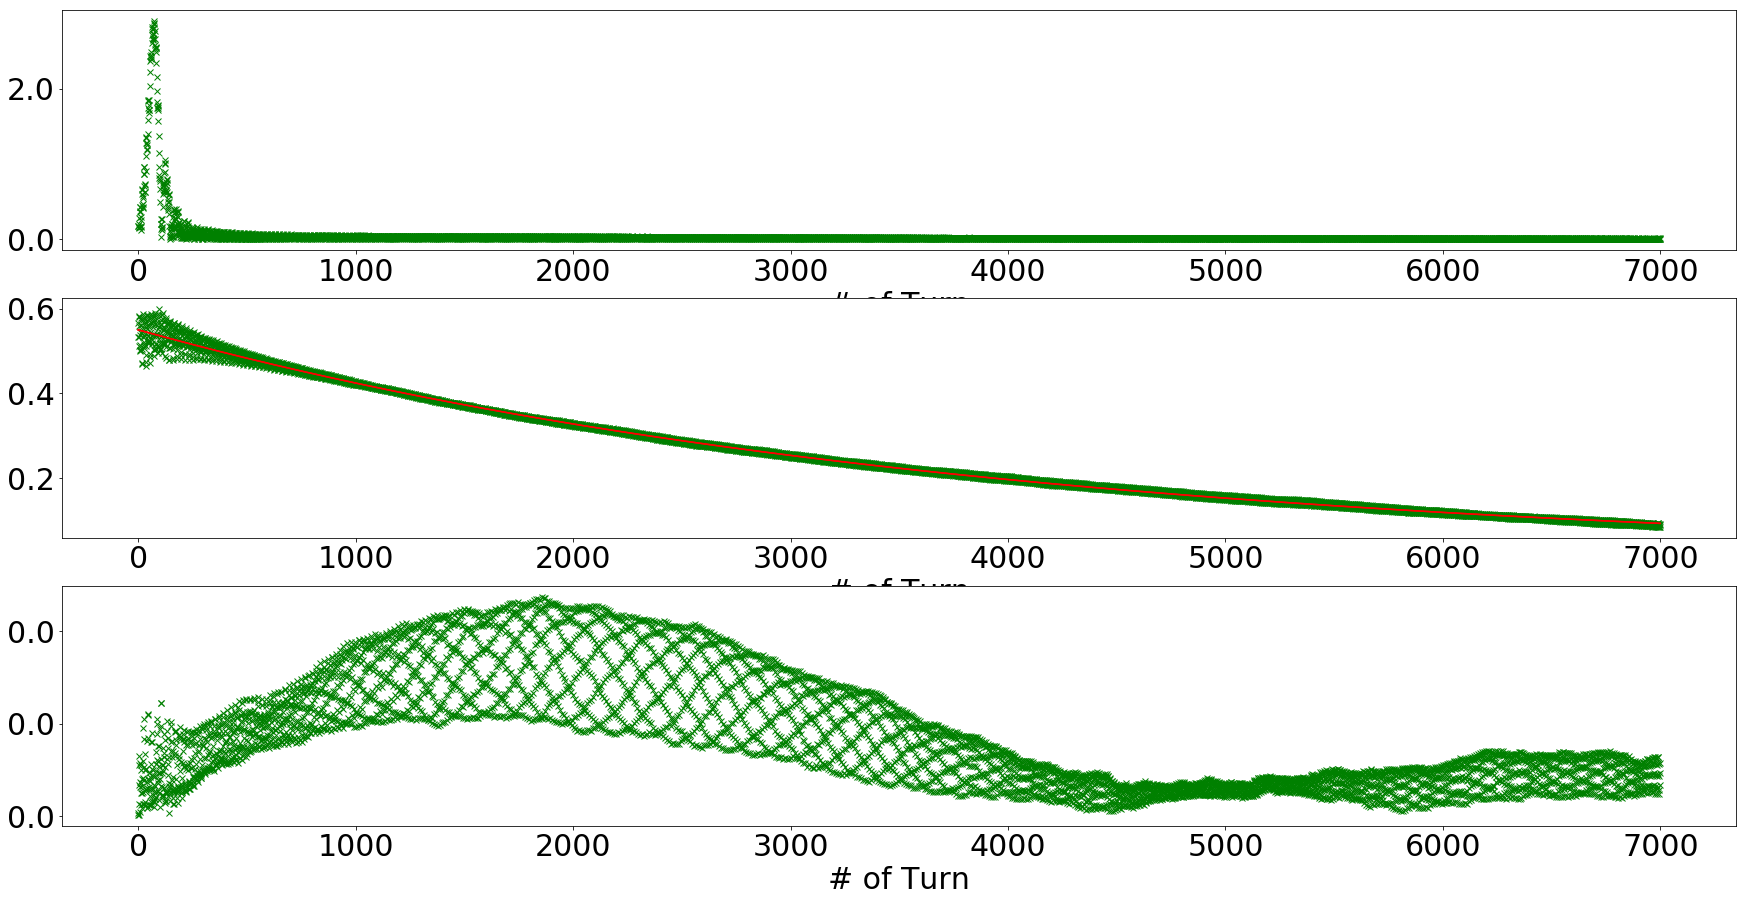

nmacro14400_nBin19_Idc0.34A_ThetaL0.0degree
[  5.47885548e-01  -2.23860824e-04   3.19933034e-03]
[[  1.05343685e-06   9.10452611e-10  -1.19229785e-06]
 [  9.10452611e-10   9.91102542e-13  -1.17856132e-09]
 [ -1.19229785e-06  -1.17856132e-09   1.46774579e-06]]


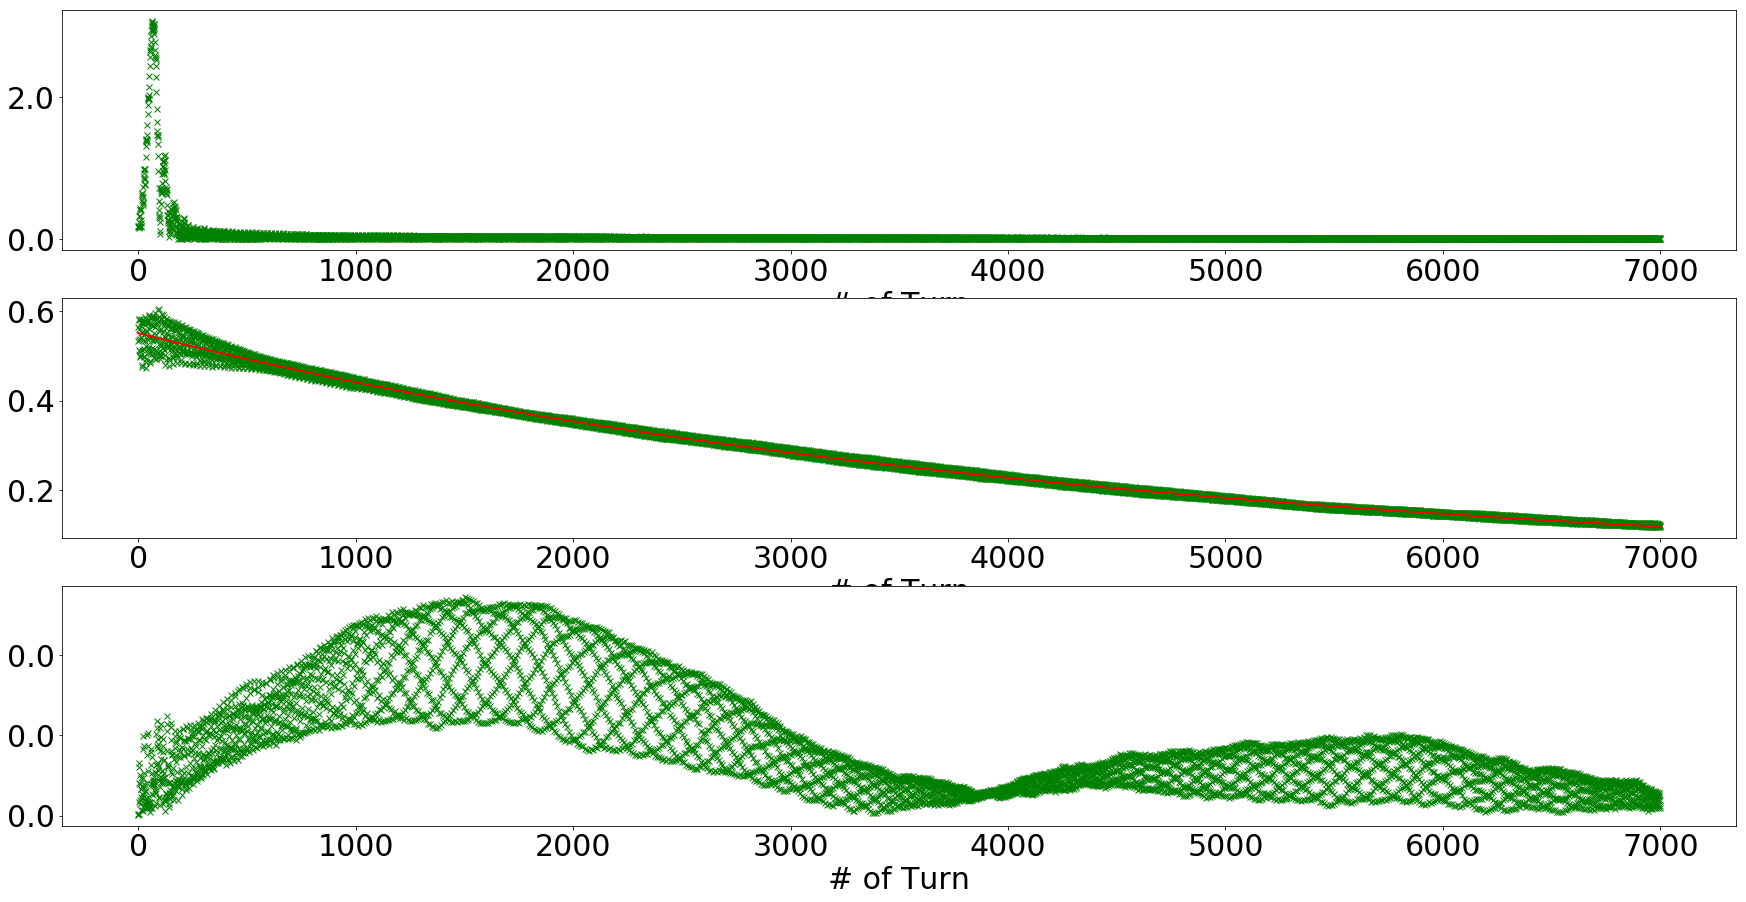

nmacro14400_nBin19_Idc0.38A_ThetaL0.0degree
[  5.50480976e-01  -1.76651536e-04   2.03312484e-04]
[[  3.90152686e-06   2.35758878e-09  -4.32164564e-06]
 [  2.35758878e-09   1.57027582e-12  -2.74009872e-09]
 [ -4.32164564e-06  -2.74009872e-09   4.91544004e-06]]


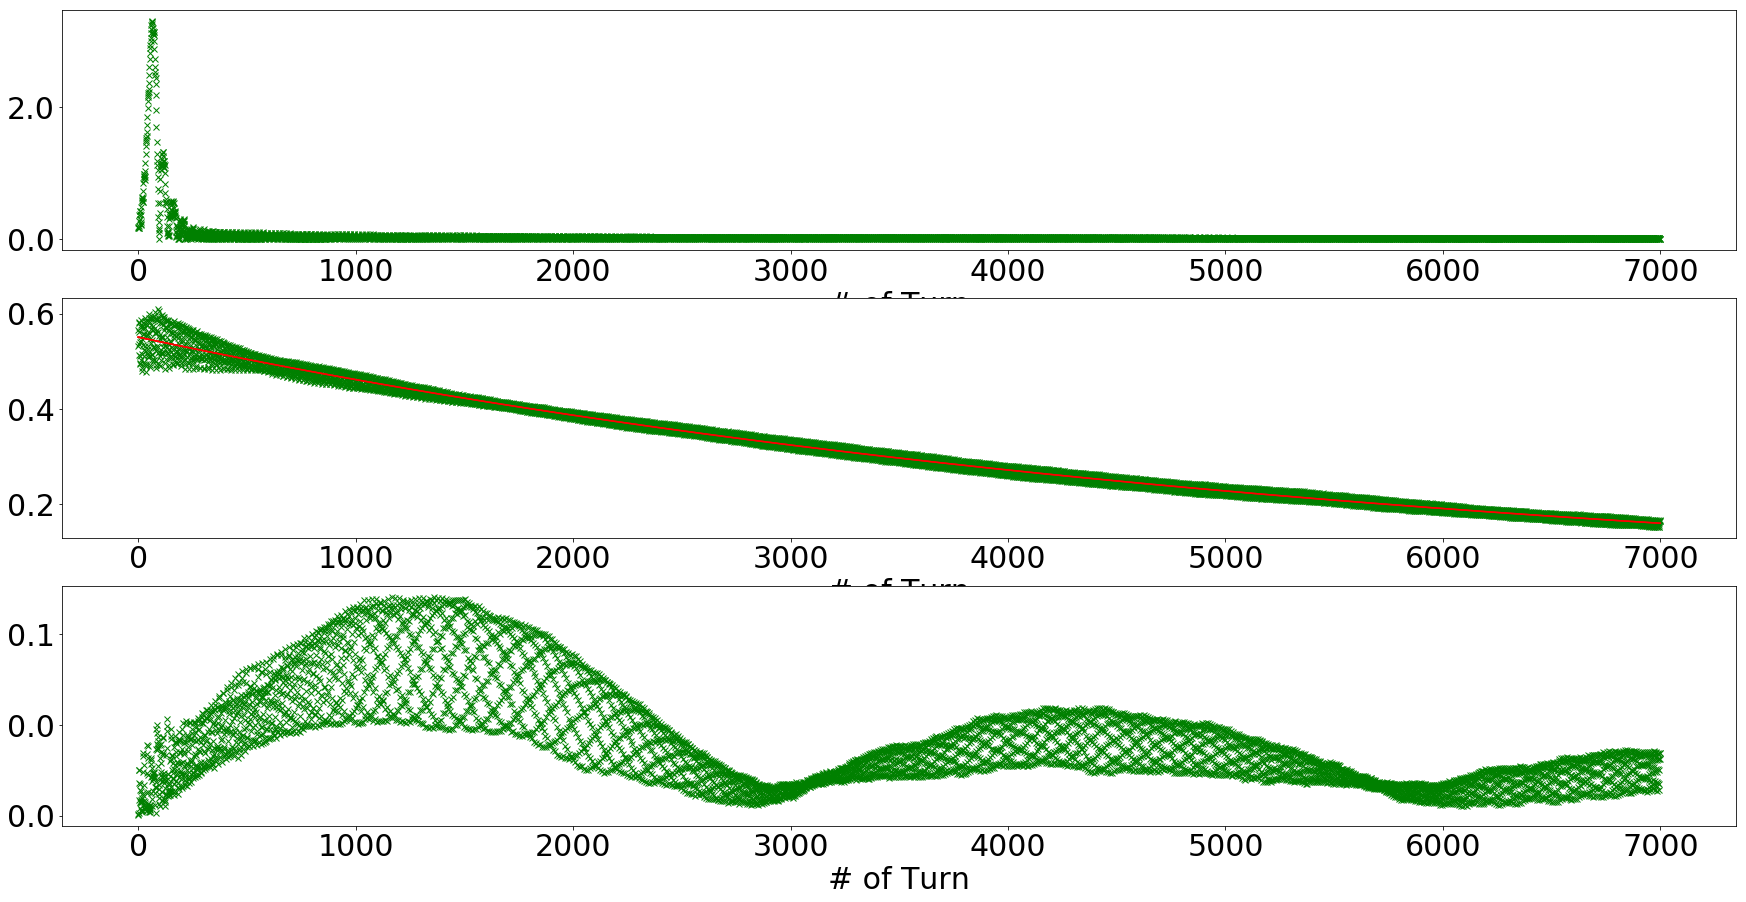

nmacro14400_nBin19_Idc0.42A_ThetaL0.0degree
[  5.61772266e-01  -1.24504941e-04  -1.02493456e-02]
[[  1.86991063e-05   6.53331344e-09  -1.98241785e-05]
 [  6.53331344e-09   2.35652974e-12  -7.00939247e-09]
 [ -1.98241785e-05  -7.00939247e-09   2.11265236e-05]]


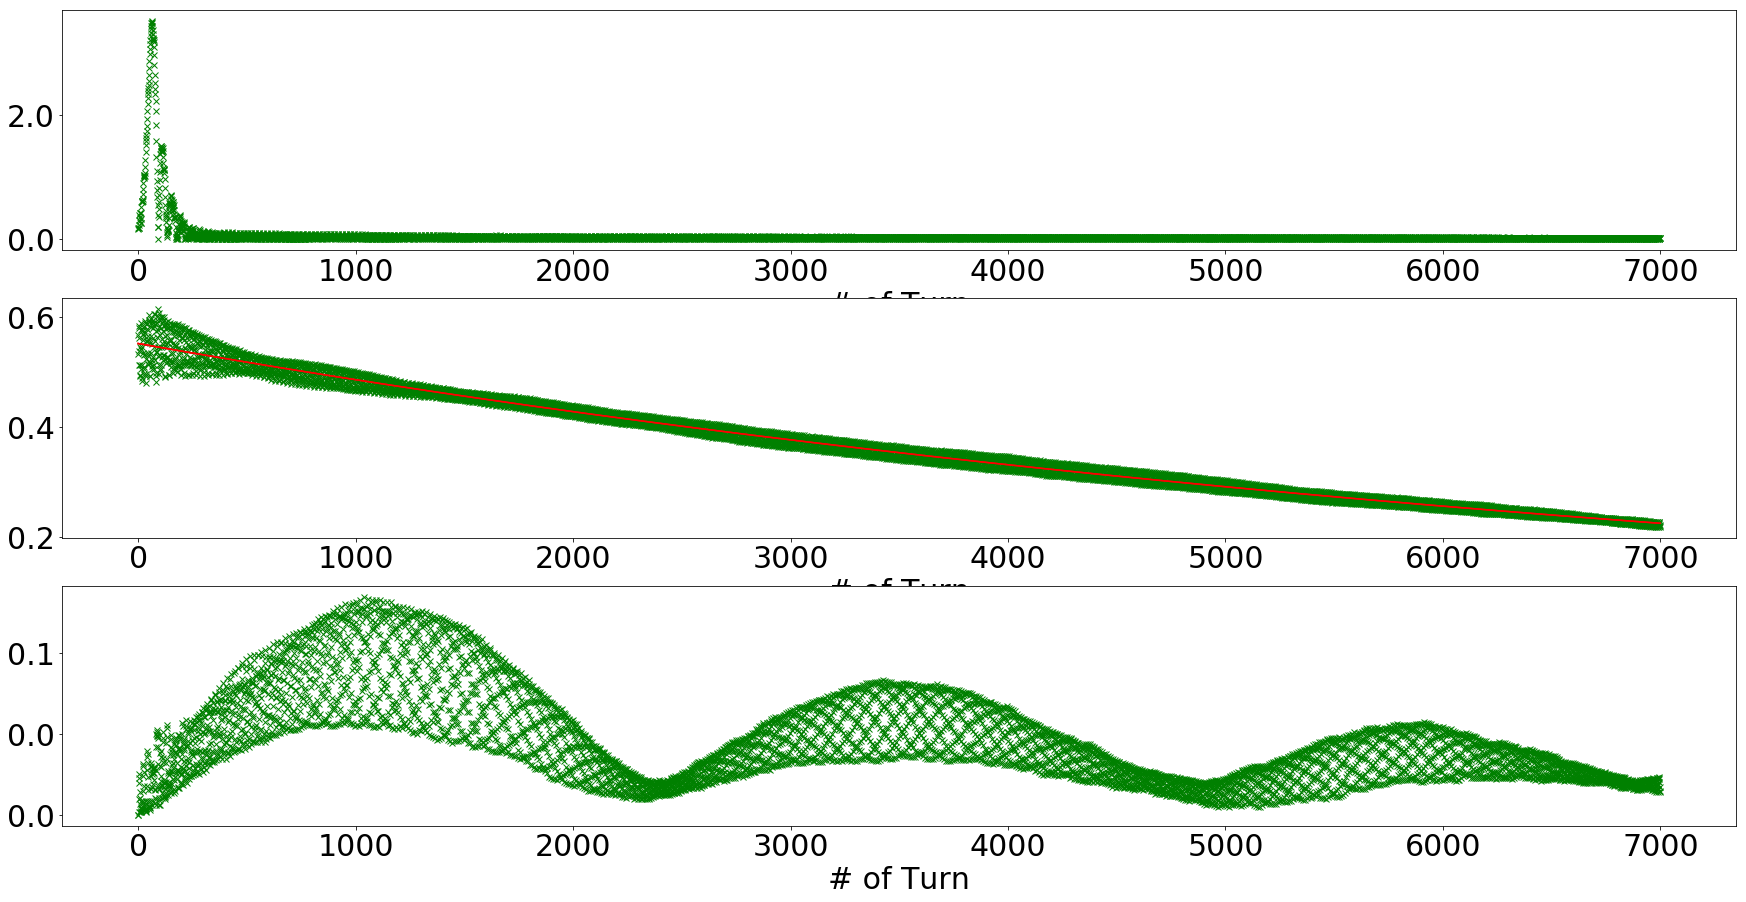

nmacro14400_nBin19_Idc0.46A_ThetaL0.0degree
[  4.89307594e-01  -8.48087092e-05   6.56198914e-02]
[[  1.23627128e-04   2.91711408e-08  -1.27199322e-04]
 [  2.91711408e-08   6.95855575e-12  -3.01017174e-08]
 [ -1.27199322e-04  -3.01017174e-08   1.30999026e-04]]


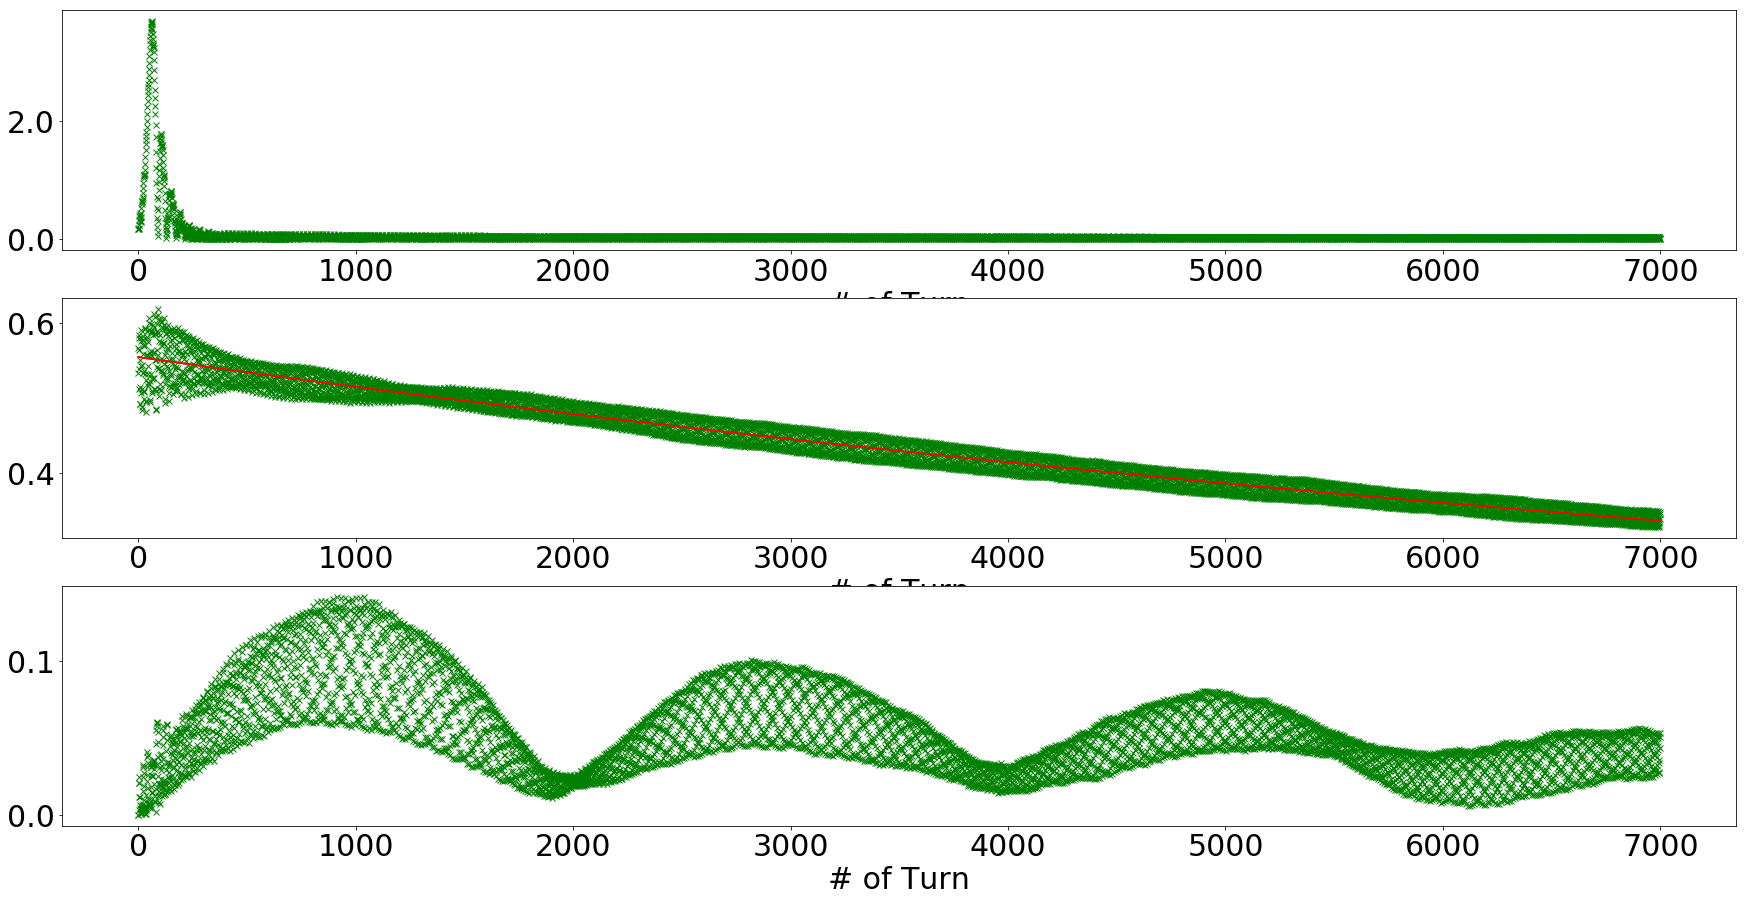

nmacro14400_nBin19_Idc0.50A_ThetaL0.0degree
[  1.44318977e+00  -8.40960797e-07  -8.90456964e-01]
[[  1.84638418e+04   1.07913448e-02  -1.84638961e+04]
 [  1.07913448e-02   6.30709438e-09  -1.07913765e-02]
 [ -1.84638961e+04  -1.07913765e-02   1.84639503e+04]]


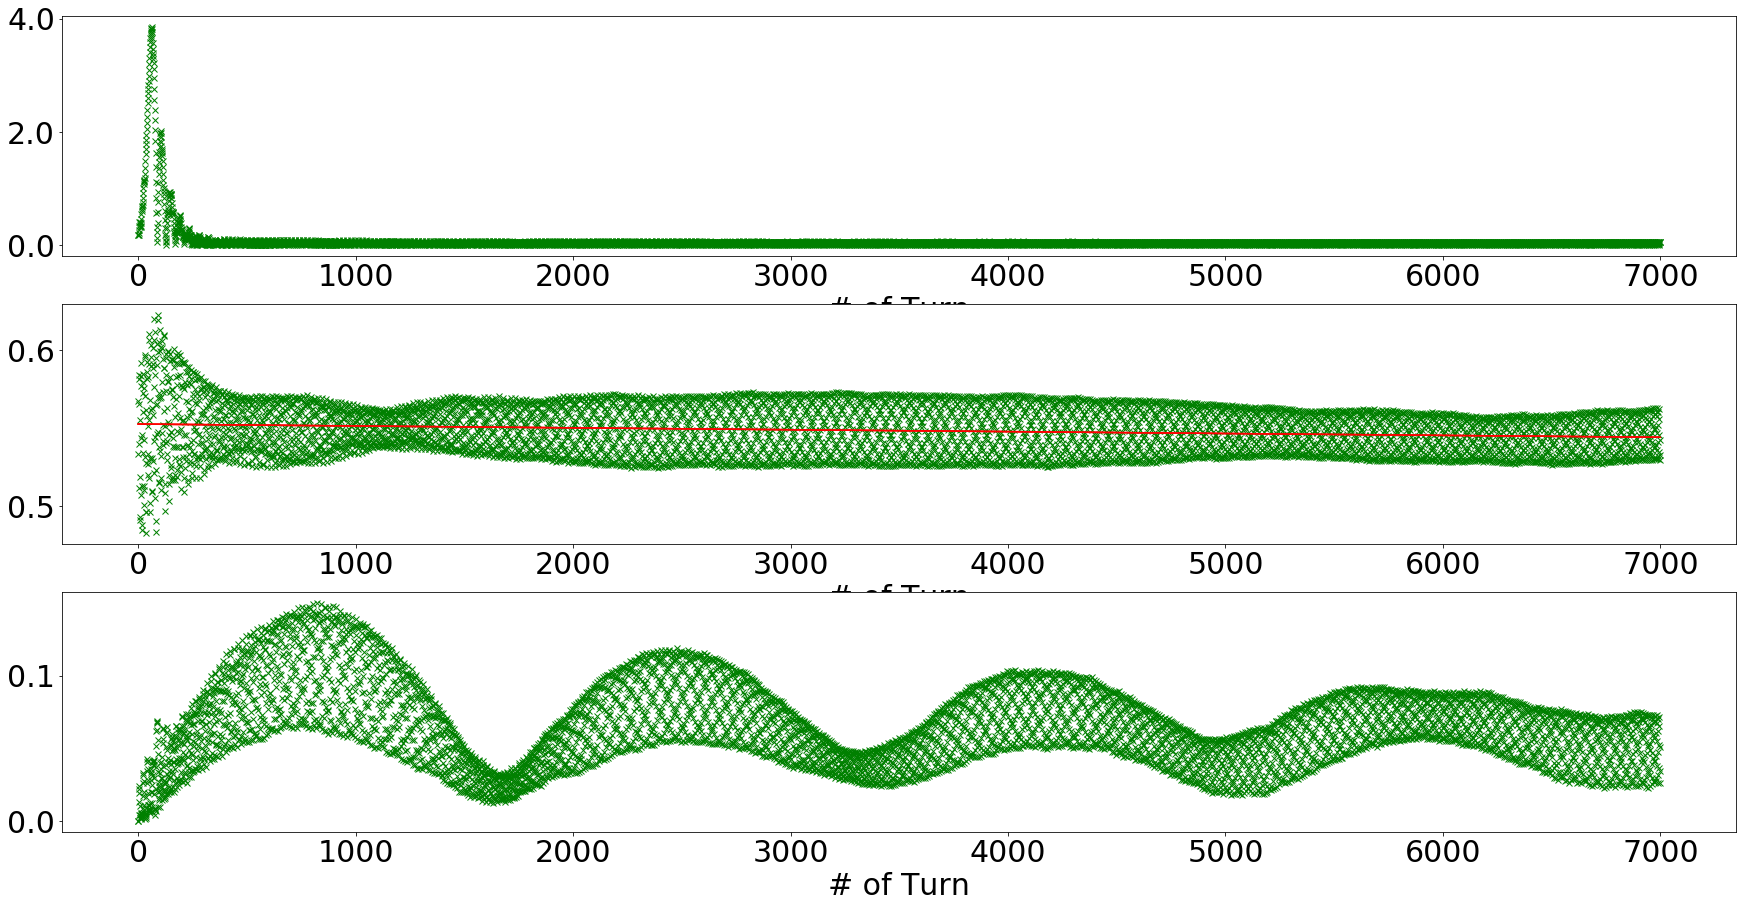

nmacro14400_nBin19_Idc0.54A_ThetaL0.0degree
[  5.08939392e-01   8.00549741e-05   4.49581487e-02]
[[  3.23784556e-04  -3.90276480e-08  -3.32247865e-04]
 [ -3.90276480e-08   4.71856483e-12   4.00103781e-08]
 [ -3.32247865e-04   4.00103781e-08   3.41075997e-04]]


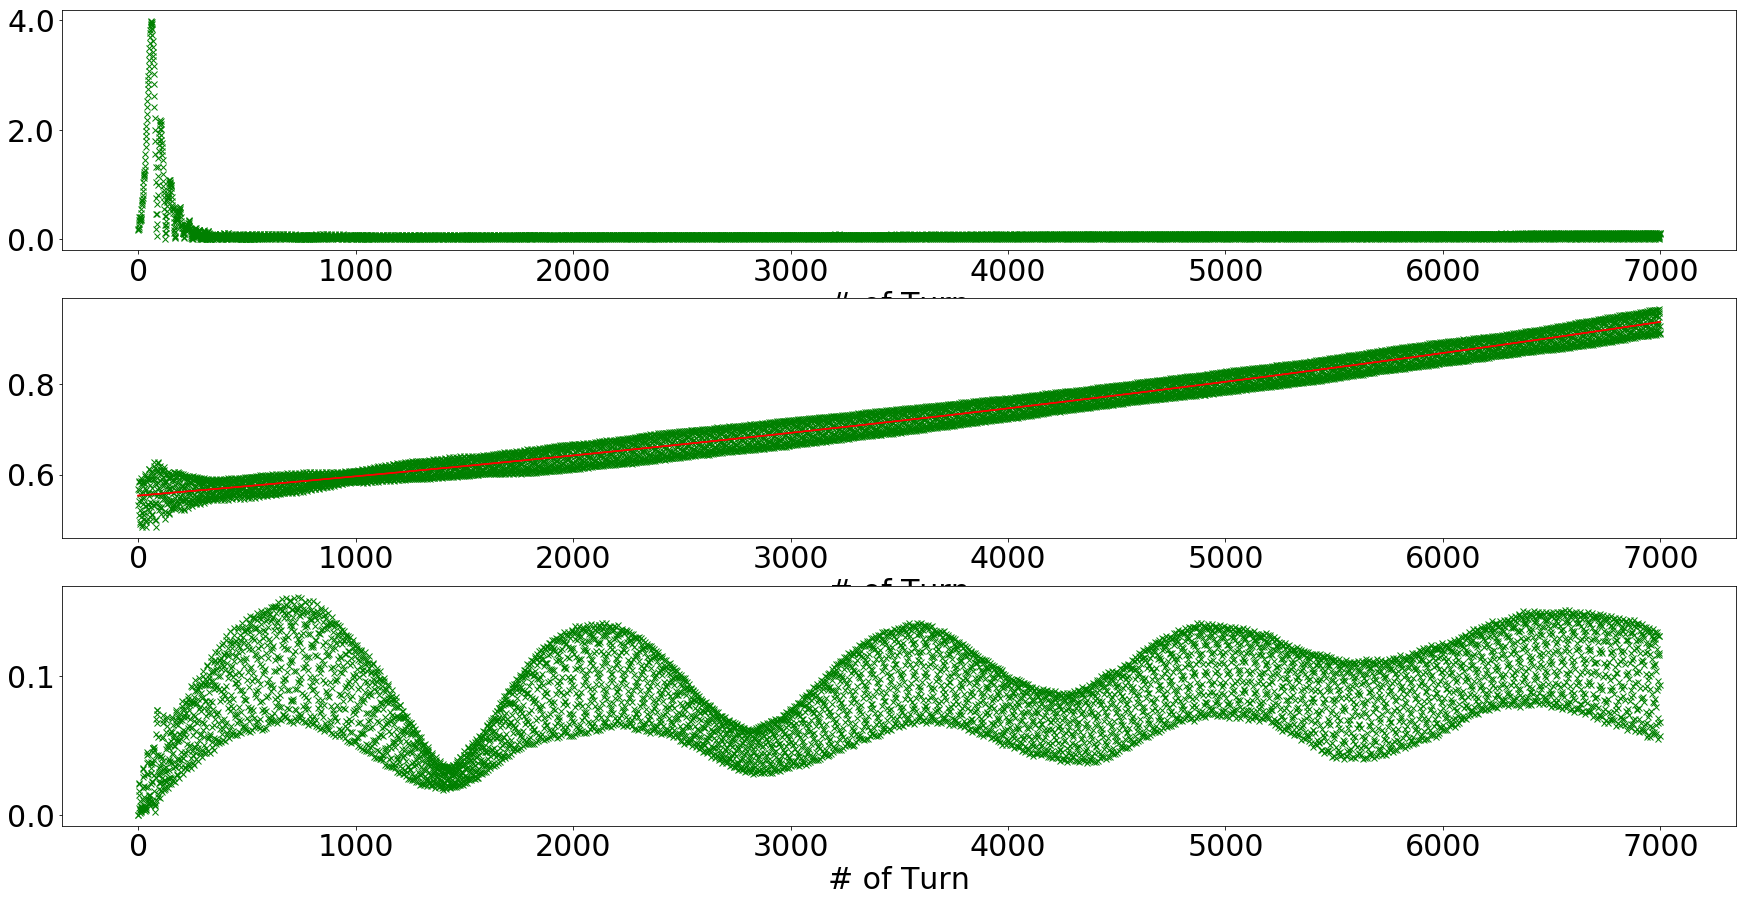

nmacro14400_nBin19_Idc0.58A_ThetaL0.0degree
[  5.25311768e-01   1.71364132e-04   3.00502981e-02]
[[  2.56064254e-05  -4.89326633e-09  -2.87087531e-05]
 [ -4.89326633e-09   9.42389993e-13   5.45506798e-09]
 [ -2.87087531e-05   5.45506798e-09   3.24055946e-05]]


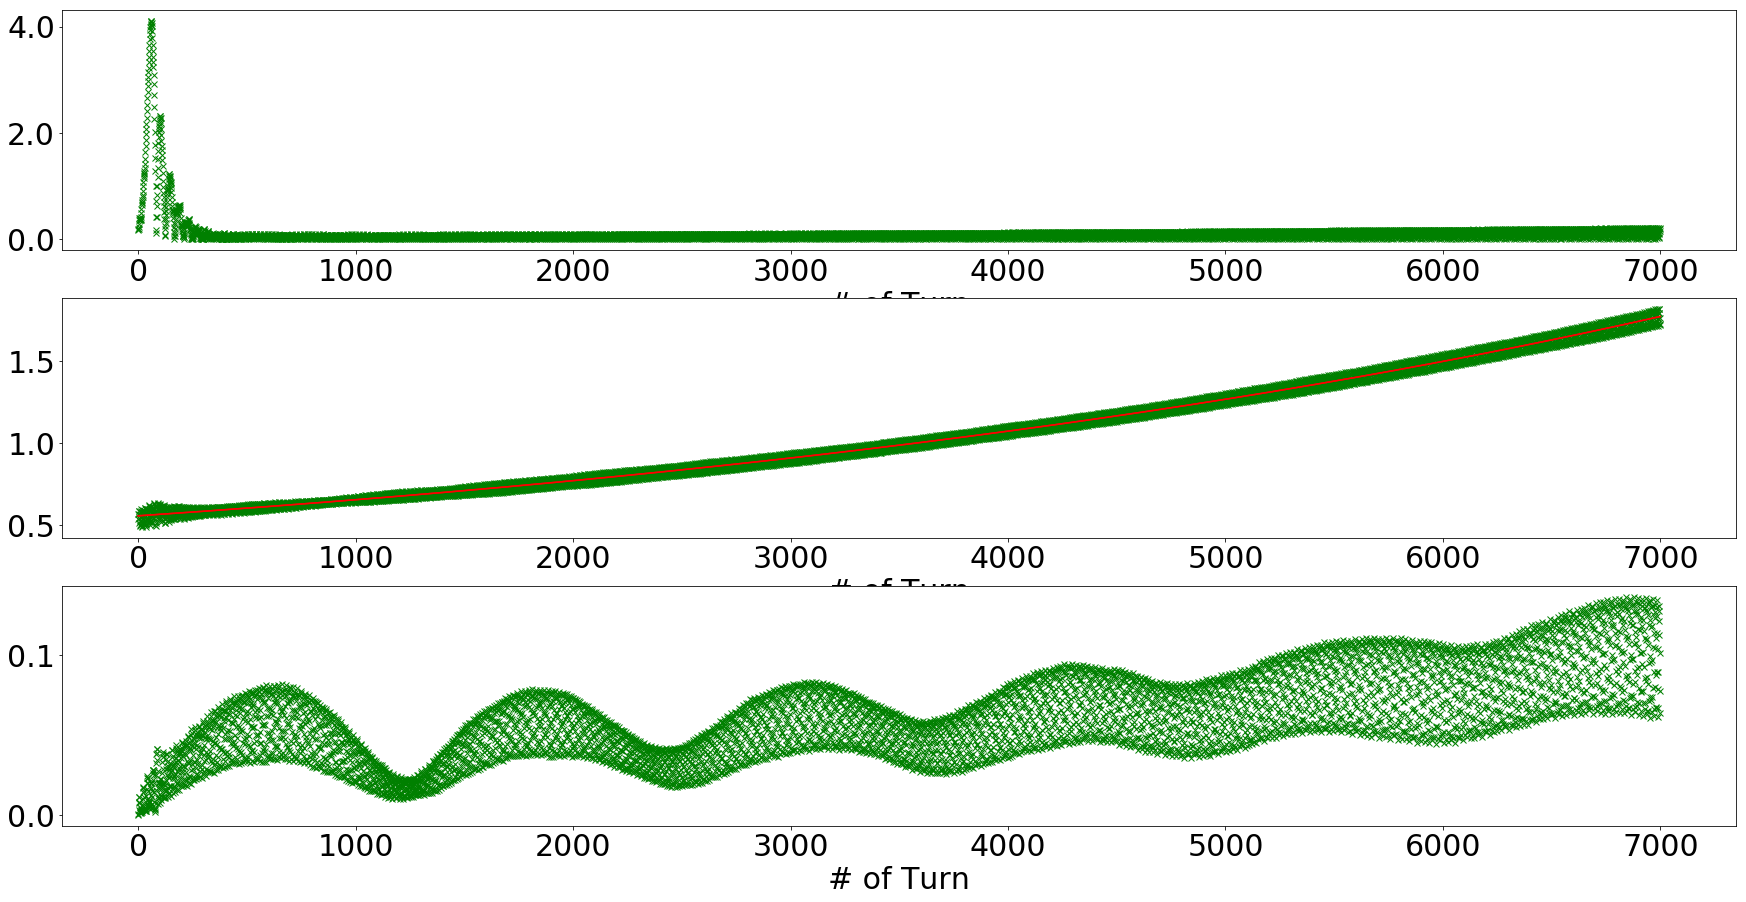

nmacro14400_nBin19_Idc0.62A_ThetaL0.0degree
[  5.87695906e-01   2.63597931e-04  -3.70094502e-02]
[[  9.73465863e-06  -2.01894053e-09  -1.26264899e-05]
 [ -2.01894053e-09   4.23171979e-13   2.58458087e-09]
 [ -1.26264899e-05   2.58458087e-09   1.68683172e-05]]


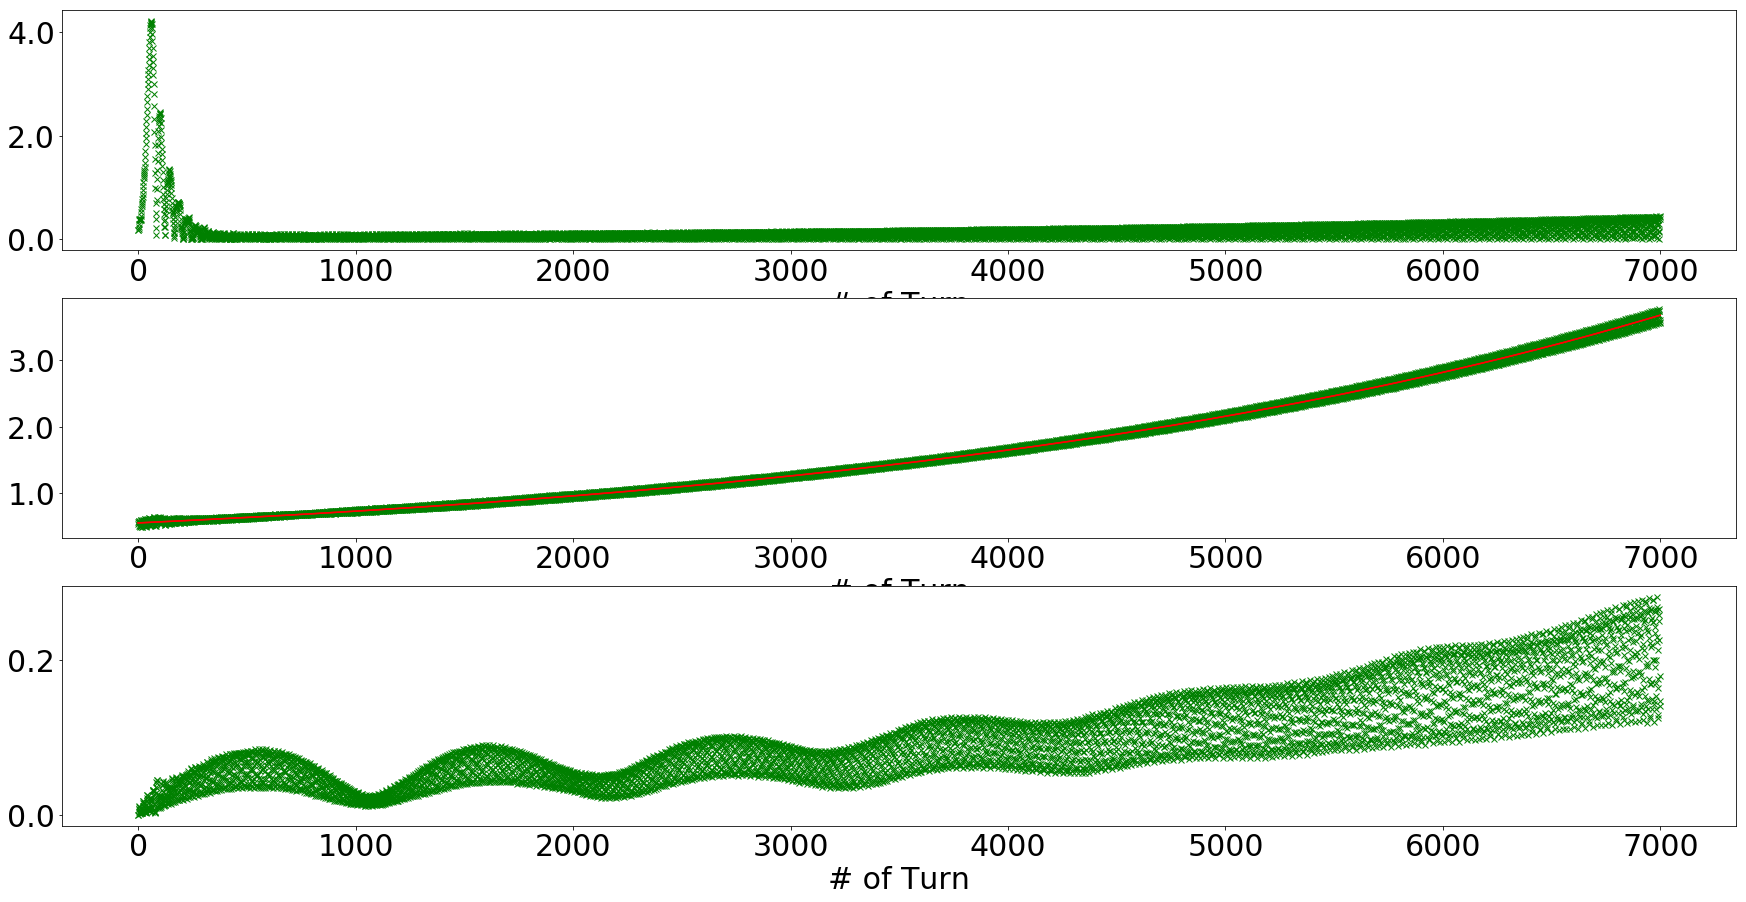

nmacro14400_nBin19_Idc0.66A_ThetaL0.0degree
[  6.05683918e-01   3.75628420e-04  -5.74023527e-02]
[[  1.01722340e-05  -2.67944402e-09  -1.41731558e-05]
 [ -2.67944402e-09   7.13652462e-13   3.67302691e-09]
 [ -1.41731558e-05   3.67302691e-09   2.06576746e-05]]


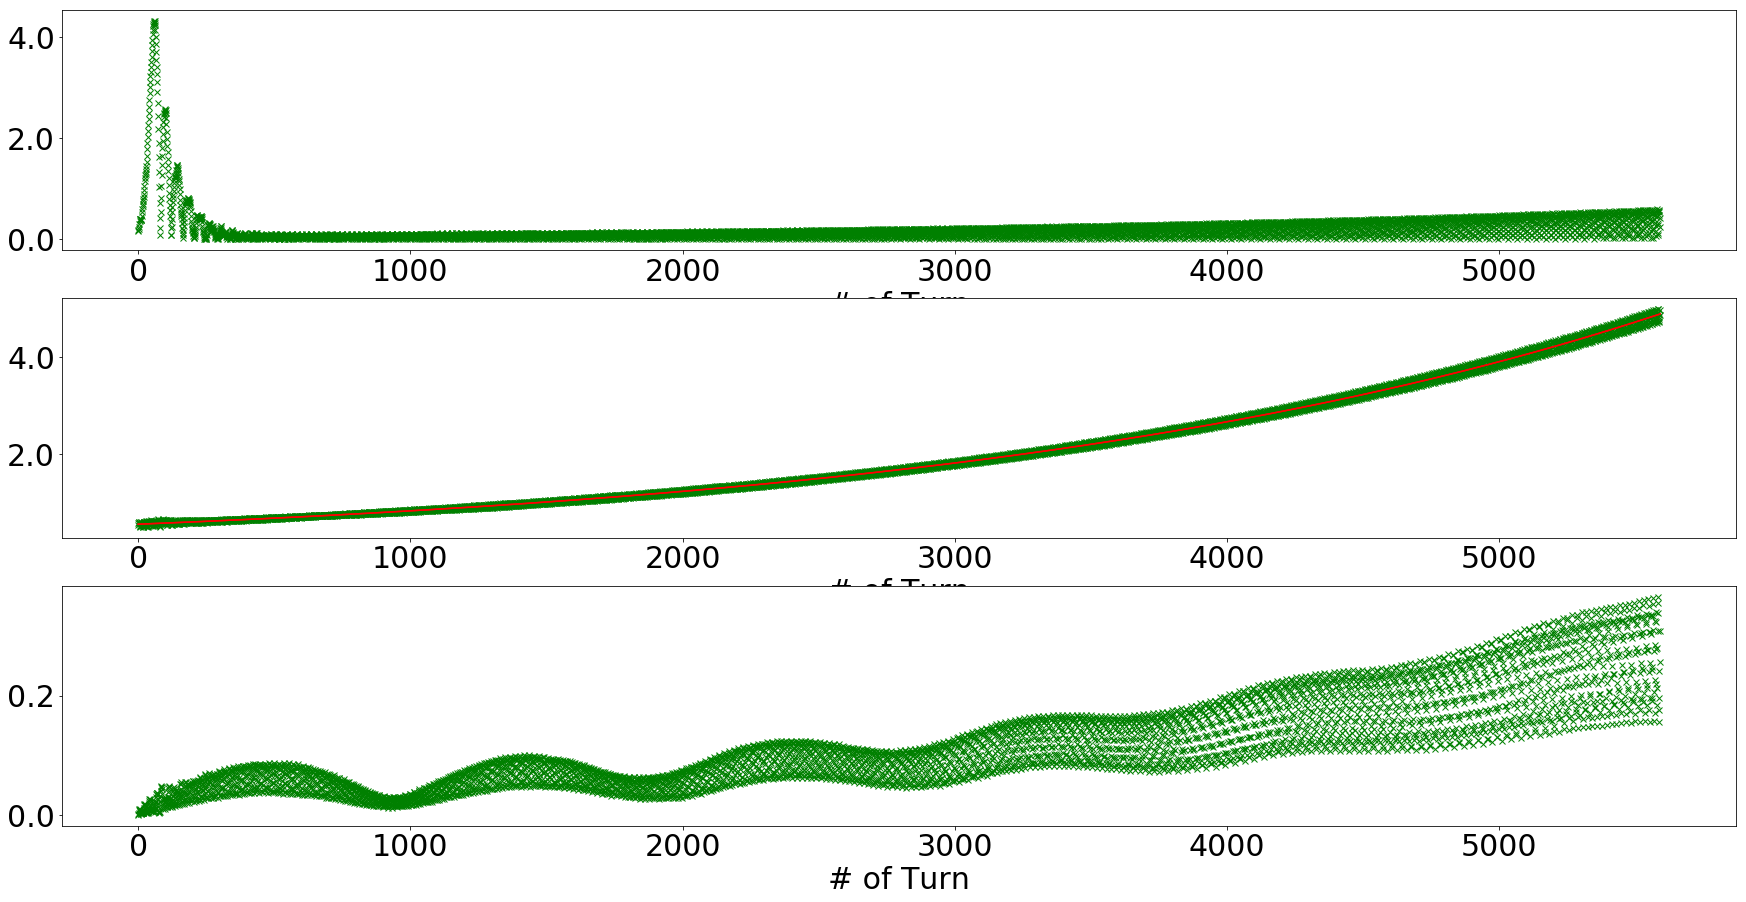

nmacro14400_nBin19_Idc0.70A_ThetaL0.0degree
[  5.93367793e-01   5.11914530e-04  -4.12092695e-02]
[[  1.33360519e-05  -4.86066703e-09  -1.86723072e-05]
 [ -4.86066703e-09   1.79138375e-12   6.69432035e-09]
 [ -1.86723072e-05   6.69432035e-09   2.73800397e-05]]


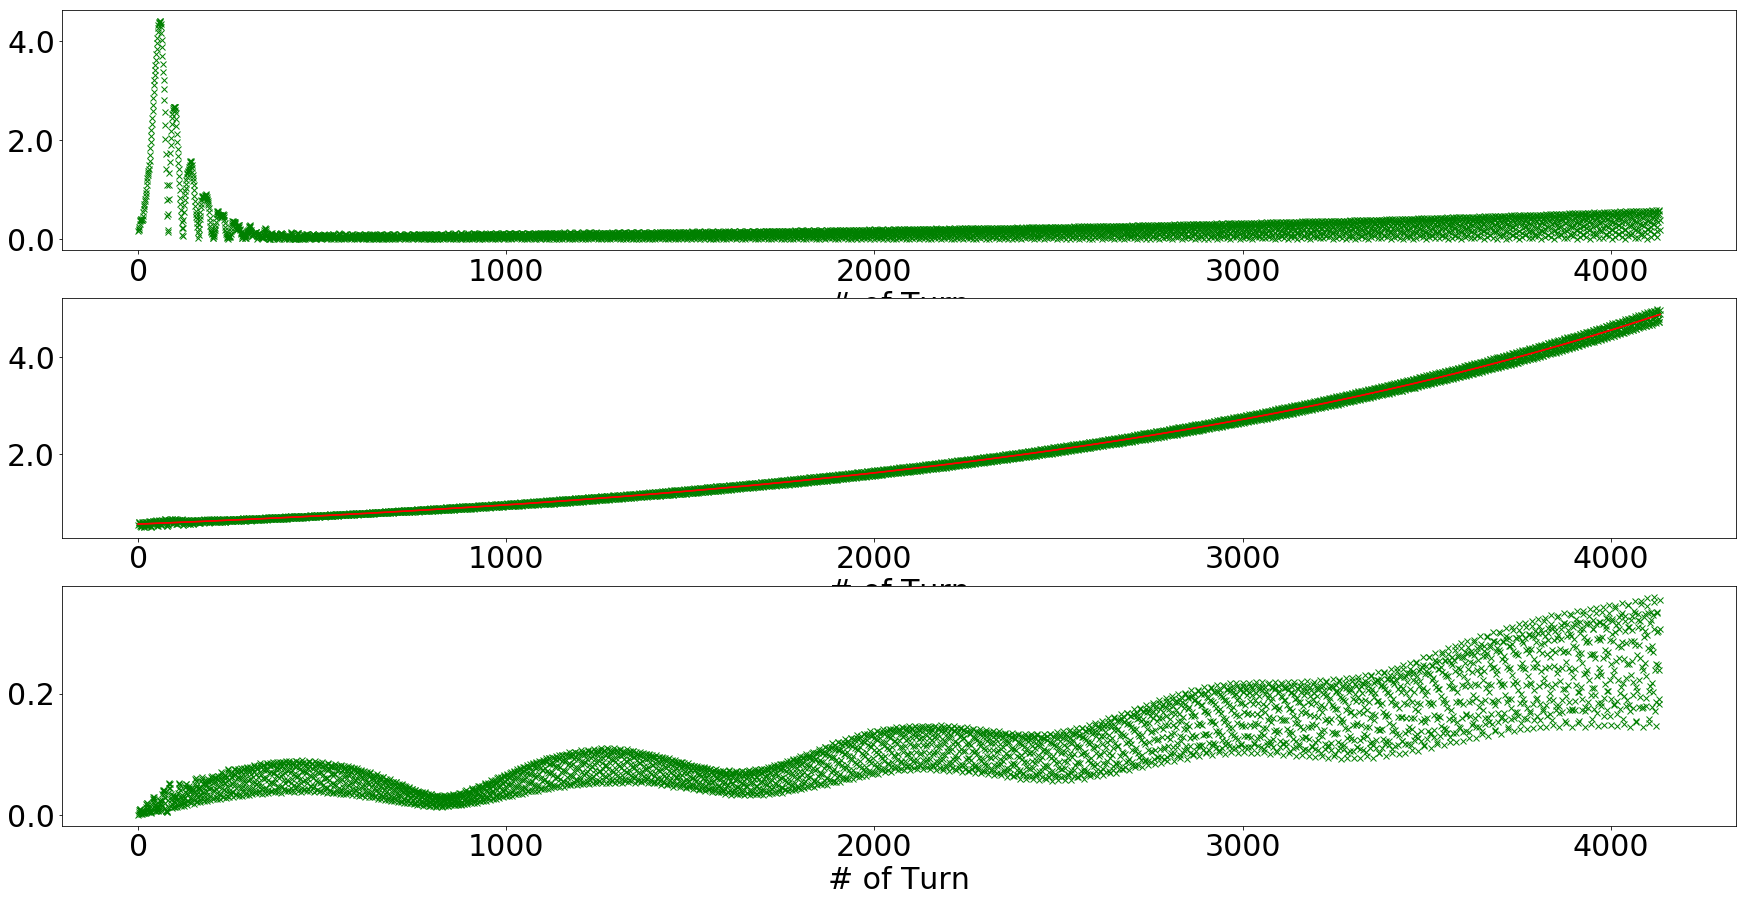

nmacro14400_nBin19_Idc0.74A_ThetaL0.0degree
[ 0.58676085  0.00066686 -0.0333776 ]
[[  1.72313681e-05  -8.24400744e-09  -2.42057249e-05]
 [ -8.24400744e-09   3.98830200e-12   1.13898109e-08]
 [ -2.42057249e-05   1.13898109e-08   3.56388105e-05]]


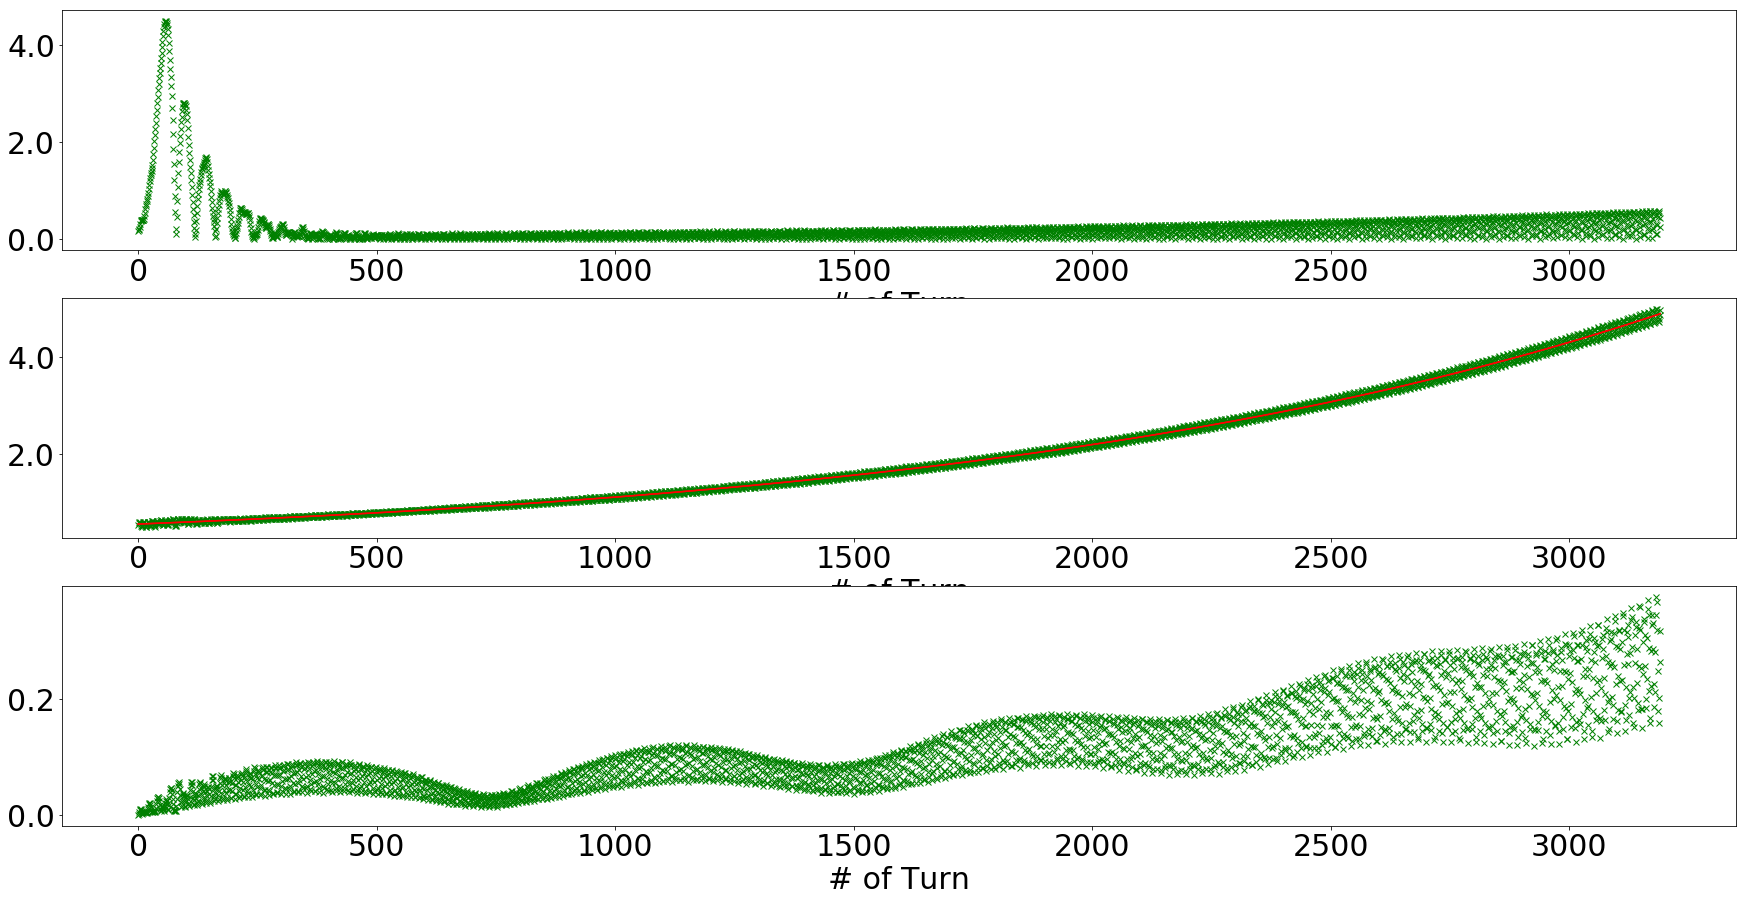

nmacro14400_nBin19_Idc0.78A_ThetaL0.0degree
[ 0.5803621   0.00084135 -0.02471939]
[[  2.23861531e-05  -1.36259486e-08  -3.15226699e-05]
 [ -1.36259486e-08   8.38668071e-12   1.88688708e-08]
 [ -3.15226699e-05   1.88688708e-08   4.65506977e-05]]


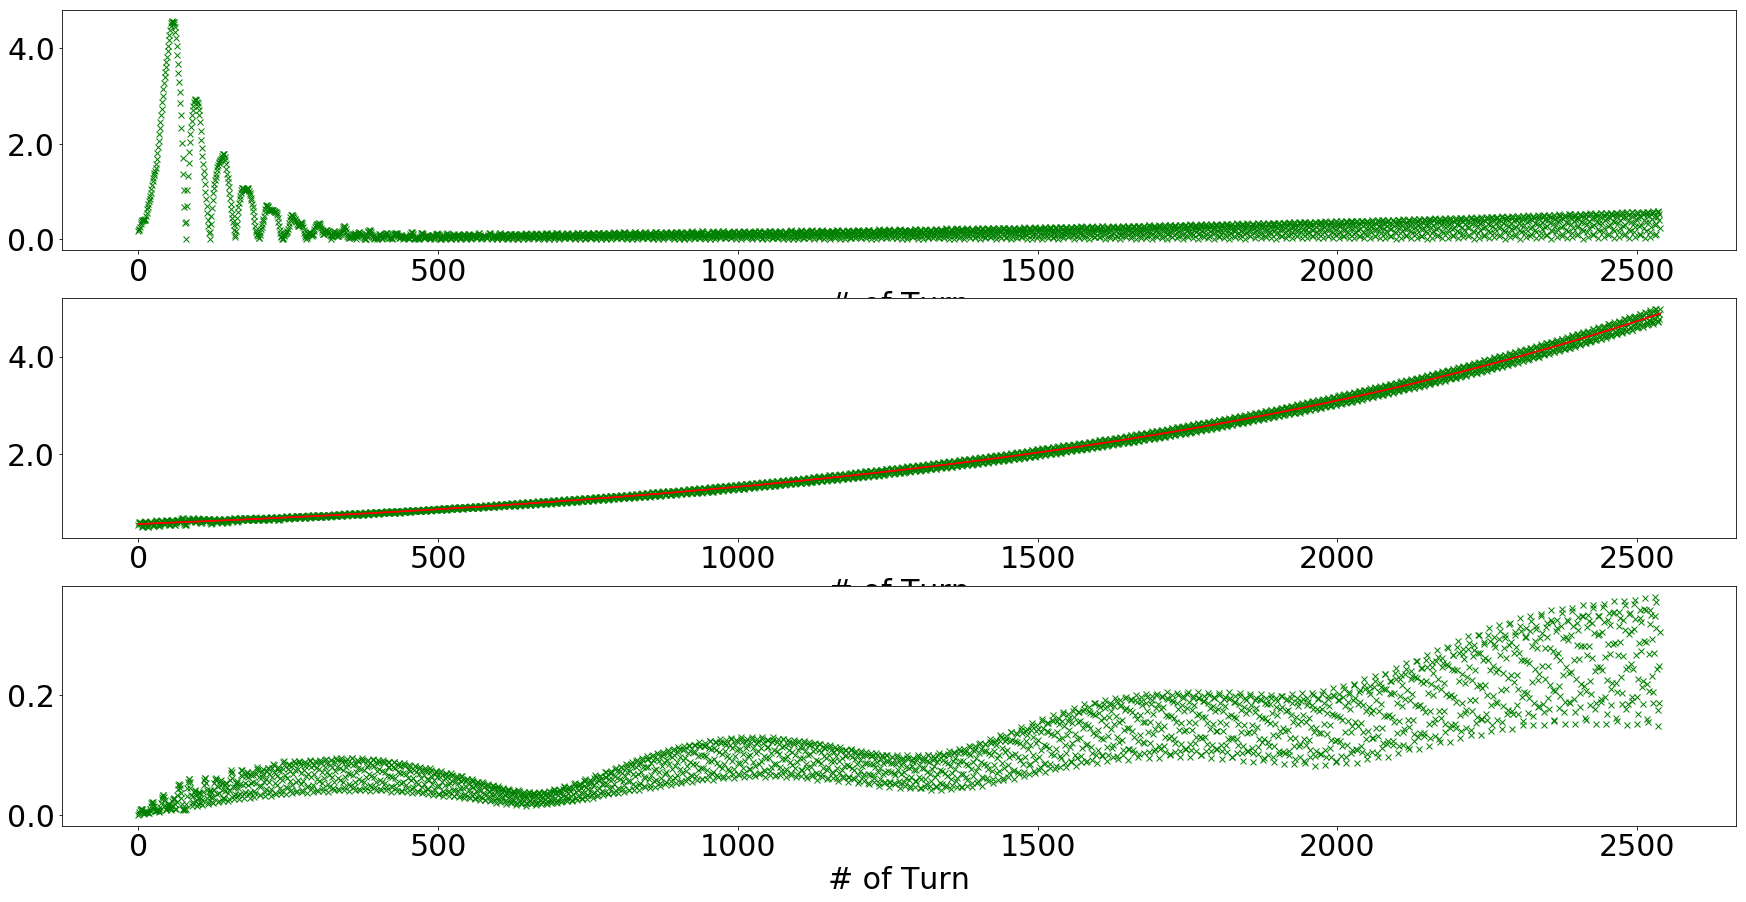

nmacro14400_nBin19_Idc0.82A_ThetaL0.0degree
[ 0.57504345  0.00103876 -0.01726371]
[[  2.85789289e-05  -2.16220833e-08  -4.03348398e-05]
 [ -2.16220833e-08   1.65420741e-11   3.00072124e-08]
 [ -4.03348398e-05   3.00072124e-08   5.97332398e-05]]


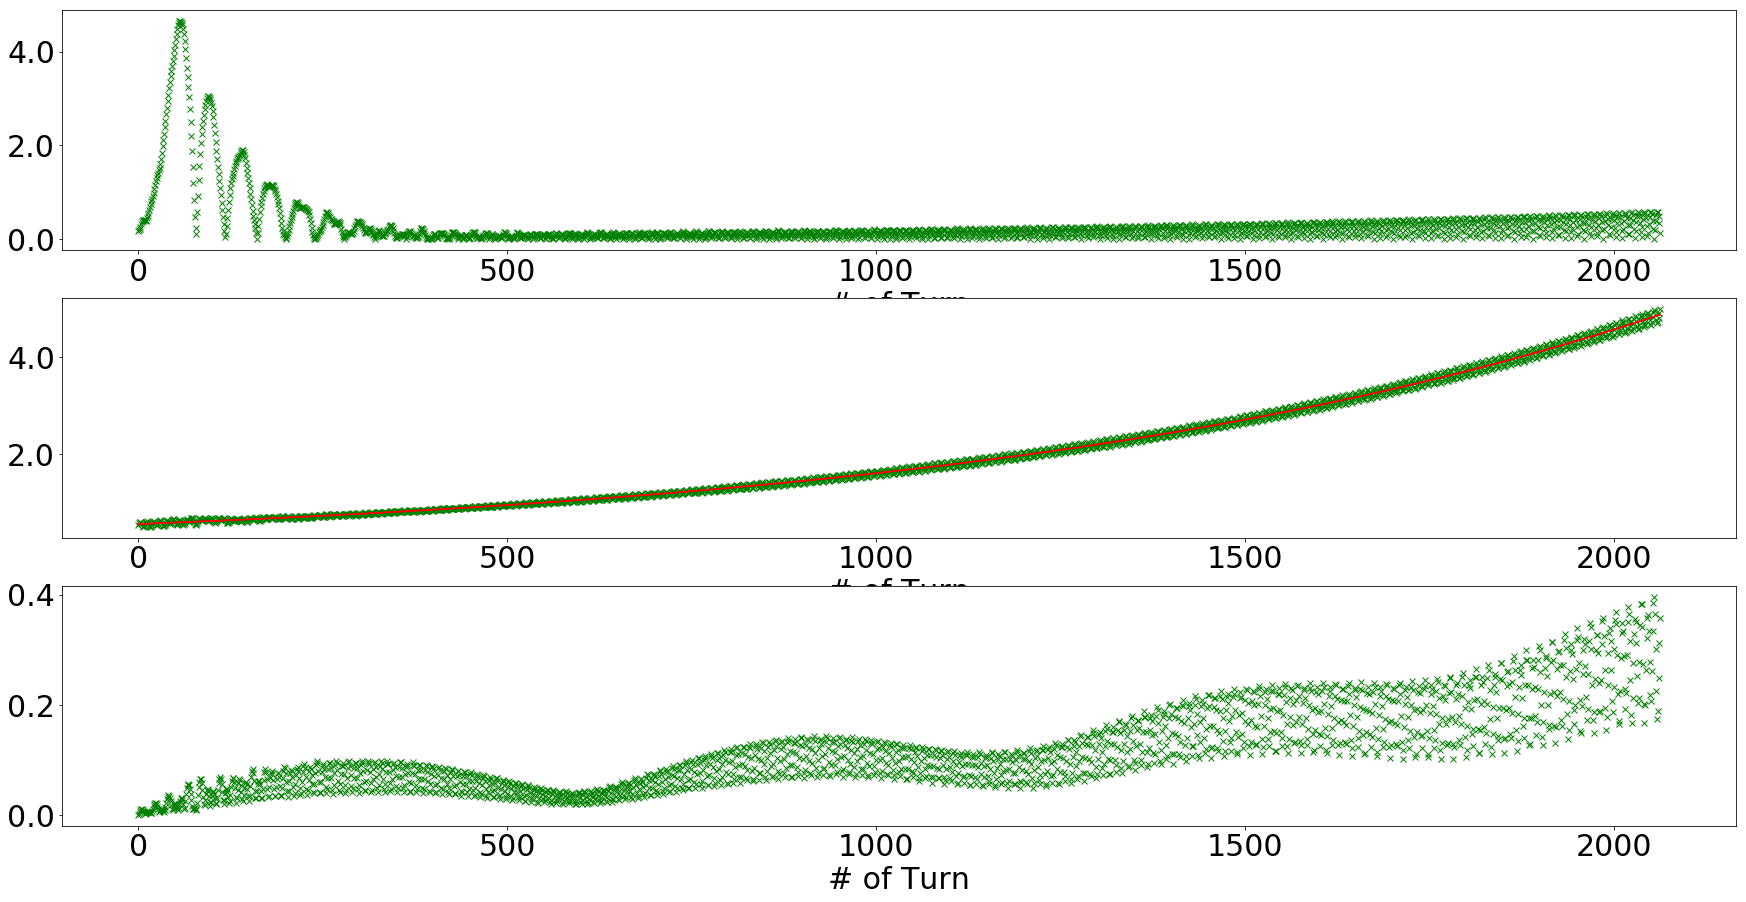

nmacro14400_nBin19_Idc0.86A_ThetaL0.0degree
[ 0.56842922  0.00126298 -0.00748362]
[[  3.53526851e-05  -3.28280450e-08  -4.99946536e-05]
 [ -3.28280450e-08   3.08256801e-11   4.56460359e-08]
 [ -4.99946536e-05   4.56460359e-08   7.42232054e-05]]


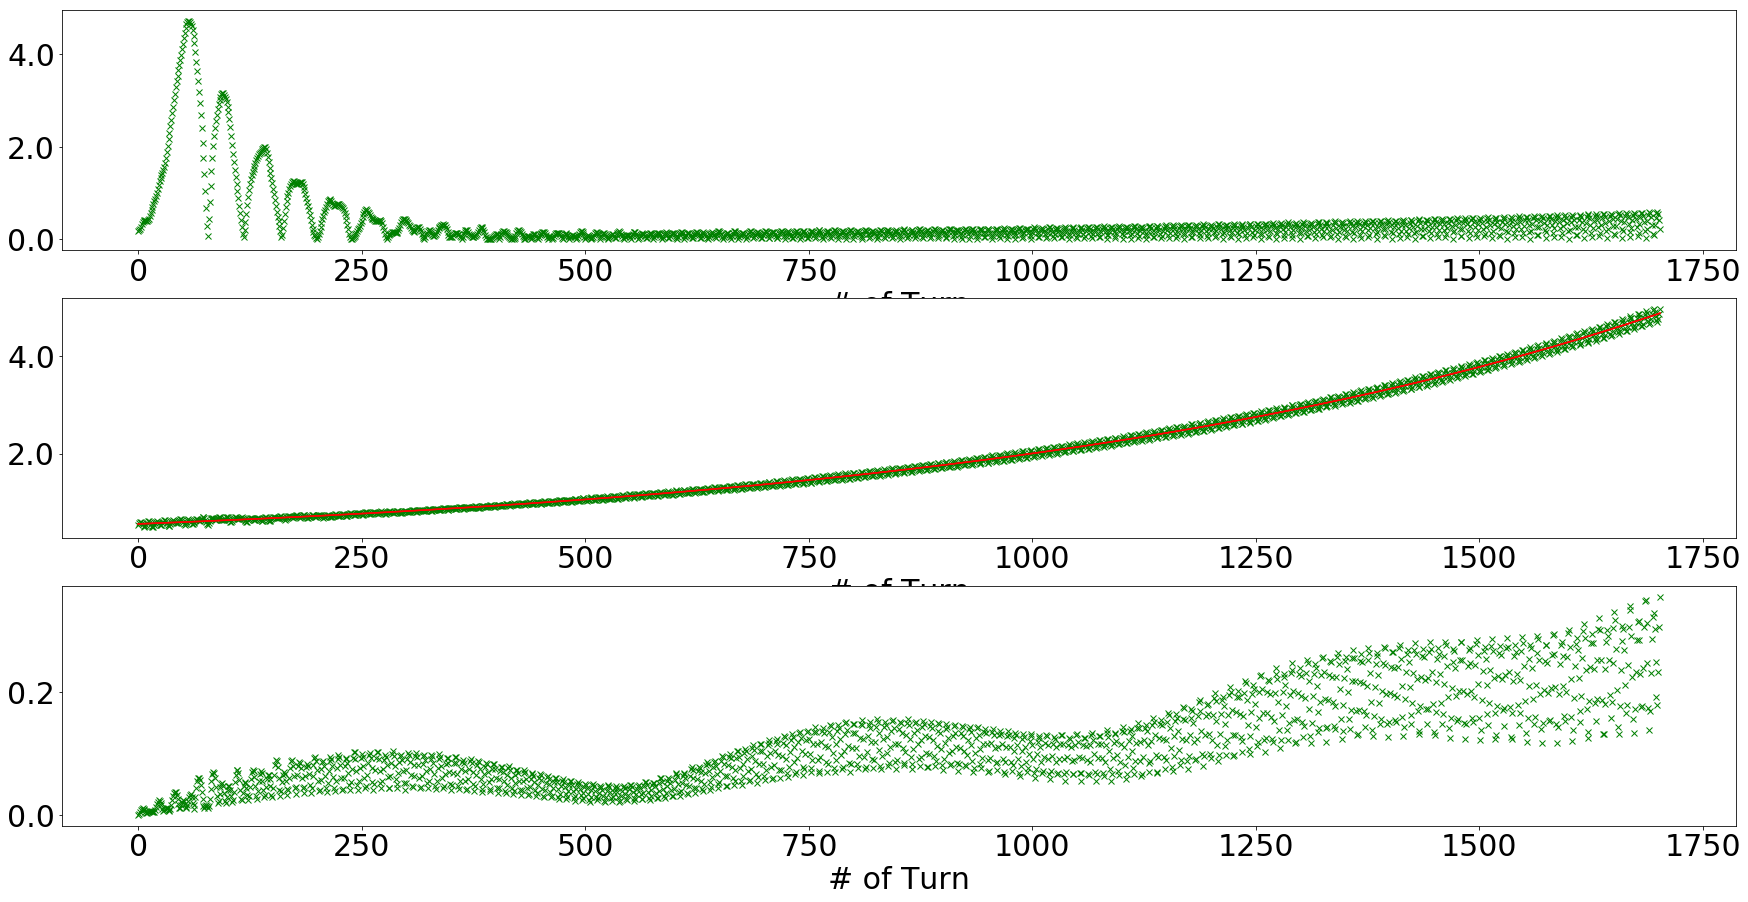

nmacro14400_nBin19_Idc0.90A_ThetaL0.0degree
[ 0.56855799  0.00150827 -0.0058315 ]
[[  4.24177701e-05  -4.69402618e-08  -6.00895107e-05]
 [ -4.69402618e-08   5.25281254e-11   6.53764245e-08]
 [ -6.00895107e-05   6.53764245e-08   8.94028363e-05]]


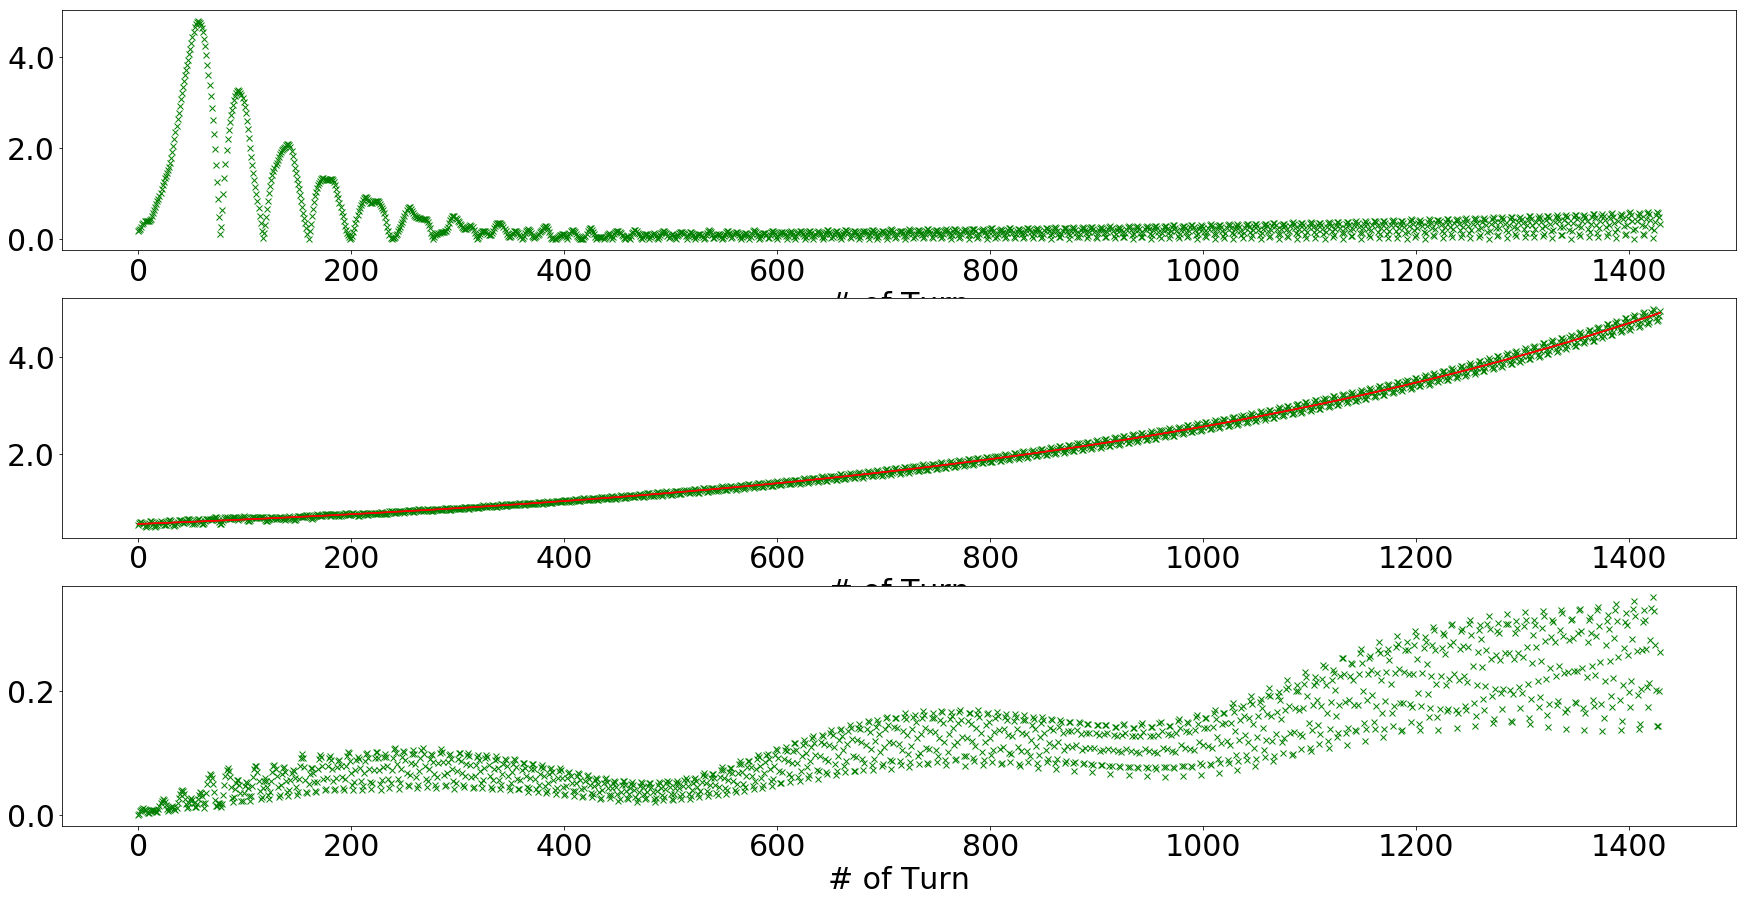

nmacro14400_nBin19_Idc0.94A_ThetaL0.0degree
[ 0.56664756  0.00178564 -0.00155103]
[[  5.25528263e-05  -6.89634816e-08  -7.45666478e-05]
 [ -6.89634816e-08   9.15154665e-11   9.61972148e-08]
 [ -7.45666478e-05   9.61972148e-08   1.11165673e-04]]


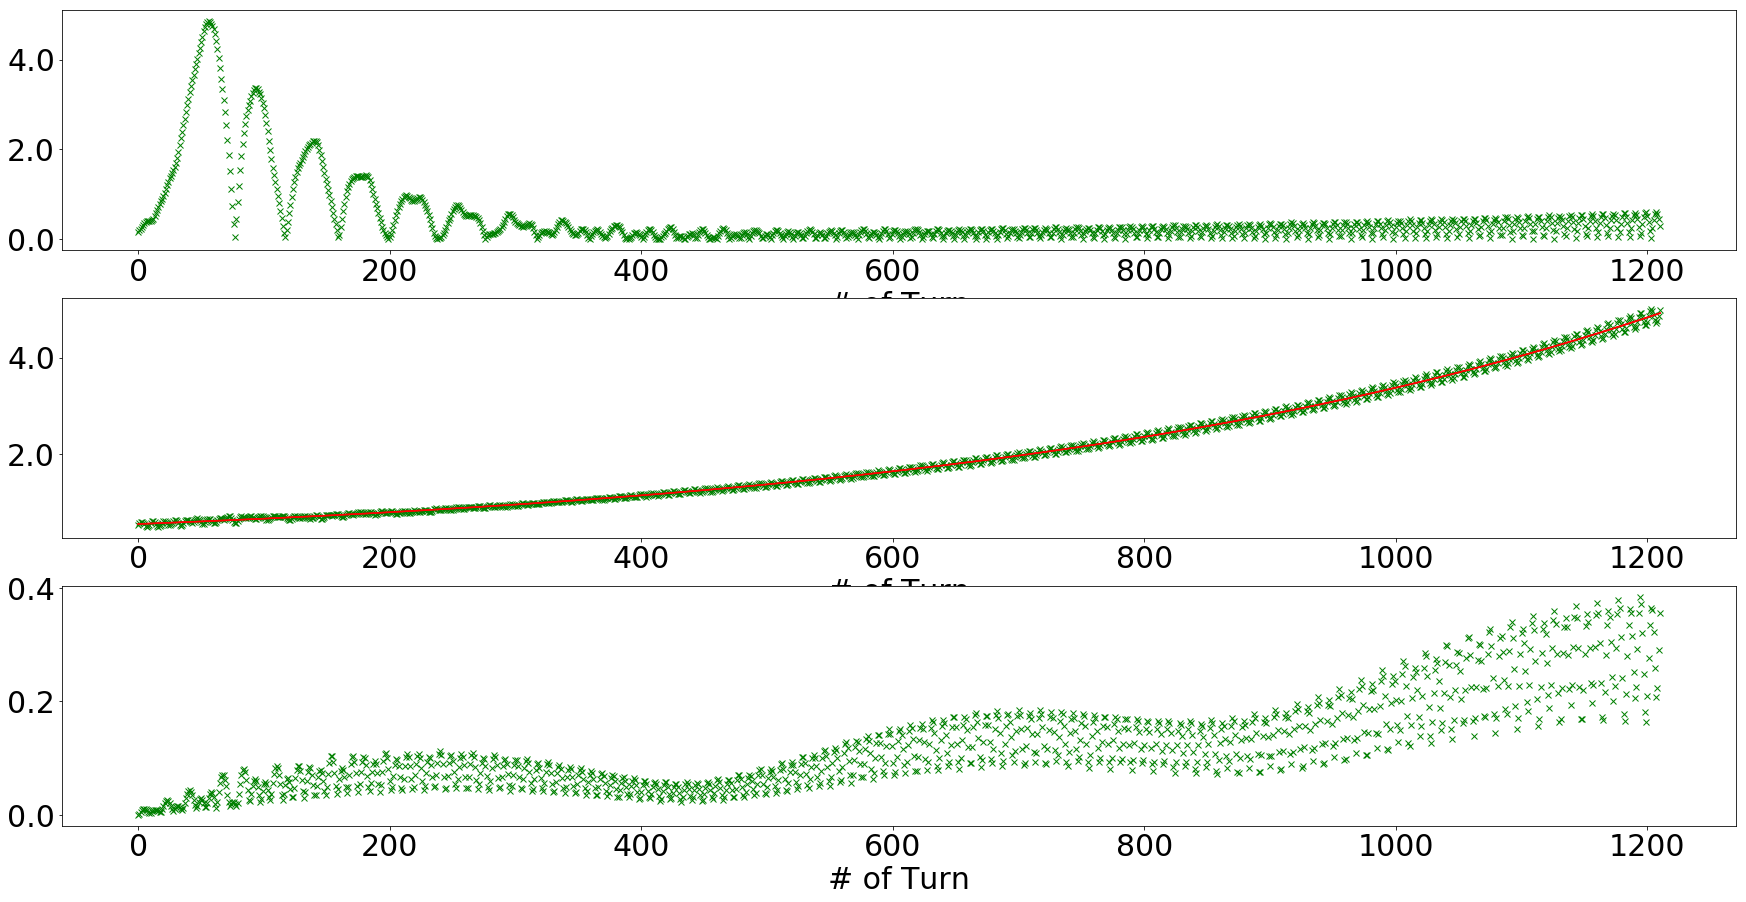

nmacro14400_nBin19_Idc0.98A_ThetaL0.0degree
[ 0.56130871  0.00210043  0.00741655]
[[  6.26067811e-05  -9.76650578e-08  -8.87389234e-05]
 [ -9.76650578e-08   1.54066499e-10   1.36095457e-07]
 [ -8.87389234e-05   1.36095457e-07   1.32124401e-04]]


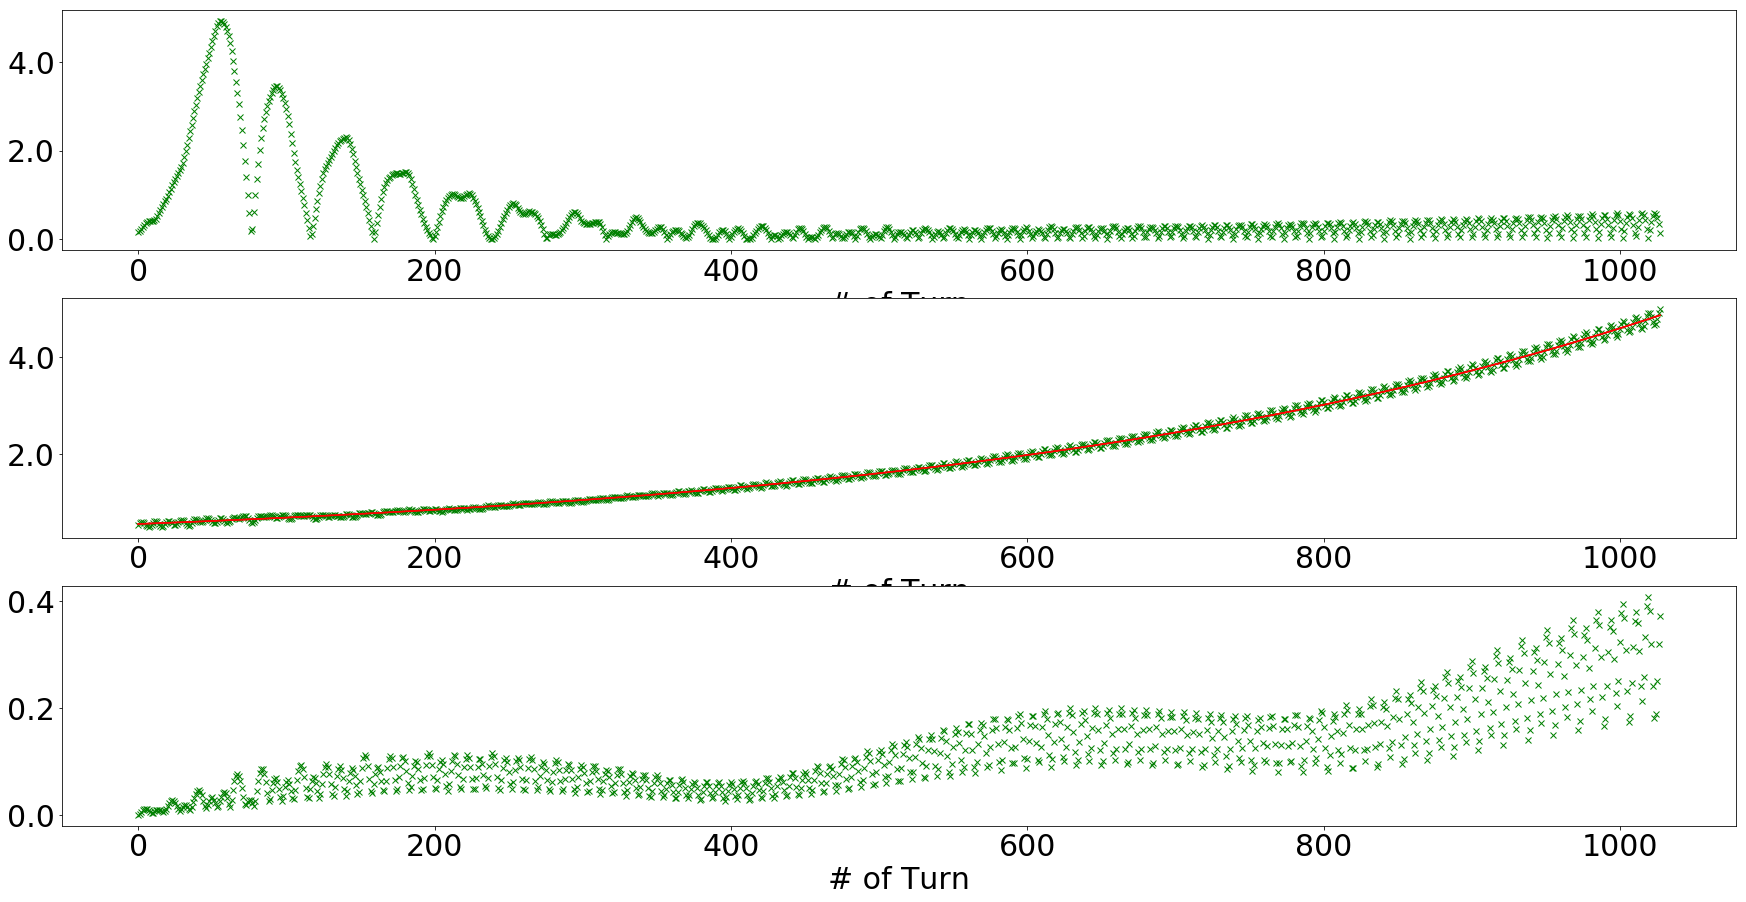

nmacro14400_nBin19_Idc1.02A_ThetaL0.0degree
[ 0.55814379  0.00244635  0.01435214]
[[  7.46502541e-05  -1.35945082e-07  -1.06140812e-04]
 [ -1.35945082e-07   2.50353180e-10   1.90006711e-07]
 [ -1.06140812e-04   1.90006711e-07   1.58652688e-04]]


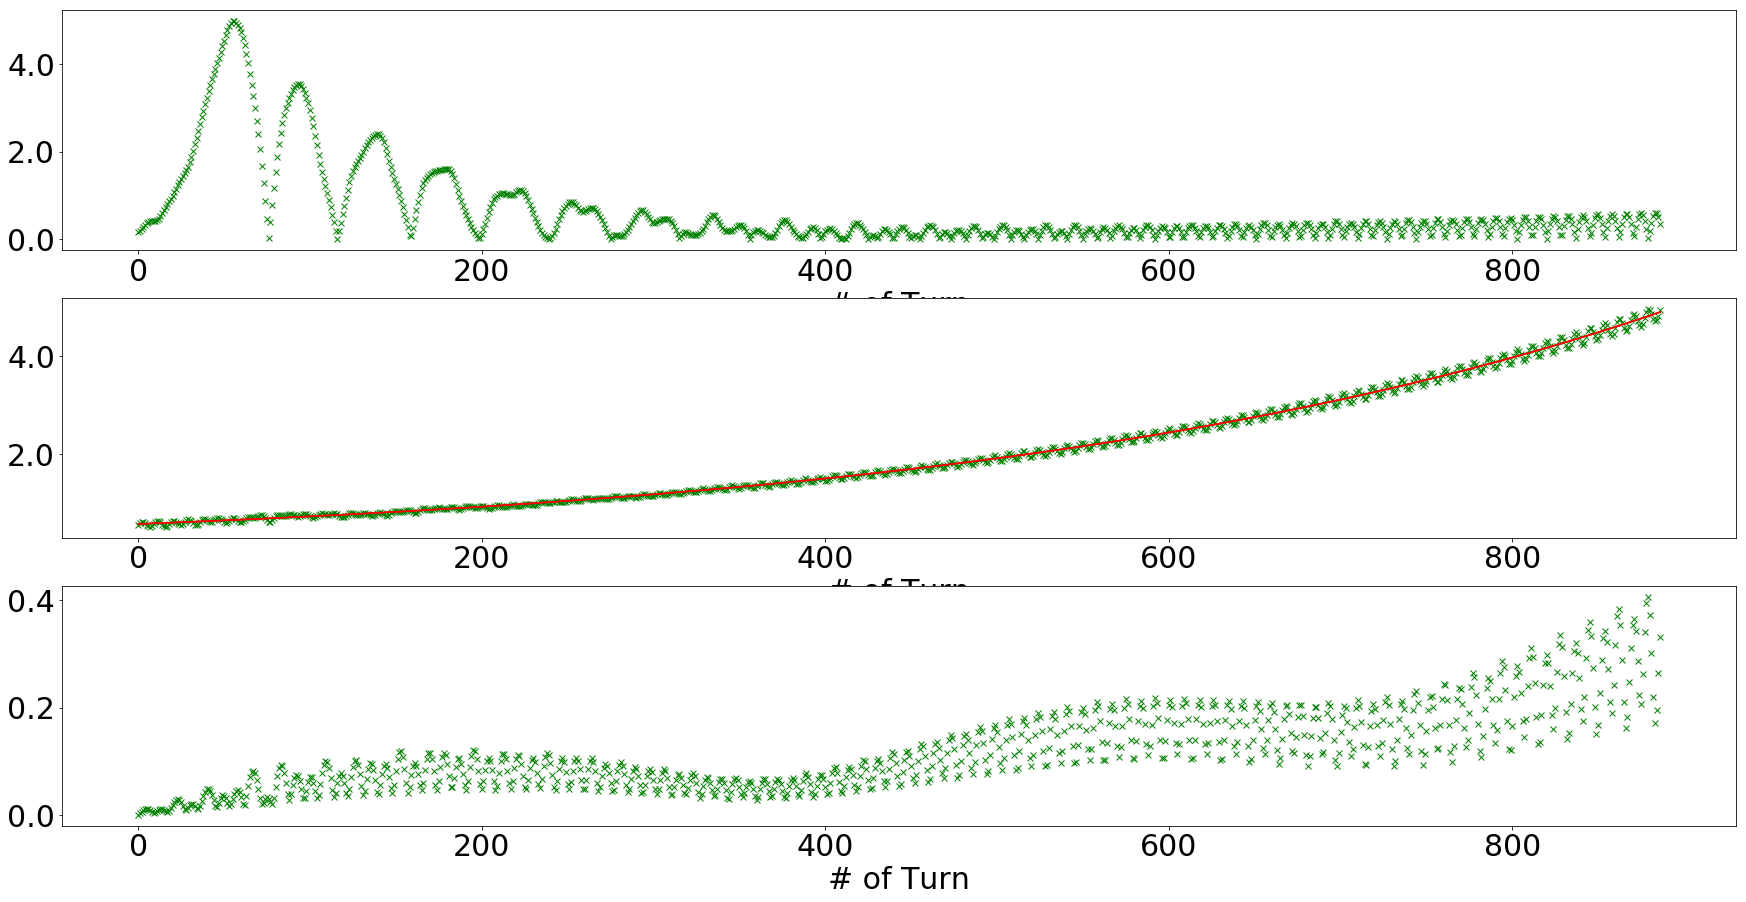

nmacro14400_nBin19_Idc1.06A_ThetaL0.0degree
[ 0.55324655  0.00283411  0.02443028]
[[  8.82092867e-05  -1.87870874e-07  -1.25336355e-04]
 [ -1.87870874e-07   4.04633502e-10   2.62413459e-07]
 [ -1.25336355e-04   2.62413459e-07   1.87195069e-04]]


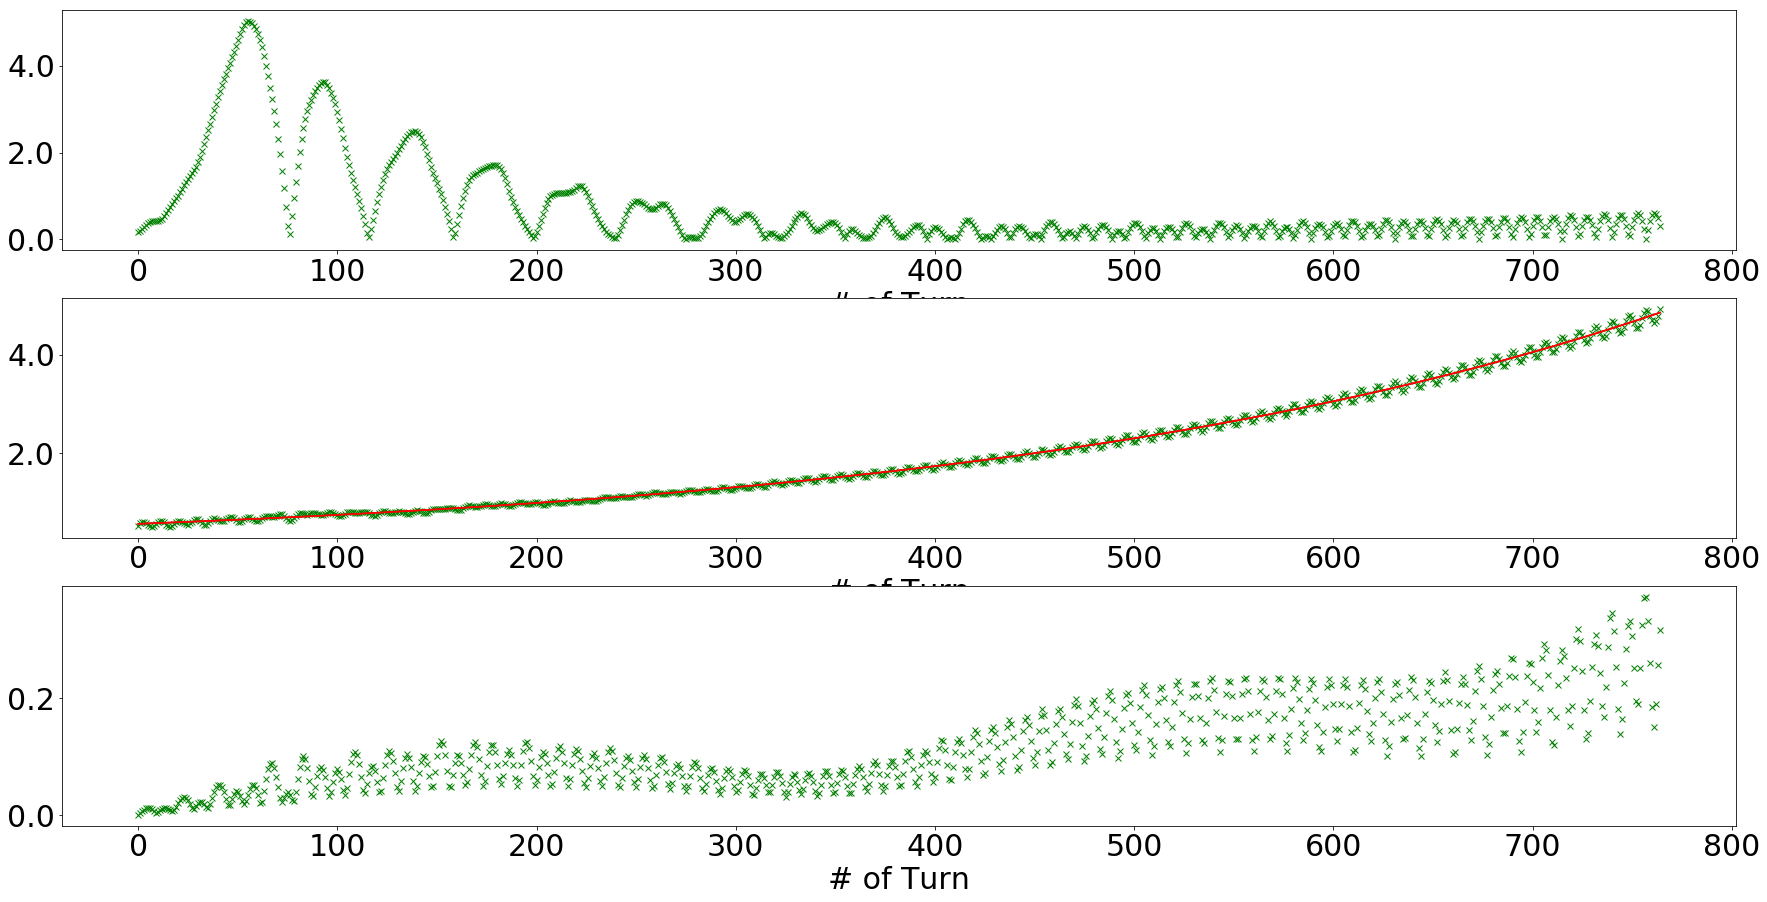

nmacro14400_nBin19_Idc1.10A_ThetaL0.0degree
[ 0.54983925  0.00326181  0.03338504]
[[  1.02275738e-04  -2.51148674e-07  -1.45926485e-04]
 [ -2.51148674e-07   6.23669199e-10   3.52193146e-07]
 [ -1.45926485e-04   3.52193146e-07   2.19078276e-04]]


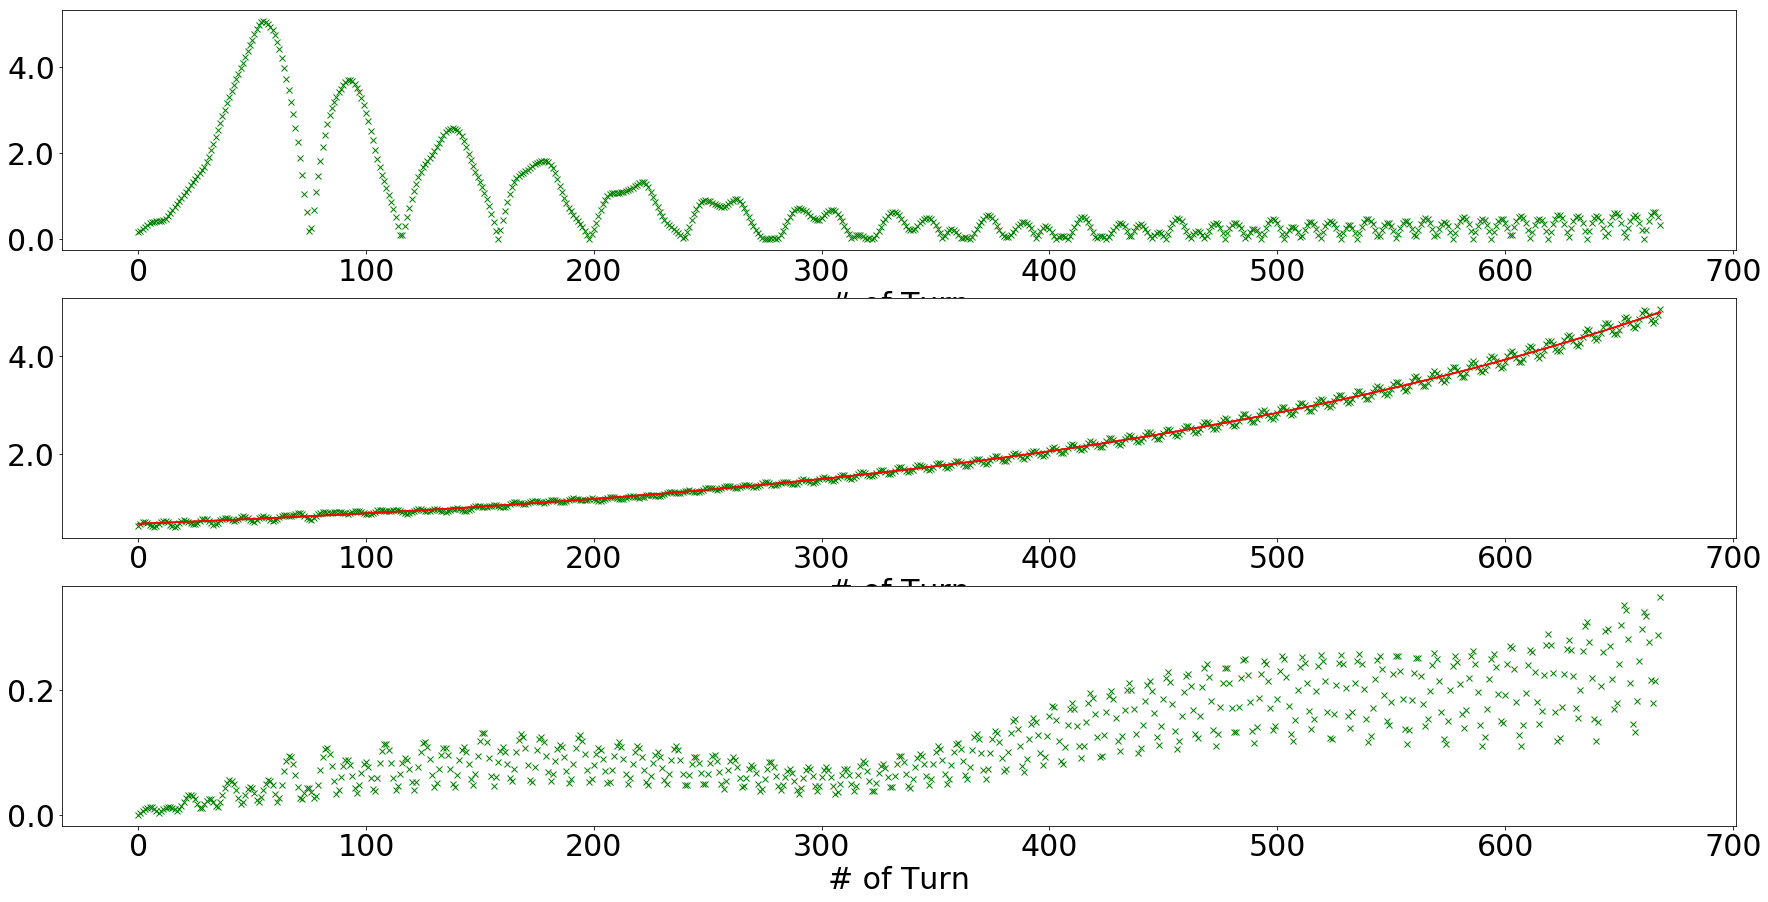

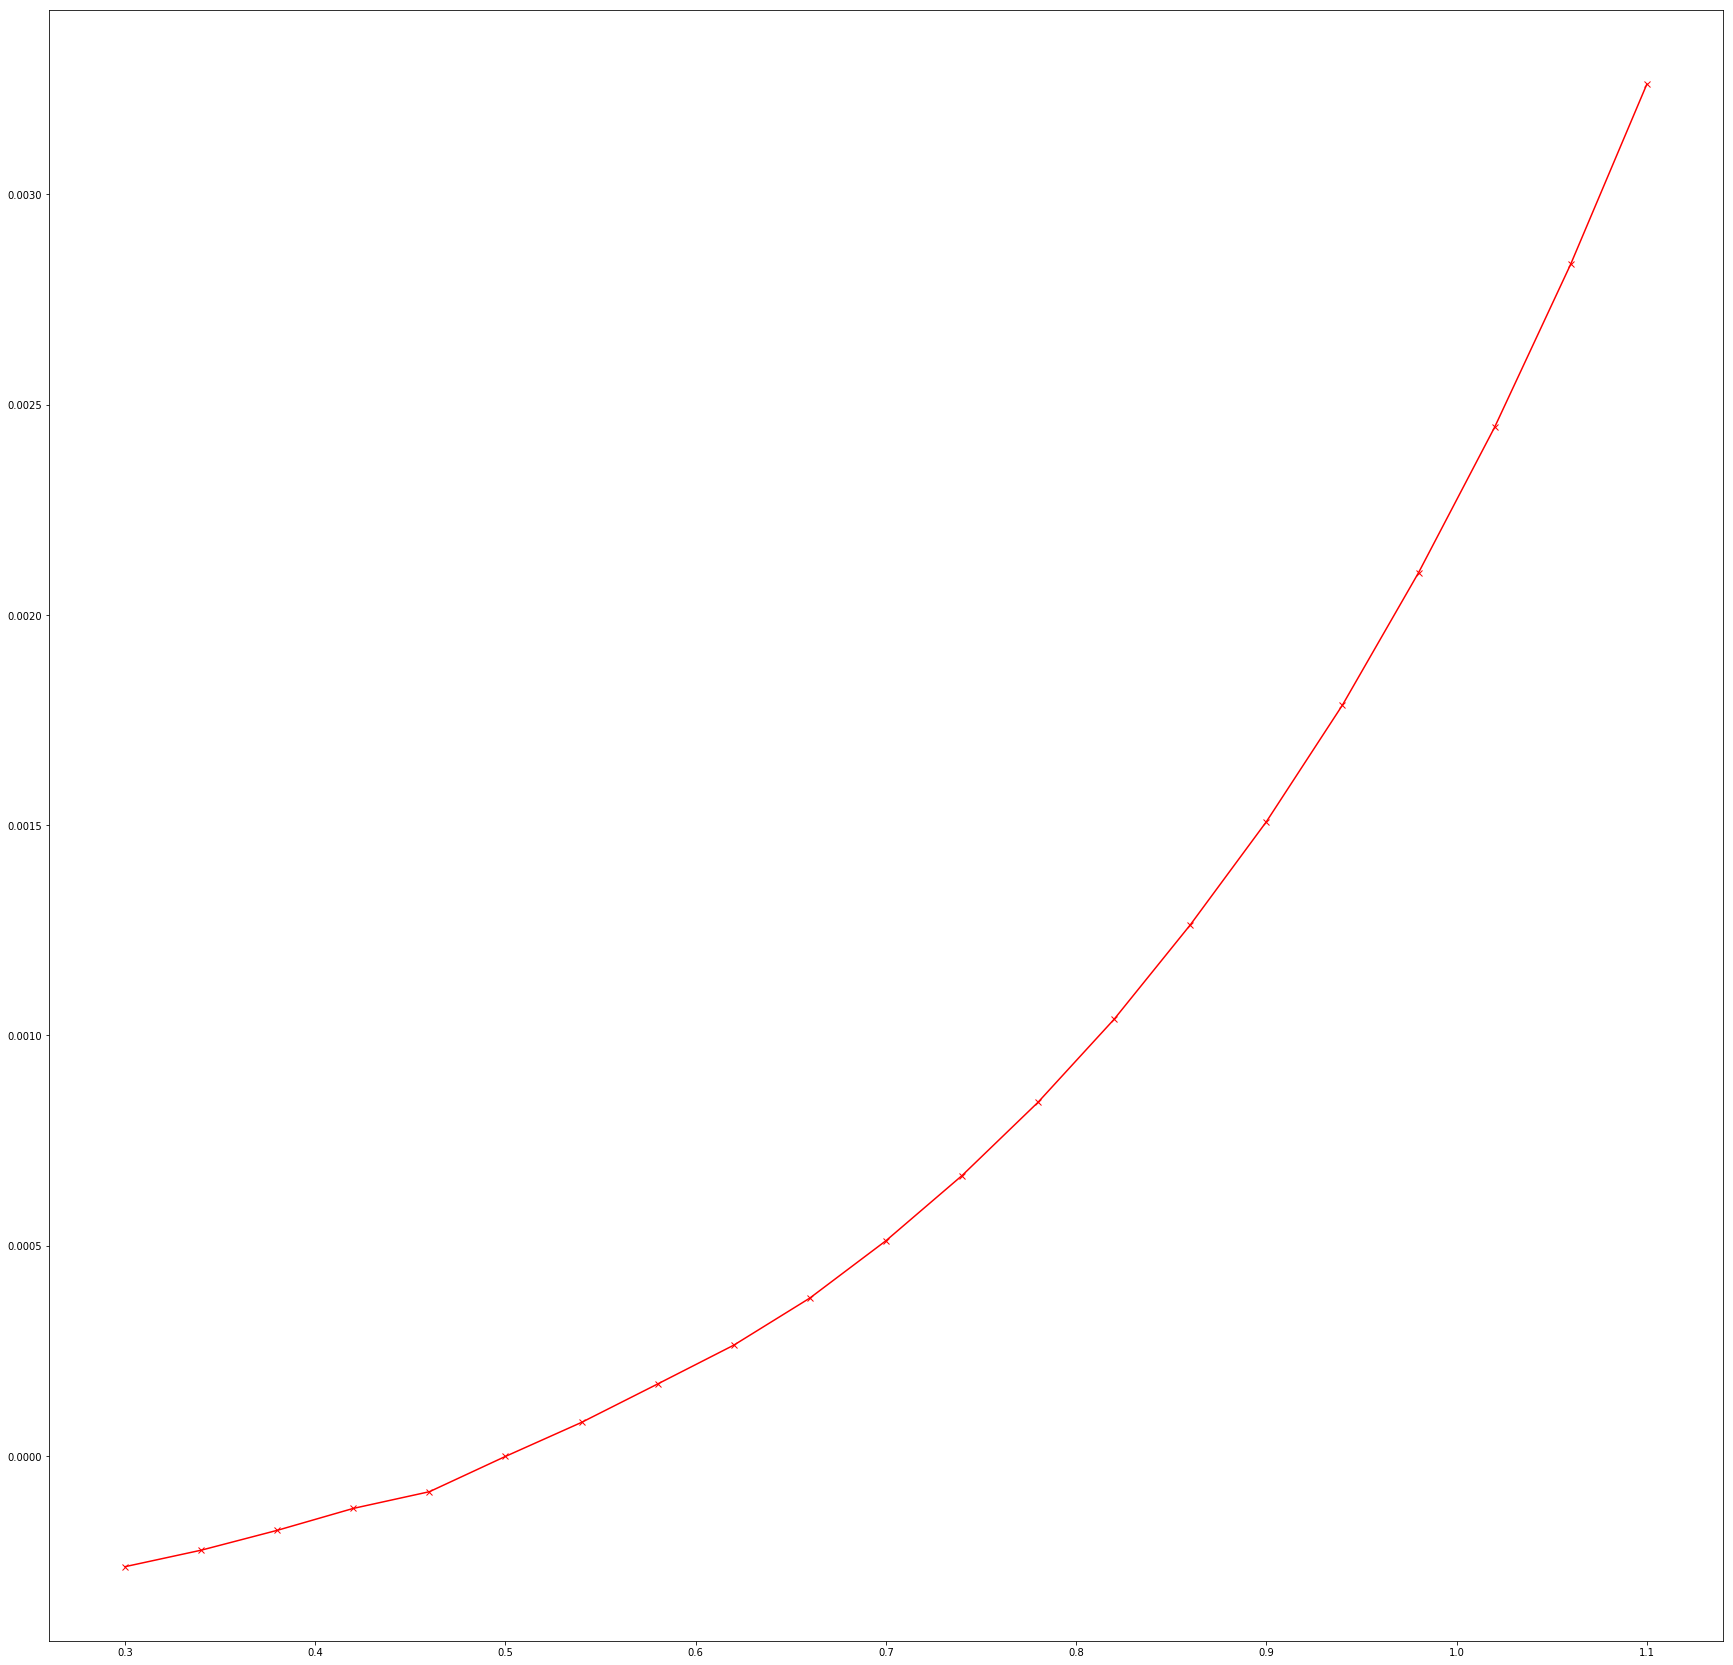

In [29]:
# get the fitted growth rate
# first, find the turn number where the mu=1 mode amplitude exceed certain value
def get_the_turn_number(c,value):
    for i in range(len(c)):
        if c[i]>=value:
            return i
    return i

inputfn = 'input.txt'
datafn = 'data.bin'
N_mode = 3
centroids = [(i*fill_step+0.5)*Trf[mainRF] for i in range(nBunch)]
qs = np.zeros(len(new_folders)) # to calculate the growth rate of mu=1
taus = np.zeros(len(new_folders)) # to calculate the growth rate of mu=1
q_guess = 0.01
qidx = 0
folders.sort()
for folder in new_folders:
    print(folder)
    os.chdir(os.path.join(home1,folder))
    cwd = os.getcwd()
    inputfile = os.path.join(cwd,inputfn)
    tempinput = {}
    with open(inputfile) as inputfile:
        for line in inputfile:
            if len(line.split())>1:
                tempinput[line.split()[0]] = line.split()[1:]
    for i in tempinput:
        for j in range(len(tempinput[i])):
            tempinput[i][j] = float(tempinput[i][j])
    nRF = int(tempinput['nRF'][0])
    nRF1 = int(tempinput['nRF1'][0])
    nRF2 = int(tempinput['nRF2'][0])
    nRFc = int(tempinput['nRFc'][0])

    
    nTurns = int(tempinput['n_turns'][0])
    nfill = int(tempinput['n_fill'][0])
    n_q_ramp = int(tempinput['n_q_ramp'][0])
    NpRF = int(tempinput['N_bins'][0])
    h = [int(i) for i in tempinput['h']]
    detune_ini = np.array([i for i in tempinput['detune_ini']])
    detune_final = np.array([i for i in tempinput['detune_final']])

    step = int(tempinput['step_store'][0])
    fill_step = int(tempinput['fill_step'][0])
    nBeam = int(tempinput['nBeam'][0])
    beam_shift = int(tempinput['beam_shift'][0])
    nBunch = int(tempinput['n_bunches'][0])
    nPar = int(tempinput['Npar'][0])
    NperBunch = int(tempinput['NperBunch'][0])
    nTot = nBunch*nPar*nBeam
    Gamma0 = tempinput['Gamma'][0]
    Rring = tempinput['R'][0]
    n_record = nTurns/step
    beta = np.sqrt(1-1/Gamma0**2)
    T0 = 2*np.pi*Rring/(clight*beta)
    f0 = 1/T0
    V0 = [i for i in tempinput['Vref_I']]
    V0Q = [i for i in tempinput['Vref_Q']]
    II = [i for i in tempinput['Iref_I']]
    IQ = [i for i in tempinput['Iref_Q']]
    mainRF = int(tempinput['mainRF'][0])
    Pbeam = tempinput['Prad'][0]
    if int(tempinput['type'][0]==2):
        atomicZ = 79
        Ek = Gamma0*E0Au
    else:
        atomicZ =1
    if int(tempinput['type'][0]==1):  
        Ek = Gamma0*E0Elec

    GMTSQ = tempinput['GMTSQ'][0]
    Ek_damp = tempinput['Ek_damp'][0]

    eta = 1/GMTSQ-1/Gamma0**2
    Qs = np.sqrt(h[mainRF]*atomicZ*np.abs(V0[mainRF])*eta/(2*np.pi*Ek))

    omegarf = 2*np.pi*(np.array(h)*f0)
    omegac = 2*np.pi*(np.array(h)*f0+detune_final)
    Trf = 2*np.pi/omegarf
    RoQ = [i for i in tempinput['RoQ']]
    QL = [i for i in tempinput['QL']]
    R = [RoQ[i]*QL[i] for i in range(nRF)]

    Th = 2*np.pi/omegarf[0]
    dthat =Th/NpRF

    pattern = 'd'+'dd'*nBeam+3*nRF*'d'
    n_stride = 1+2*nBeam+3*nRF
    stride = len(pattern)*8
    test = array('d')
    bucket_height = 2*Qs/(h[mainRF]*eta)*Gamma0


    
    M1_all = array('d')
    M1_fn = 'M1_all.bin'
    datafile = os.path.join(cwd,M1_fn)    
    with open(datafile, mode='rb') as file: # b is important -> binary
        M1_all.fromfile(file,2*nTurns*nBeam*nBunch)
    M1_1 = []
    M1_2 = []
    for i in range(nTurns):
        for j in range(nBunch):
            M1_1.append(M1_all[i*nBunch*2+j])
            M1_2.append(M1_all[i*nBunch*2+nBunch+j]-Gamma0)
    turns = np.array([i for i in range(nTurns*nBeam*nBunch)])

# calculate the components
    sincomp = []
    coscomp = []
    a = np.ndarray([N_mode,nTurns])
    b = np.ndarray([N_mode,nTurns])
    c = np.ndarray([N_mode,nTurns])
    
    value = 5 # the value where we stop the plotting
    idx = 0
    
    fig1,axes1 = plt.subplots(N_mode,1)
    fig1.set_figheight(15)
    fig1.set_figwidth(30)
    
    for mu in range(N_mode):
        sincomp.append(np.sin(-mu*2*pi*f0*np.array(centroids)))
        coscomp.append(np.cos(mu*2*pi*f0*np.array(centroids)))
        for i in range(nTurns):
            a[mu][i] = np.sum(sincomp[mu]*M1_2[i*nBunch:(i+1)*nBunch])/len(sincomp[mu])
            b[mu][i] = np.sum(coscomp[mu]*M1_2[i*nBunch:(i+1)*nBunch])/len(coscomp[mu])
        c[mu] = np.sqrt(np.array(a[mu])**2+np.array(b[mu])**2)
    idx = get_the_turn_number(c[1],value)
# fit the growth rate
    turn_temp = range(idx-nDynamic)
    cNew = c[1][nDynamic:idx]
    if qidx<=25:
        q_guess = 0.3
    else:
        q_guess = 0.3
    popt, pcov = curve_fit(func_exp_fit, turn_temp, \
                           cNew,bounds=([-cNew[0]*100,-q_guess,-cNew[0]*100], [cNew[0]*100, q_guess, cNew[0]*100]),\
                           maxfev=20000000)
    print(popt)
    print(pcov)
    qs[qidx] = popt[1]
    qidx+=1
    c_fit =  popt[0]*np.exp(popt[1]*turn_temp)+popt[2]
    for mu in range(N_mode):
        axes1[mu].plot(c[mu][nDynamic:idx],'gx')
        axes1[1].plot(c_fit,'r-')
        #axes1[1].legend(["growth_rate = "+str(qs[qidx])])
        axes1[mu].tick_params(labelsize=50)

        axes1[mu].set_xlabel('# of Turn',fontsize=30)

        axes1[mu].tick_params(labelsize=30)
        y_labels = axes1[mu].get_yticks()
        axes1[mu].yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))

    fn_after = os.path.join(cwd,'CB_Modes.jpg')
    plt.savefig(fn_after,bbox_inches='tight')
    plt.show()
os.chdir(home0)
current = [float(folder[i_start_current:i_start_current+4]) for folder in new_folders]
fig1,axes1 = plt.subplots(1,1)
fig1.set_figheight(30)
fig1.set_figwidth(30)
axes1.plot(current,qs,'rx-')
plt.show()
#taus = T0/qs

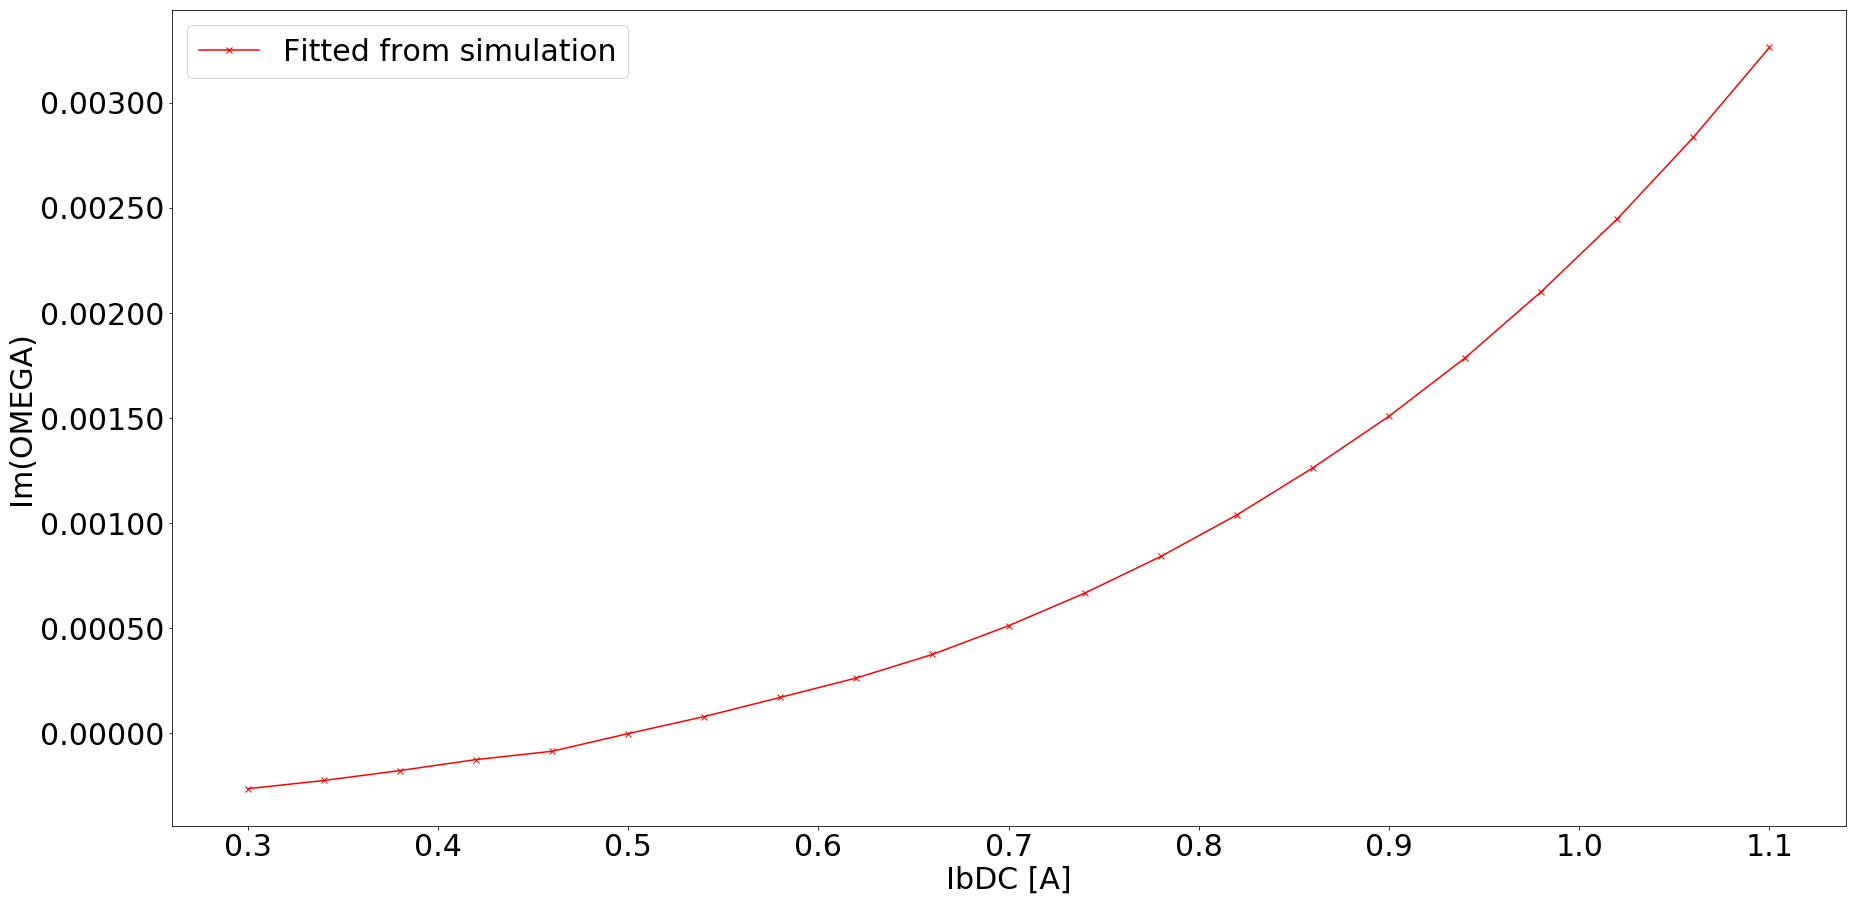

In [32]:
os.chdir(home0)
cwd = os.getcwd()
current = [float(folder[i_start_current:i_start_current+4]) for folder in new_folders]
fig1,axes1 = plt.subplots(1,1)
fig1.set_figheight(15)
fig1.set_figwidth(30)
axes1.plot(current,qs,'rx-')
axes1.set_xlabel('IbDC [A]',fontsize=30)

axes1.set_ylabel('Im(OMEGA)',fontsize=30)
axes1.set_xlabel('IbDC [A]',fontsize=30)
axes1.legend(["Fitted from simulation"],prop={'size': 30})
axes1.tick_params(labelsize=30)
y_labels = axes1.get_yticks()
axes1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.5f'))

fn_growth_rate = os.path.join(cwd,'growth_rate.jpg')
plt.savefig(fn_growth_rate,bbox_inches='tight')
plt.show()

-75.5767139724
-63.5297578053
-46.0602096213
-23.0688652662
5.55609318653
39.939623741
80.2204166859
126.551556581
179.101258289
238.053681944
303.609831704
375.988544066
455.427571188
542.184765591
636.53937227
738.793434438
849.273318978
968.331367203
1096.34767542
1233.73200881
1380.92584957


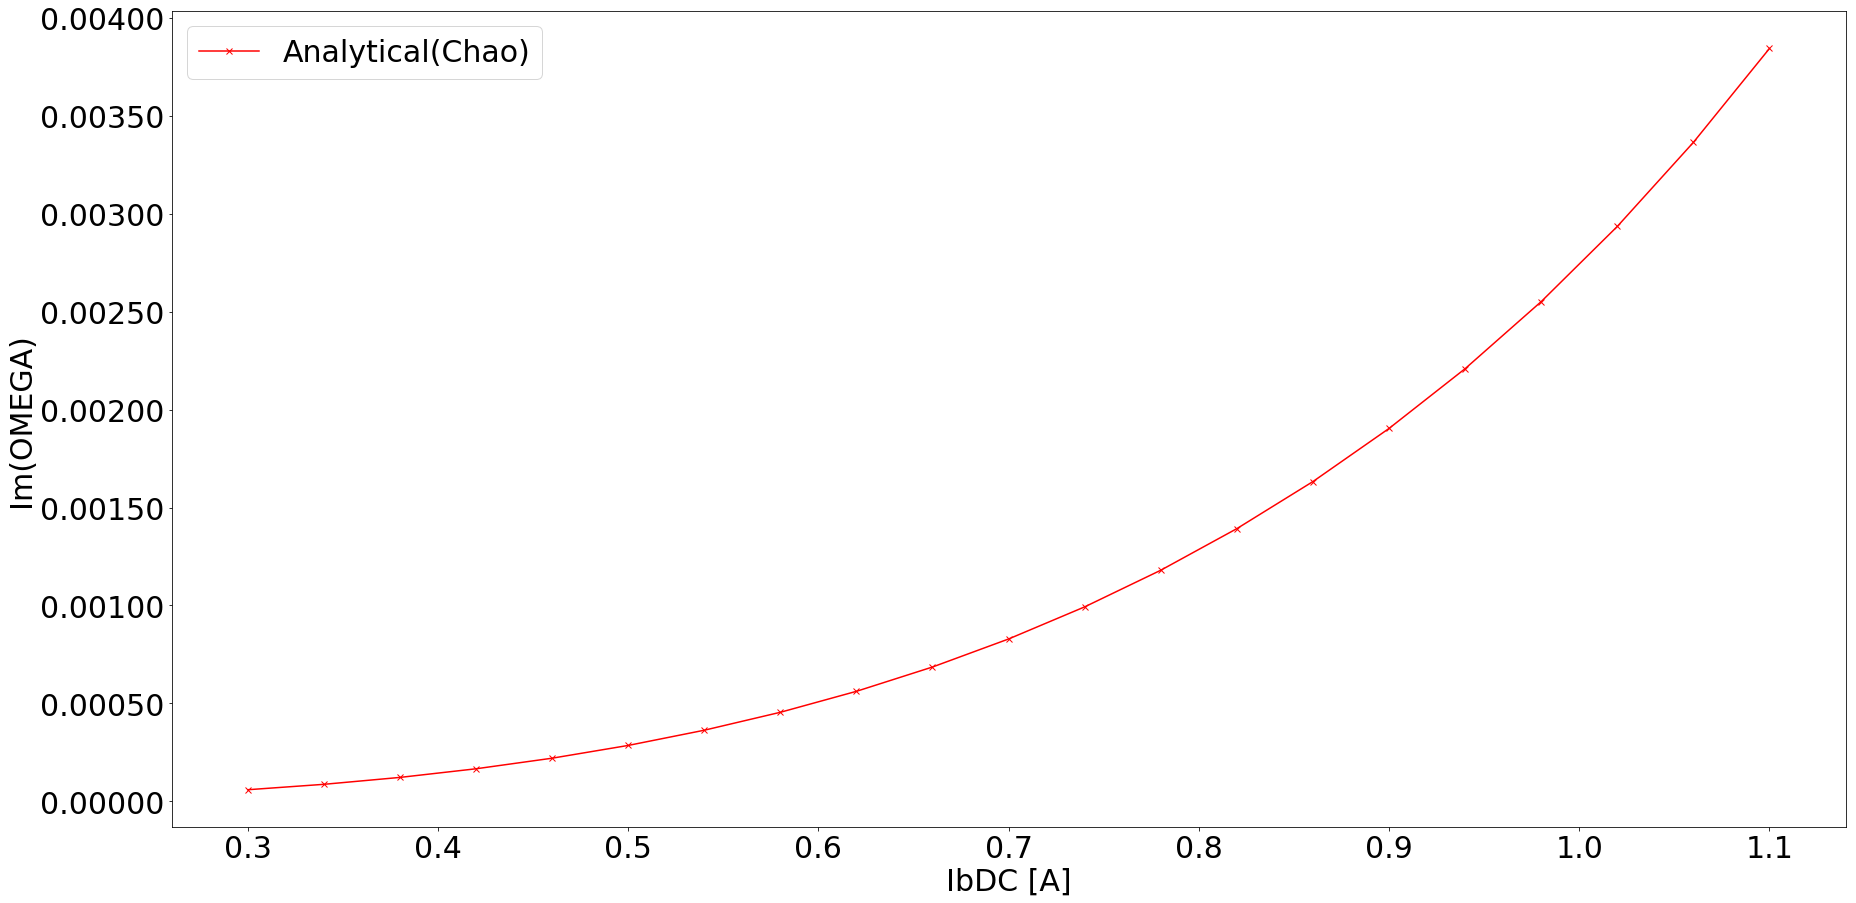

In [57]:
# get analitical number from simple formula (Chao's book)
def Zparallel(Rsh, QL, omega0, omega):
    return Rsh*omega/(omega+1j*QL*(omega0-omega**2/omega0)) # using the convention from A. Chao's book
# Small tune shift approximation
r0 = (1*1.6e-19)**2/(1*9.10938356e-31*3e8*3e8)

pmax = 1*nBunch # number of samples 

#only look at the mu=1 mode
mu = nBunch-1
delta_omega_Re = np.zeros(len(new_folders))
delta_omega_Im = np.zeros(len(new_folders))
ps = np.array([float(i) for i in range(-pmax,pmax)])

p_M_omega0 = ps*nBunch*2*np.pi*f0

omegas = Qs*2*pi*f0
qidx=0

for folder in new_folders[:]:
    #print(folder)
    os.chdir(os.path.join(home1,folder))
    cwd = os.getcwd()
    inputfile = os.path.join(cwd,inputfn)
    tempinput = {}
    with open(inputfile) as inputfile:
        for line in inputfile:
            if len(line.split())>1:
                tempinput[line.split()[0]] = line.split()[1:]
    for i in tempinput:
        for j in range(len(tempinput[i])):
            tempinput[i][j] = float(tempinput[i][j])
    nRF = int(tempinput['nRF'][0])
    nRF1 = int(tempinput['nRF1'][0])
    nRF2 = int(tempinput['nRF2'][0])
    nRFc = int(tempinput['nRFc'][0])

    
    nTurns = int(tempinput['n_turns'][0])
    nfill = int(tempinput['n_fill'][0])
    n_q_ramp = int(tempinput['n_q_ramp'][0])
    NpRF = int(tempinput['N_bins'][0])
    h = [int(i) for i in tempinput['h']]
    detune_ini = np.array([i for i in tempinput['detune_ini']])
    detune_final = np.array([i for i in tempinput['detune_final']])

    step = int(tempinput['step_store'][0])
    fill_step = int(tempinput['fill_step'][0])
    nBeam = int(tempinput['nBeam'][0])
    beam_shift = int(tempinput['beam_shift'][0])
    nBunch = int(tempinput['n_bunches'][0])
    nPar = int(tempinput['Npar'][0])
    NperBunch = int(tempinput['NperBunch'][0])
    nTot = nBunch*nPar*nBeam
    Gamma0 = tempinput['Gamma'][0]
    Rring = tempinput['R'][0]
    n_record = nTurns/step
    beta = np.sqrt(1-1/Gamma0**2)
    T0 = 2*np.pi*Rring/(clight*beta)
    f0 = 1/T0
    V0 = [i for i in tempinput['Vref_I']]
    V0Q = [i for i in tempinput['Vref_Q']]
    II = [i for i in tempinput['Iref_I']]
    IQ = [i for i in tempinput['Iref_Q']]
    mainRF = int(tempinput['mainRF'][0])
    Pbeam = tempinput['Prad'][0]
    if int(tempinput['type'][0]==2):
        atomicZ = 79
        Ek = Gamma0*E0Au
    else:
        atomicZ =1
    if int(tempinput['type'][0]==1):  
        Ek = Gamma0*E0Elec

    GMTSQ = tempinput['GMTSQ'][0]
    Ek_damp = tempinput['Ek_damp'][0]

    eta = 1/GMTSQ-1/Gamma0**2
    Qs = np.sqrt(h[mainRF]*atomicZ*np.abs(V0[mainRF])*eta/(2*np.pi*Ek))

    omegarf = 2*np.pi*(np.array(h)*f0)
    omegac = 2*np.pi*(np.array(h)*f0+detune_final)
    Trf = 2*np.pi/omegarf
    RoQ = [i for i in tempinput['RoQ']]
    QL = [i for i in tempinput['QL']]
    R = [RoQ[i]*QL[i] for i in range(nRF)]

    Th = 2*np.pi/omegarf[0]
    dthat =Th/NpRF

    pattern = 'd'+'dd'*nBeam+3*nRF*'d'
    n_stride = 1+2*nBeam+3*nRF
    stride = len(pattern)*8
    test = array('d')
    bucket_height = 2*Qs/(h[mainRF]*eta)*Gamma0
    # for the calculation of real part of Omega

    omegas1 = ((ps*nBunch+mu)*2*np.pi*f0+omegas) # using incoherent omegas for approximation
    Zs1 = np.array([Zparallel(R[i],QL[i],omegac[i],omegas1) for i in range(nRF)])
    factor1 = nBunch*NperBunch*r0*eta/(2*Gamma0*T0**2*omegas) # using incoherent omegas for approximation
    deltaOmegaRe = -factor1*np.sum(omegas1*np.imag(Zs1))
    print(deltaOmegaRe)

    # for the calculation of the imaginary part of Omega
    omegas2 = ((ps*nBunch+mu)*2*np.pi*f0+(omegas))

    factor2 = nBunch*NperBunch*r0*eta/(2*Gamma0*T0**2*(omegas))

    Zs2 = np.array([Zparallel(R[i],QL[i],omegac[i],omegas2) for i in range(nRF)])
    deltaOmegaIm = factor2*np.sum(omegas2*np.real(Zs2))
    delta_omega_Re[qidx] = deltaOmegaRe
    delta_omega_Im[qidx] = deltaOmegaIm
    #print(R, QL,detune_final,NperBunch)
    #print(qidx,deltaOmegaRe+omegas,';',deltaOmegaIm, ';',1/deltaOmegaIm)
    qidx+=1
os.chdir(home0)
cwd = os.getcwd()
#current = [float(folder[21:25]) for folder in folders]
fig1,axes1 = plt.subplots(1,1)
fig1.set_figheight(15)
fig1.set_figwidth(30)
axes1.plot(current,delta_omega_Im*T0,'rx-')
axes1.set_xlabel('IbDC [A]',fontsize=30)

axes1.set_ylabel('Im(OMEGA)',fontsize=30)
axes1.set_xlabel('IbDC [A]',fontsize=30)
axes1.legend(["Analytical(Chao)","Fitted from simulation"],prop={'size': 30})
axes1.tick_params(labelsize=30)
y_labels = axes1.get_yticks()
axes1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.5f'))

fn_growth_rate = os.path.join(cwd,'growth_rate_analytical.jpg')
plt.savefig(fn_growth_rate,bbox_inches='tight')
plt.show()

In [58]:
# iterative solver
def F(Omega,ps,mu,nRF,R,QL,omegac,nBunch, NperBunch,r0,eta,Gamma0,T0,Qs,f0):
    omegasamp = ((ps*nBunch+mu)*2*np.pi*f0+Omega)
    Zs = np.array([Zparallel(R,QL,omegac,omegasamp) for i in range(nRF)])
    factor = nBunch*NperBunch*r0*eta/(Gamma0*T0**2)
    return Omega**2-(1j*factor*np.sum(omegasamp*Zs)+(Qs*f0*2*pi)**2)

def SolveOmega(Omega,ps,mu,nRF,R,QL,omegac,nBunch, NperBunch,r0,eta,Gamma0,T0,Qs,f0,maxIter,accu):
    nIter = 0
    # initial values
    OmegaR = np.real(Omega)
    OmegaI = np.imag(Omega)
    # step size
    sig1 = 1
    sig2 = 1*1j
    Err = F(Omega,ps,mu,nRF,R,QL,omegac,nBunch, NperBunch,r0,eta,Gamma0,T0,Qs,f0)
    
    while(np.abs(Err)>accu and nIter<maxIter):
        OmegaR = np.real(Omega)
        OmegaI = np.imag(Omega)
        Err = F(Omega,ps,mu,nRF,R,QL,omegac,nBunch, NperBunch,r0,eta,Gamma0,T0,Qs,f0)
        F1 = F(Omega+sig1,ps,mu,nRF,R,QL,omegac,nBunch, NperBunch,r0,eta,Gamma0,T0,Qs,f0) # change OmegaRe by a small step
        F2 = F(Omega+sig2,ps,mu,nRF,R,QL,omegac,nBunch, NperBunch,r0,eta,Gamma0,T0,Qs,f0) # change OmegaIm by a small step
        Fre = np.real(Err)
        Fim = np.imag(Err)
        F1re = np.real(F1)
        F1im = np.imag(F1)
        F2re = np.real(F2)
        F2im = np.imag(F2)
        # approximate the Jacobian
        dF11 = F1re-Fre
        dF12 = F2re-Fre
        dF21 = F1im-Fim
        dF22 = F2im-Fim
        
        det = dF11*dF22-dF12*dF21
        # inverse the Jacobian
        dF11inv = dF22/det
        dF12inv = -dF12/det
        dF21inv = -dF21/det
        dF22inv = dF11/det

        OmegaR -= Fre*dF11inv+Fim*dF12inv
        OmegaI -= Fre*dF21inv+Fim*dF22inv
        Omega = OmegaR+OmegaI*1j
        nIter += 1
    return Omega
    print(Omega)
    print(np.abs(Err))
    print(nIter)


In [59]:
# Iteratively solve:
qidx=0
delta_omega_Re_Iter = np.zeros(len(new_folders))
delta_omega_Im_Iter = np.zeros(len(new_folders))
mus = [-1]
OMEAG_ini = [omegas*np.exp(1j*i/100*2*pi) for i in range(100)]
for folder in new_folders[:]:
    #print(folder)
    os.chdir(os.path.join(home1,folder))
    cwd = os.getcwd()
    inputfile = os.path.join(cwd,inputfn)
    tempinput = {}
    with open(inputfile) as inputfile:
        for line in inputfile:
            if len(line.split())>1:
                tempinput[line.split()[0]] = line.split()[1:]
    for i in tempinput:
        for j in range(len(tempinput[i])):
            tempinput[i][j] = float(tempinput[i][j])
    nRF = int(tempinput['nRF'][0])
    nRF1 = int(tempinput['nRF1'][0])
    nRF2 = int(tempinput['nRF2'][0])
    nRFc = int(tempinput['nRFc'][0])

    
    nTurns = int(tempinput['n_turns'][0])
    nfill = int(tempinput['n_fill'][0])
    n_q_ramp = int(tempinput['n_q_ramp'][0])
    NpRF = int(tempinput['N_bins'][0])
    h = [int(i) for i in tempinput['h']]
    detune_ini = np.array([i for i in tempinput['detune_ini']])
    detune_final = np.array([i for i in tempinput['detune_final']])

    step = int(tempinput['step_store'][0])
    fill_step = int(tempinput['fill_step'][0])
    nBeam = int(tempinput['nBeam'][0])
    beam_shift = int(tempinput['beam_shift'][0])
    nBunch = int(tempinput['n_bunches'][0])
    nPar = int(tempinput['Npar'][0])
    NperBunch = int(tempinput['NperBunch'][0])
    nTot = nBunch*nPar*nBeam
    Gamma0 = tempinput['Gamma'][0]
    Rring = tempinput['R'][0]
    n_record = nTurns/step
    beta = np.sqrt(1-1/Gamma0**2)
    T0 = 2*np.pi*Rring/(clight*beta)
    f0 = 1/T0
    V0 = [i for i in tempinput['Vref_I']]
    V0Q = [i for i in tempinput['Vref_Q']]
    II = [i for i in tempinput['Iref_I']]
    IQ = [i for i in tempinput['Iref_Q']]
    mainRF = int(tempinput['mainRF'][0])
    Pbeam = tempinput['Prad'][0]
    if int(tempinput['type'][0]==2):
        atomicZ = 79
        Ek = Gamma0*E0Au
    else:
        atomicZ =1
    if int(tempinput['type'][0]==1):  
        Ek = Gamma0*E0Elec

    GMTSQ = tempinput['GMTSQ'][0]
    Ek_damp = tempinput['Ek_damp'][0]

    eta = 1/GMTSQ-1/Gamma0**2
    Qs = np.sqrt(h[mainRF]*atomicZ*np.abs(V0[mainRF])*eta/(2*np.pi*Ek))

    omegarf = 2*np.pi*(np.array(h)*f0)
    omegac = 2*np.pi*(np.array(h)*f0+detune_final)
    Trf = 2*np.pi/omegarf
    RoQ = [i for i in tempinput['RoQ']]
    QL = [i for i in tempinput['QL']]
    R = [RoQ[i]*QL[i] for i in range(nRF)]

    Th = 2*np.pi/omegarf[0]
    dthat =Th/NpRF

    pattern = 'd'+'dd'*nBeam+3*nRF*'d'
    n_stride = 1+2*nBeam+3*nRF
    stride = len(pattern)*8
    test = array('d')
    for i in mus:
        maxOMEGAIM = -1e360
        for Omega in OMEAG_ini:
            temp = SolveOmega(Omega,ps,i,nRF,R,QL[0],omegac,nBunch, NperBunch,r0,eta,Gamma0,T0,Qs,f0,200,1e-9)
            if np.imag(temp)>maxOMEGAIM:
                maxOMEGAIM = np.imag(temp)
                delta_omega_Re_Iter[qidx] = np.real(temp)
                delta_omega_Im_Iter[qidx] = np.imag(temp)
        print(qidx,';',maxOMEGAIM,delta_omega_Re_Iter[qidx]/omegas,delta_omega_Im_Iter[qidx])
    qidx+=1


0 ; 4.660022340046458 26503.9241753 4.66002234005
1 ; 6.822999234249958 26515.999065 6.82299923425
2 ; 9.586353687621296 26533.5098705 9.58635368762
3 ; 13.033783807209957 26556.5500551 13.0337838072
4 ; 17.253500388079264 26585.2230481 17.2535003881
5 ; 22.338844736286298 26619.6426371 22.3388447363
6 ; 28.388963660856376 26659.9334087 28.3889636609
7 ; 35.50955082316638 26706.2312406 35.5095508232
8 ; 43.81366491020641 26758.683848 43.8136649102
9 ; 53.42263662628356 26817.4513891 53.4226366263
10 ; 64.46707829861158 26882.7071317 64.4670782986
11 ; 77.08801205273465 26954.6381871 77.0880120527
12 ; 91.43813502841228 27033.4463128 91.4381350284
13 ; 107.68324318468548 27119.3487922 107.683243185
14 ; 126.0038388139456 27212.5793924 126.003838814
15 ; 146.596951205912 27313.389406 146.596951206
16 ; 169.67820504783646 27422.0487811 169.678205048
17 ; 195.484177353878 27538.8473423 195.484177354
18 ; 224.27509100992242 27664.0961047 224.27509101
19 ; 256.3379020763612 27798.128682 256.

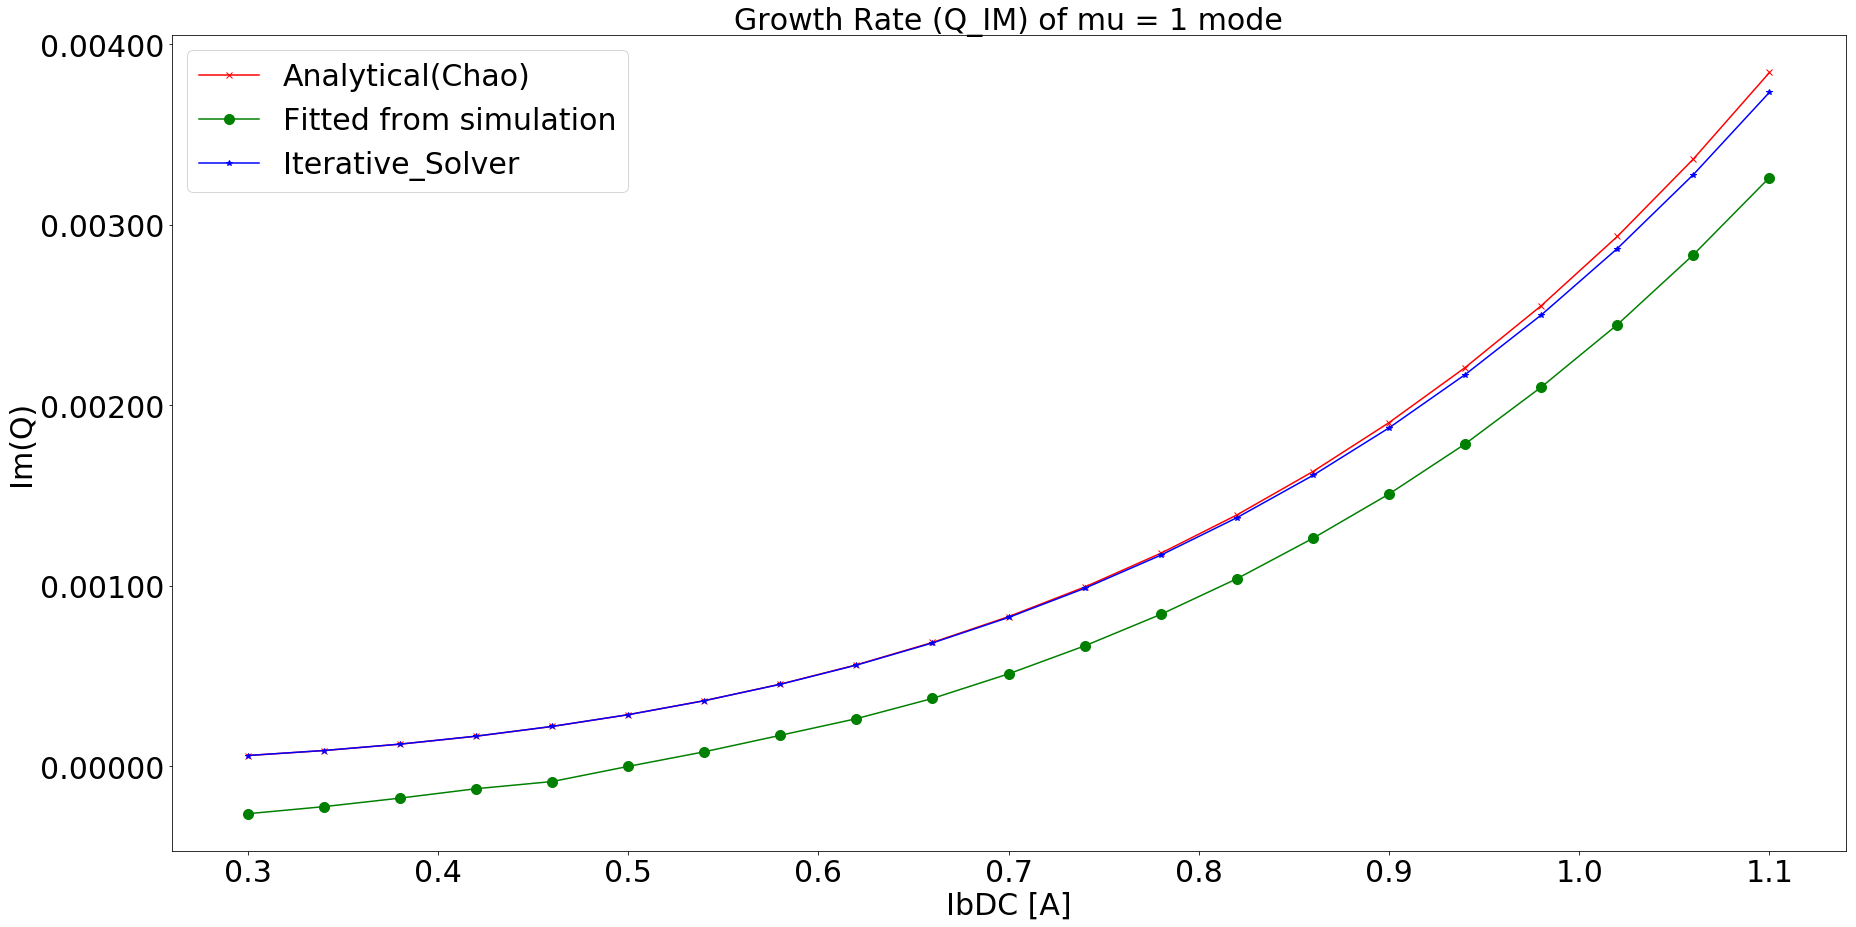

In [56]:
os.chdir(home0)
cwd = os.getcwd()
#current = [float(folder[21:25]) for folder in folders]
fig1,axes1 = plt.subplots(1,1)
fig1.set_figheight(15)
fig1.set_figwidth(30)
axes1.plot(current,delta_omega_Im*T0,'rx-')
axes1.plot(current,qs,'g.-', ms = 20)
axes1.plot(current,delta_omega_Im_Iter*T0,'b*-')

axes1.set_title('Growth Rate (Q_IM) of mu = 1 mode',fontsize=30)
axes1.set_ylabel('Im(Q)',fontsize=30)
axes1.set_xlabel('IbDC [A]',fontsize=30)
axes1.legend(["Analytical(Chao)","Fitted from simulation", "Iterative_Solver"],prop={'size': 30})
axes1.tick_params(labelsize=30)
y_labels = axes1.get_yticks()
axes1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.5f'))

fn_growth_rate = os.path.join(cwd,'growth_rate_fit_analy_iter.jpg')
plt.savefig(fn_growth_rate,bbox_inches='tight')
plt.show()

In [41]:
T0/t_rad_long

0.00035972801020304644

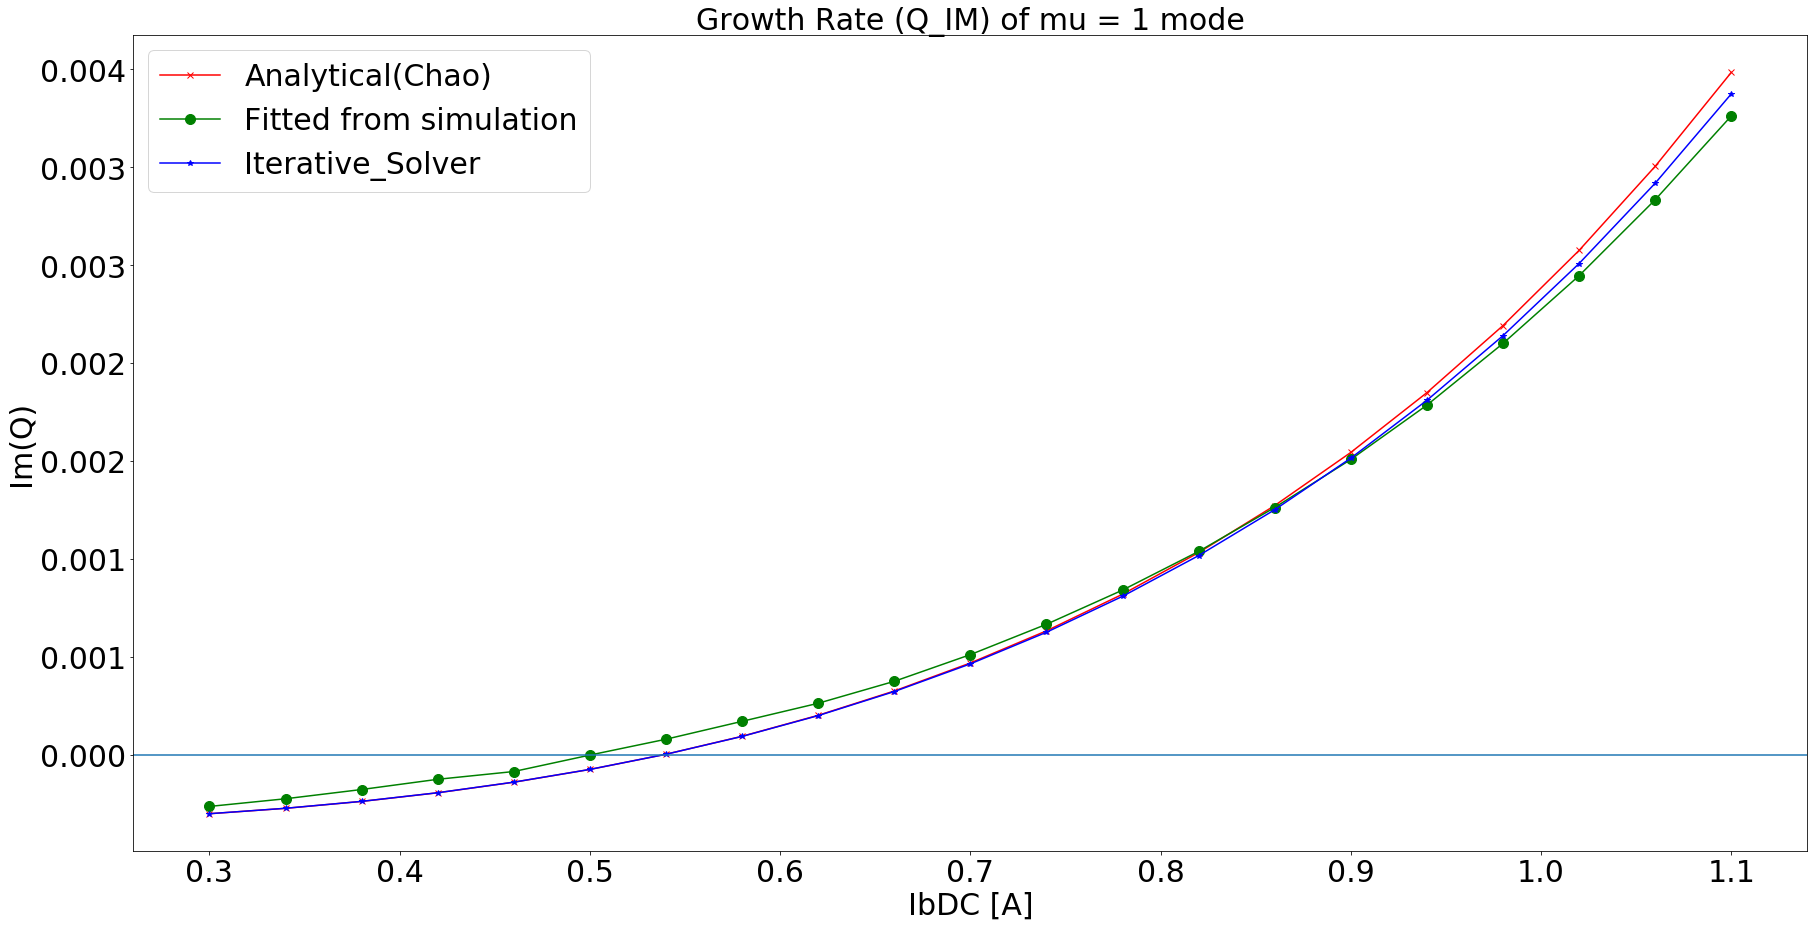

In [42]:
os.chdir(home0)
cwd = os.getcwd()
#current = [float(folder[21:25]) for folder in folders]
fig1,axes1 = plt.subplots(1,1)
fig1.set_figheight(15)
fig1.set_figwidth(30)
rng1 = 0
rng2 = 50
axes1.plot(current[rng1:rng2],delta_omega_Im[rng1:rng2]*T0-T0/t_rad_long,'rx-')
axes1.plot(current[rng1:rng2],qs[rng1:rng2],'g.-', ms = 20)
axes1.plot(current[rng1:rng2],delta_omega_Im_Iter[rng1:rng2]*T0-T0/t_rad_long,'b*-')
axes1.axhline(y=0)

axes1.set_title('Growth Rate (Q_IM) of mu = 1 mode',fontsize=30)
axes1.set_ylabel('Im(Q)',fontsize=30)
axes1.set_xlabel('IbDC [A]',fontsize=30)
axes1.legend(["Analytical(Chao)","Fitted from simulation", "Iterative_Solver"],prop={'size': 30})
axes1.tick_params(labelsize=30)
y_labels = axes1.get_yticks()
axes1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.3f'))

fn_growth_rate = os.path.join(cwd,'growth_rate_fit_analy_iter.jpg')
plt.savefig(fn_growth_rate,bbox_inches='tight')
plt.show()

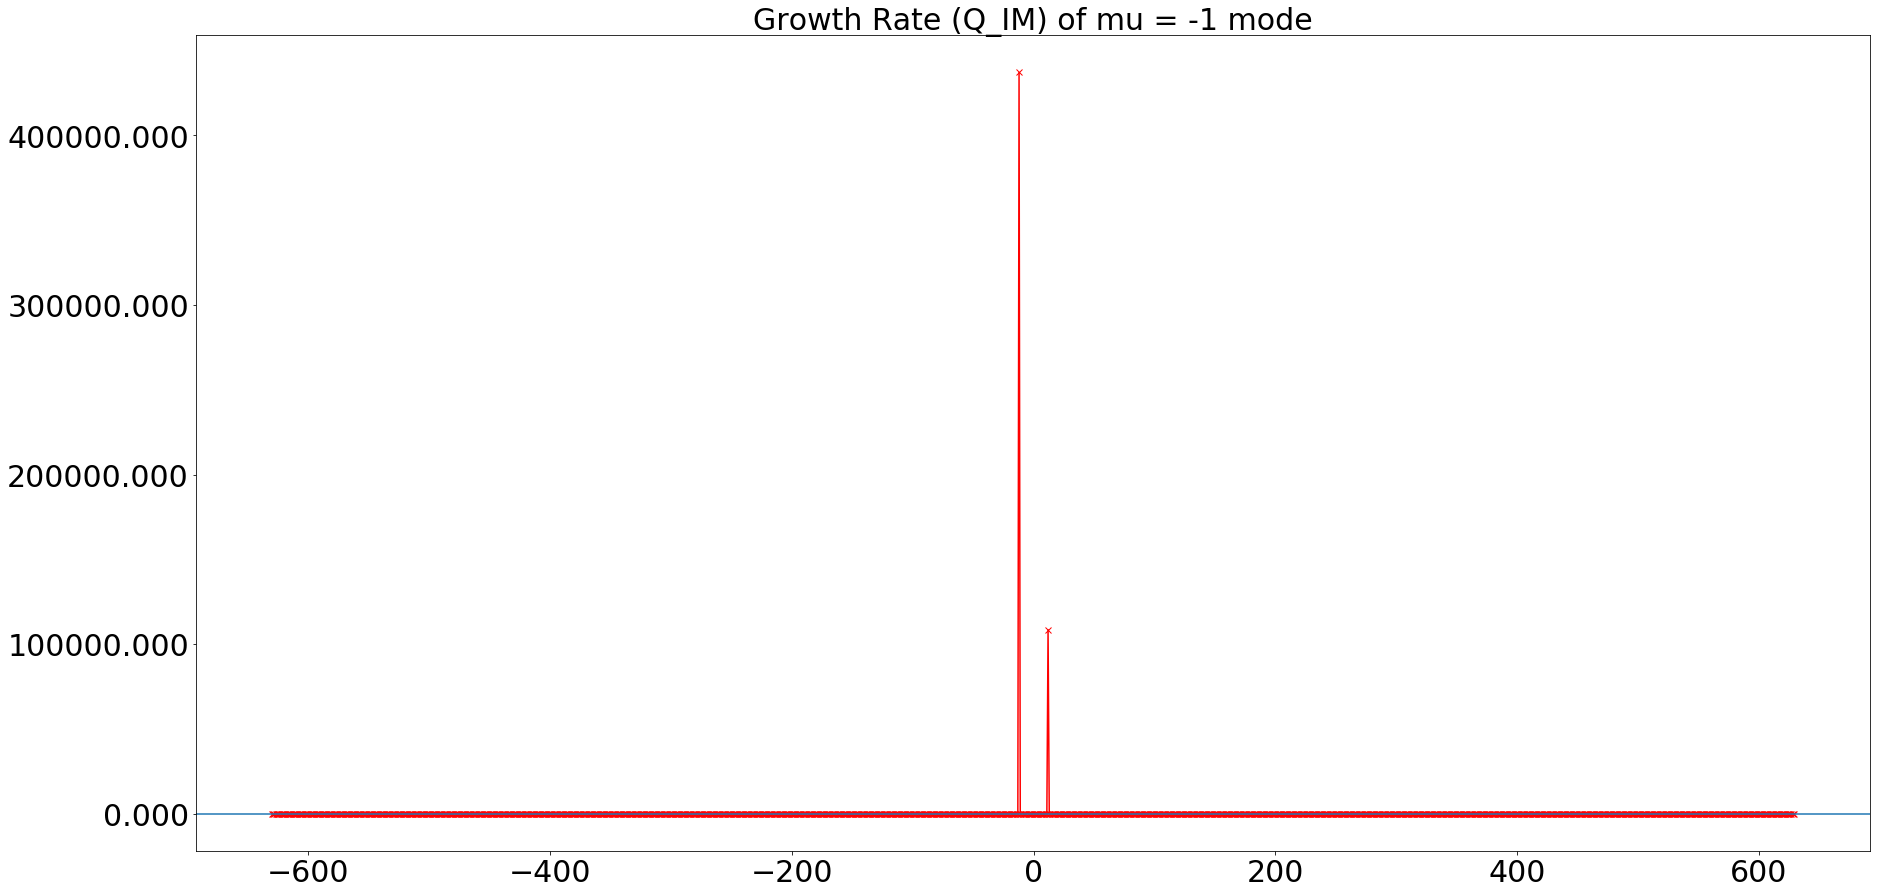

In [54]:
fig1,axes1 = plt.subplots(1,1)
fig1.set_figheight(15)
fig1.set_figwidth(30)
rng1 = 0
rng2 = 50
axes1.plot(ps,np.real(Zs2[0]),'rx-')

axes1.axhline(y=0)

axes1.set_title('Growth Rate (Q_IM) of mu = -1 mode',fontsize=30)

axes1.tick_params(labelsize=30)
y_labels = axes1.get_yticks()
axes1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.3f'))

plt.show()

In [ ]:
# M2
inputfn = 'input.txt'
datafn = 'data.bin'
N_mode = 3
centroids = [(i*fill_step+0.5)*Trf[mainRF] for i in range(nBunch)]
qs = np.zeros(len(folders)) # to calculate the growth rate of mu=1
taus = np.zeros(len(folders)) # to calculate the growth rate of mu=1
q_guess = 0.01
qidx = 0
folders.sort()
for folder in folders[:]:
    print(folder)
    os.chdir(os.path.join(home1,folder))
    cwd = os.getcwd()
    inputfile = os.path.join(cwd,inputfn)
    tempinput = {}
    with open(inputfile) as inputfile:
        for line in inputfile:
            if len(line.split())>1:
                tempinput[line.split()[0]] = line.split()[1:]
    for i in tempinput:
        for j in range(len(tempinput[i])):
            tempinput[i][j] = float(tempinput[i][j])
    nRF = int(tempinput['nRF'][0])
    nRF1 = int(tempinput['nRF1'][0])
    nRF2 = int(tempinput['nRF2'][0])
    nRFc = int(tempinput['nRFc'][0])

    
    nTurns = int(tempinput['n_turns'][0])
    nfill = int(tempinput['n_fill'][0])
    n_q_ramp = int(tempinput['n_q_ramp'][0])
    NpRF = int(tempinput['N_bins'][0])
    h = [int(i) for i in tempinput['h']]
    detune_ini = np.array([i for i in tempinput['detune_ini']])
    detune_final = np.array([i for i in tempinput['detune_final']])

    step = int(tempinput['step_store'][0])
    fill_step = int(tempinput['fill_step'][0])
    nBeam = int(tempinput['nBeam'][0])
    beam_shift = int(tempinput['beam_shift'][0])
    nBunch = int(tempinput['n_bunches'][0])
    nPar = int(tempinput['Npar'][0])
    NperBunch = int(tempinput['NperBunch'][0])
    nTot = nBunch*nPar*nBeam
    Gamma0 = tempinput['Gamma'][0]
    Rring = tempinput['R'][0]
    n_record = nTurns/step
    beta = np.sqrt(1-1/Gamma0**2)
    T0 = 2*np.pi*Rring/(clight*beta)
    f0 = 1/T0
    V0 = [i for i in tempinput['Vref_I']]
    V0Q = [i for i in tempinput['Vref_Q']]
    II = [i for i in tempinput['Iref_I']]
    IQ = [i for i in tempinput['Iref_Q']]
    mainRF = int(tempinput['mainRF'][0])
    Pbeam = tempinput['Prad'][0]
    if int(tempinput['type'][0]==2):
        atomicZ = 79
        Ek = Gamma0*E0Au
    else:
        atomicZ =1
    if int(tempinput['type'][0]==1):  
        Ek = Gamma0*E0Elec

    GMTSQ = tempinput['GMTSQ'][0]
    Ek_damp = tempinput['Ek_damp'][0]

    eta = 1/GMTSQ-1/Gamma0**2
    Qs = np.sqrt(h[mainRF]*atomicZ*np.abs(V0[mainRF])*eta/(2*np.pi*Ek))

    omegarf = 2*np.pi*(np.array(h)*f0)
    omegac = 2*np.pi*(np.array(h)*f0+detune_final)
    Trf = 2*np.pi/omegarf
    RoQ = [i for i in tempinput['RoQ']]
    QL = [i for i in tempinput['QL']]
    R = [RoQ[i]*QL[i] for i in range(nRF)]

    Th = 2*np.pi/omegarf[0]
    dthat =Th/NpRF

    pattern = 'd'+'dd'*nBeam+3*nRF*'d'
    n_stride = 1+2*nBeam+3*nRF
    stride = len(pattern)*8
    test = array('d')
    bucket_height = 2*Qs/(h[mainRF]*eta)*Gamma0

    
    M2_all = array('d')
    M2_fn = 'M2_all.bin'
    datafile = os.path.join(cwd,M2_fn)
    print(datafile)
    with open(datafile, mode='rb') as file: # b is important -> binary
        M2_all.fromfile(file,3*nTurns*nBeam*nBunch)
    M2_1 = []
    M2_2 = []
    M2_3 = []

    for i in range(nTurns):
        for j in range(nBunch):
            M2_1.append(M2_all[i*nBunch*3+j])
            M2_2.append(M2_all[i*nBunch*3+nBunch+j]-Gamma0)
            M2_1.append(M2_all[i*nBunch*3+nBunch*2+j])
    turns = np.array([i for i in range(nTurns*nBeam*nBunch)])
    plt.plot(M2_1[-nBunch:])
    plt.show()

In [ ]:
cwd

In [ ]:
inputfn = 'input.txt'
datafn = 'data.bin'
centroids = [(i*fill_step+0.5)*Trf[mainRF] for i in range(nBunch)]
for folder in folders[:]:
    print(folder)
    os.chdir(os.path.join(home1,folder))
    cwd = os.getcwd()
    inputfile = os.path.join(cwd,inputfn)
    tempinput = {}
    with open(inputfile) as inputfile:
        for line in inputfile:
            if len(line.split())>1:
                tempinput[line.split()[0]] = line.split()[1:]
    for i in tempinput:
        for j in range(len(tempinput[i])):
            tempinput[i][j] = float(tempinput[i][j])
    nRF = int(tempinput['nRF'][0])
    nRF1 = int(tempinput['nRF1'][0])
    nRF2 = int(tempinput['nRF2'][0])
    nRFc = int(tempinput['nRFc'][0])

    
    nTurns = int(tempinput['n_turns'][0])
    nfill = int(tempinput['n_fill'][0])
    n_q_ramp = int(tempinput['n_q_ramp'][0])
    NpRF = int(tempinput['N_bins'][0])
    h = [int(i) for i in tempinput['h']]
    detune_ini = np.array([i for i in tempinput['detune_ini']])
    detune_final = np.array([i for i in tempinput['detune_final']])

    step = int(tempinput['step_store'][0])
    fill_step = int(tempinput['fill_step'][0])
    nBeam = int(tempinput['nBeam'][0])
    beam_shift = int(tempinput['beam_shift'][0])
    nBunch = int(tempinput['n_bunches'][0])
    nPar = int(tempinput['Npar'][0])
    NperBunch = int(tempinput['NperBunch'][0])
    nTot = nBunch*nPar*nBeam
    Gamma0 = tempinput['Gamma'][0]
    Rring = tempinput['R'][0]
    n_record = nTurns/step
    beta = np.sqrt(1-1/Gamma0**2)
    T0 = 2*np.pi*Rring/(clight*beta)
    f0 = 1/T0
    V0 = [i for i in tempinput['Vref_I']]
    V0Q = [i for i in tempinput['Vref_Q']]
    II = [i for i in tempinput['Iref_I']]
    IQ = [i for i in tempinput['Iref_Q']]
    mainRF = int(tempinput['mainRF'][0])
    Pbeam = tempinput['Prad'][0]
    if int(tempinput['type'][0]==2):
        atomicZ = 79
        Ek = Gamma0*E0Au
    else:
        atomicZ =1
    if int(tempinput['type'][0]==1):  
        Ek = Gamma0*E0Elec

    GMTSQ = tempinput['GMTSQ'][0]
    Ek_damp = tempinput['Ek_damp'][0]

    eta = 1/GMTSQ-1/Gamma0**2
    Qs = np.sqrt(h[mainRF]*atomicZ*np.abs(V0[mainRF])*eta/(2*np.pi*Ek))

    omegarf = 2*np.pi*(np.array(h)*f0)
    omegac = 2*np.pi*(np.array(h)*f0+detune_final)
    Trf = 2*np.pi/omegarf
    RoQ = [i for i in tempinput['RoQ']]
    QL = [i for i in tempinput['QL']]
    R = [RoQ[i]*QL[i] for i in range(nRF)]

    Th = 2*np.pi/omegarf[0]
    dthat =Th/NpRF

    pattern = 'd'+'dd'*nBeam+3*nRF*'d'
    n_stride = 1+2*nBeam+3*nRF
    stride = len(pattern)*8
    test = array('d')
    bucket_height = 2*Qs/(h[mainRF]*eta)*Gamma0

    datafile = os.path.join(cwd,datafn)
    with open(datafile, mode='rb') as file: # b is important -> binary
        test.fromfile(file,int((n_stride)*nTurns/step*NpRF*h[0]))

    time = np.array(test[0::n_stride])
    Ibi = np.array(test[1::n_stride])
    #Ibi_1 = np.array(test[2::n_stride])
    Ibi2 = np.array(test[3::n_stride])

    V = []
    Ig = []
    #U = []
    Vref = []
    Iref = []
    Power = []
    for i in range(nRF):
        V.append(np.array(test[1+2*nBeam+0+i*3::n_stride]))
        Ig.append(np.array(test[1+2*nBeam+1+i*3::n_stride]))
        #U.append(np.array(test[1+2*nBeam+2+i*3::n_stride]))
        print(V0[i],V0Q[i])
        Vref.append(V0[i]*np.sin(omegarf[i]*time)+V0Q[i]*np.cos(omegarf[i]*time))
        Iref.append(II[i]*np.sin(omegarf[i]*time)+IQ[i]*np.cos(omegarf[i]*time))
        Power.append(V[i]*Ig[i])

    datafilepar = 'first.bin'
    datafilepar = os.path.join(cwd,datafilepar)
    with open(datafilepar, mode='rb') as file: # b is important -> binary
        fileContent = file.read()
    datapar = np.array([struct.unpack('dd',fileContent[i*16:(i+1)*16]) for i in range(int(len(fileContent)/16))]).T
    first_dt = np.array(datapar[0])
    first_gamma = np.array(datapar[1])

    rng1 =  0
    rng2 = int(nTurns-1)

    step1 = 1

    fig1,axes1 = plt.subplots(1,1)

    axes1.plot(first_gamma[rng1:rng2:step1]-Gamma0,'rx-',ms=1)

    axes1.set_xlabel('# of Turn',fontsize=30)
    axes1.set_ylabel('Delta Gamma (first bunch)',fontsize=30)
    axes1.tick_params(labelsize=30)
    y_labels = axes1.get_yticks()
    axes1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.4f'))
    fig1.set_figheight(15)
    fig1.set_figwidth(30)
    fn_Bench = os.path.join(cwd,'Delta_gamma_first_bunch.jpg')
    plt.savefig(fn_Bench,bbox_inches='tight')
    plt.show()


    
    M1_all = array('d')
    M1_fn = 'M1_all.bin'
    datafile = os.path.join(cwd,M1_fn)    
    with open(datafile, mode='rb') as file: # b is important -> binary
        M1_all.fromfile(file,2*nTurns*nBeam*nBunch)
    M1_1 = []
    M1_2 = []
    for i in range(nTurns):
        for j in range(nBunch):
            M1_1.append(M1_all[i*nBunch*2+j])
            M1_2.append(M1_all[i*nBunch*2+nBunch+j]-Gamma0)
    turns = np.array([i for i in range(nTurns*nBeam*nBunch)])
    turn_display = 7500
    rng1 =  turn_display*nBeam*nBunch
    rng2= rng1+nBunch*1
    rng3= rng2+5#nBunch*1
    fig1,axes1 = plt.subplots(1,1)
    axes1.plot(turns[rng1:rng2],np.array(M1_2[rng1:rng2]),'r.-')
    axes1.plot(turns[rng2:rng3],np.array(M1_2[rng2:rng3]),'gx-')

    fig1.set_figheight(15)
    fig1.set_figwidth(30)

    axes1.set_xlabel('bunch #',fontsize=30)
    axes1.set_ylabel('Gamma_Centroid',fontsize=30)
    axes1.tick_params(labelsize=30)
    y_labels = axes1.get_yticks()
    axes1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.5f'))
    #fn_Ipeak = os.path.join(cwd,'Ipeak.jpg')
    #plt.savefig(fn_Ipeak,bbox_inches='tight')
    plt.show()
    sin0 = np.sin(0*2*pi*f0*np.array(centroids))
    cos0 = np.cos(0*2*pi*f0*np.array(centroids))
    sin1 = np.sin(1*2*pi*f0*np.array(centroids))
    cos1 = np.cos(1*2*pi*f0*np.array(centroids))
    a0 = []
    b0 = []
    c0 = []
    a1 = []
    b1 = []
    c1 = []
    for i in range(nTurns):
        a0.append(np.sum(sin0*M1_2[i*nBunch:(i+1)*nBunch])/len(sin0))
        b0.append(np.sum(cos0*M1_2[i*nBunch:(i+1)*nBunch])/len(sin0))
        a1.append(np.sum(sin1*M1_2[i*nBunch:(i+1)*nBunch])/len(sin1))
        b1.append(np.sum(cos1*M1_2[i*nBunch:(i+1)*nBunch])/len(sin1))
    c0 = np.array(a0)**2+np.array(b0)**2
    c1 = np.array(a1)**2+np.array(b1)**2
    
    fig1,axes1 = plt.subplots(2,1)
    axes1[0].plot(np.sqrt(c0))
    axes1[1].plot(np.sqrt(c1))
    fig1.set_figheight(15)
    fig1.set_figwidth(30)
    axes1[0].tick_params(labelsize=50)

    axes1[0].set_xlabel('# of Turn',fontsize=30)
   
    axes1[0].tick_params(labelsize=30)
    y_labels = axes1[0].get_yticks()
    axes1[0].yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))

    fn_after = os.path.join(cwd,'CB_Modes.jpg')
    plt.savefig(fn_after,bbox_inches='tight')
    plt.show()
    

backup zone

In [ ]:
# Power
Power_average1 = 0.5*np.array([np.mean(Power[0][i*h[0]*NpRF:(i+1)*h[0]*NpRF]) for i in range(int(n_record))])
Power_average = Power_average1#+Power_average2
fig1,axes1 = plt.subplots(1,1)
axes1.plot(Power_average/1e6)
axes1.axhline(y = Pbeam/1e6)
fig1.set_figheight(30)
fig1.set_figwidth(30)

plt.show()
os.chdir(home1)
# VI

startTurn =int(nTurns/step-1)
startRF = 0 
nRFsamp = 1

rng1 = NpRF*(h[0]*startTurn+startRF)+int(3*NpRF/8)*0
rng2 = NpRF*(h[0]*startTurn+startRF+nRFsamp)-int(3*NpRF/8)*0
step1 = 1
step2 = 1

if nRF>1:
    fig1,axes1 = plt.subplots(4,nRF)
    for i in range(nRF):
        axes1[0][i].plot(V[i][rng1:rng2:step1],'r.-',ms=10)
        axes1[0][i].plot((Vref[i])[rng1:rng2:step1],'g.-',ms=10)
        axes1[0][i].axhline(y=0)
        axes1[0][0].axhline(y=3.7e6/14*8)
        axes1[0][1].axhline(y=3.7e6/14*6)
        axes1[0][0].axhline(y=Vnew*NF)
        axes1[0][1].axhline(y=Vnew*ND)
        axes1[0][i].axvline(x=int(NpRF/2))
        axes1[1][i].plot(Ibi[rng1:rng2:step1],'r.-',ms=10)
        if nBeam == 2 :
            axes1[1][i].plot(Ibi2[rng1:rng2:step1],'g.-',ms=10)
        axes1[2][i].plot((V[i]-Vref[i])[rng1:rng2:step1],'r.-',ms=10)
        axes1[2][i].set_ylim([-3e4,3e4])
        axes1[2][i].axvline(x=int(NpRF/2))
        axes1[3][i].plot((Ig[i])[rng1:rng2:step1],'r.-',ms=10)
        axes1[3][i].plot((Iref[i])[rng1:rng2:step1],'g-',ms=10)
        #axes1[3][i].plot((Iref[i]-Ig[i])[rng1:rng2:step1],'g-',ms=10)
        axes1[3][i].axvline(x=int(NpRF/2))
        #axes1[0][i].set_ylim([-3e6,3e6])
else:
    fig1,axes1 = plt.subplots(4,1)
    for i in range(nRF):
        axes1[0].plot(V[i][rng1:rng2:step1],'rx-',ms=10)
        axes1[0].plot((Vref[i])[rng1:rng2:step1],'g.-',ms=10)
        axes1[0].axhline(y=0)
        axes1[0].axhline(y=-V0Q[0])
        axes1[0].axhline(y=-V0Q[0])
        axes1[0].axvline(x=int(NpRF/2))
        #axes1[0].set_ylim([3.0e6,4e6])
        axes1[1].plot(Ibi[rng1:rng2:step1],'r.-',ms=10)
        axes1[1].axvline(x=int(NpRF/2))
        axes1[2].plot((V[i]-Vref[i])[rng1:rng2:step1],'r.-',ms=10)
        axes1[2].set_ylim([-4e4,4e4])
        axes1[2].axhline(y=0)
        axes1[3].plot((Ig[i])[rng1:rng2:step1],'r.-',ms=10)
        axes1[3].plot((Iref[i])[rng1:rng2:step1],'g.-',ms=10)
        axes1[3].axhline(y=0)
        axes1[3].axvline(x=int(NpRF/2))
fig1.set_figheight(30)
fig1.set_figwidth(30)

fn_VI = os.path.join(cwd,'VI'+str(startTurn*step)+'.jpg')
plt.savefig(fn_VI,bbox_inches='tight')
plt.show()
#V_frq

datafile = 'f_cav.bin'
datafile = os.path.join(cwd,datafile)
pattern = nRF*'d'
stride = len(pattern)*8
with open(datafile, mode='rb') as file: # b is important -> binary
    fileContent = file.read()
data = np.array([struct.unpack(pattern,fileContent[i*stride:(i+1)*stride]) for i in range(int(len(fileContent)/stride))]).T
frqs = []
for i in range(nRF):
    frqs.append(np.array(data[i])/2/np.pi)
V_max = []
Ig_max = []
for i in range(nRF):
    V_max.append([])
    Ig_max.append([])
    for j in range(int(len(V[i])/NpRF/h[0])-1):
        V_max[i].append(np.max(V[i][j*NpRF*h[0]:(j+1)*NpRF*h[0]]))
        #Ig_max[i].append(np.max(Ig[i][j*NpRF*h[0]:(j+1)*NpRF*h[0]]))
start = 0 # this number times n_per_step gives real turn number 
end = int(nTurns/step)
if nRF>1:
    fig1,axes1 = plt.subplots(2,nRF)
    for i in range(nRF):
        axes1[0][i].plot(V_max[i][start:end],'r.-',ms=10)
        #axes1[0][i].set_yscale('log')
        axes1[1][i].axhline(y = h[i])
        #axes1[1][i].axhline(y = omegarf[i]/(omegarf[0]/h[0])+1)
        #axes1[1][i].axhline(y = omegarf[i]/(omegarf[0]/h[0])-1)
        #axes1[2][i].plot(Ig_max[i][start:end],'r.-',ms=10)
        axes1[1][i].plot(frqs[i][start:end]/(omegarf[0]/h[0]/2/np.pi),'r.-',ms=10)        
else:
    fig1,axes1 = plt.subplots(4,1)
    for i in range(nRF):
        axes1[0].plot(V_max[i][start:end],'r.-',ms=10)
        axes1[1].plot(frqs[i][start:end]/(omegarf[0]/h[0]/2/np.pi),'r.-',ms=10)   
        #axes1[1].axhline(y = omegarf[i]/(omegarf[0]/h[0]))

fig1.set_figheight(15)
fig1.set_figwidth(30)

fn_proc = os.path.join(cwd,'process.jpg')
plt.savefig(fn_proc,bbox_inches='tight')
plt.show()

datafilepar = 'init.bin'
datafilepar = os.path.join(cwd,datafilepar)
pat = nTot*'d'
strd = nTot*8
with open(datafilepar, mode='rb') as file: # b is important -> binary
    fileContent = file.read()
datapar = np.array([struct.unpack(pat,fileContent[i*strd:(i+1)*strd]) for i in range(int(len(fileContent)/strd))])
dt_init = np.array(datapar[0])
gamma_init = np.array(datapar[1])

rng1 =  0*nPar
rng2 = int(1*nPar)
step1 = 1

fig1,axes1 = plt.subplots(1,1)

axes1.plot(dt_init[rng1:rng2:step1],gamma_init[rng1:rng2:step1]-Gamma0,'r.',ms=10)

bin_centers = [1*dthat/2+i*dthat for i in range(NpRF)]
#for bins in bin_centers:
#axes1.axvline(x = bin_centers[17])
#axes1.axvline(x = bin_centers[15])
#axes1.axvline(x = bin_centers[32])
#axes1.axvline(x = bin_centers[31])
#axes1.axvline(x = bin_centers[16])
#axes1.axvline(x = bin_centers[16]+7.7e-10)
#axes1.axvline(x = bin_centers[16]-7.7e-10)
#axes1.axhline(y = 107.35+0.05)
#axes1.axhline(y = 107.35-0.05)
#axes1.set_xlim([bin_centers[0],bin_centers[-1]])
axes1.set_xlabel('dt',fontsize=30)
axes1.set_ylabel('dGamma',fontsize=30)
fig1.set_figheight(15)
fig1.set_figwidth(30)
plt.show()

dt1 = dt_init[rng1:rng2:step1]
delta1 = gamma_init[rng1:rng2:step1]#*(197*931.5e6) # convert into eV
sig_dt1_sqr = np.sum((dt1-np.sum(dt1)/len(dt1))**2)/len(dt1)
sig_delta1_sqr = np.sum((delta1-np.sum(delta1)/len(delta1))**2)/len(delta1)
sig_dt1_delta1 = np.sum((delta1-np.sum(delta1)/len(delta1))*(dt1-np.sum(dt1)/len(dt1)))/len(delta1)
emittance = np.sqrt(sig_dt1_sqr*sig_delta1_sqr-sig_dt1_delta1**2)*np.pi*(197*931.5e6)
print(sig_dt1_sqr**0.5)
print(sig_delta1_sqr**0.5)
print(emittance*6/197)

datafilepar = 'par.bin'
datafilepar = os.path.join(cwd,datafilepar)
nData = int(nTurns/step)
par_store_tot = nTot*nData
pat = nTot*'d'*2
strd = nTot*8*2
datapar = array('d')

with open(datafilepar, mode='rb') as file: # b is important -> binary
    datapar.fromfile(file,par_store_tot*2)

dt = np.zeros(par_store_tot)
gamma = np.zeros(par_store_tot)
for i in range(nData):
    dt[i*nPar*nBunch*nBeam:(i+1)*nPar*nBunch*nBeam] = datapar[i*nBeam*nPar*nBunch*2:(i*2+1)*nPar*nBunch*nBeam]
    gamma[i*nPar*nBunch*nBeam:(i+1)*nPar*nBunch*nBeam] = datapar[(i*2+1)*nBeam*nPar*nBunch:(i*2+2)*nPar*nBunch*nBeam]
    #dt.append(datapar[i*2*nPar*nBunch*2:(i*2+1)*nPar*nBunch*2])
    #gamma.append(datapar[(i*2+1)*nPar*nBunch*2:(i*2+2)*nPar*nBunch*2])

turn_display = int(nTurns/step-1)
bunch_display = 0
nBunch_display = 1
rng11 =  turn_display*nBunch*nBeam*nPar+(bunch_display)*nPar
rng21= turn_display*nBunch*nBeam*nPar+(bunch_display+nBunch_display)*nPar

rng1 = (bunch_display)*nPar
rng2 = (bunch_display+nBunch_display)*nPar
step1 = 1

fig1,axes1 = plt.subplots(1,1)

axes1.plot(dt_init[rng1:rng2:step1],gamma_init[rng1:rng2:step1]-Gamma0,'rx',ms=15)
axes1.plot(dt[rng11:rng21:],gamma[rng11:rng21:]-Gamma0,'g.',ms=15)

bin_centers = [1*dthat/2+i*dthat for i in range(NpRF)]
#for bins in bin_centers:
#axes1.axvline(x = bin_centers[17])
#axes1.axvline(x = bin_centers[15])
#axes1.axvline(x = bin_centers[32])
#axes1.axvline(x = bin_centers[31])
#axes1.axvline(x = bin_centers[32]+3*Trf[0])
#axes1.axvline(x = bin_centers[32]+7.7e-10+3*Trf[0])
#axes1.axvline(x = bin_centers[32]-7.7e-10+3*Trf[0])
#axes1.axhline(y = 107.35+0.05)
#axes1.axhline(y = 107.35-0.05)
#axes1.set_xlim([bin_centers[0]-bunch_display/(f0*h[0])*6,bin_centers[NpRF-1]+bunch_display/(f0*h[0])*6])
axes1.set_xlim([bin_centers[0]+bunch_display*3*Trf[0],bin_centers[NpRF-1]+bunch_display*3*Trf[0]])

axes1.set_xlabel('dt',fontsize=30)
axes1.set_ylabel('dGamma',fontsize=30)
fig1.set_figheight(15)
fig1.set_figwidth(30)
plt.show()

def get_bucket_limits(bucket_lower_lim,bucket_upper_lim,beam_shift,Trf,Trev,nParPerData,nParPerTurn,nPar):
    bucket_lower_lim = np.mod(((np.mod(np.mod(bucket_lower_lim,nParPerData),nParPerTurn)/nPar).astype(int)*fill_step+(np.mod(bucket_lower_lim,nParPerData)/nParPerTurn).astype(int)*(beam_shift+0.25))*Trf,Trev)
    bucket_upper_lim = np.mod(((np.mod(np.mod(bucket_upper_lim,nParPerData),nParPerTurn)/nPar).astype(int)*fill_step+(np.mod(bucket_upper_lim,nParPerData)/nParPerTurn).astype(int)*(beam_shift+0.25)+1)*Trf,Trev)
    #bucket_lower_lim = (((bucket_lower_lim%(nParPerData))%(nParPerTurn)/nPar).astype(int)*3+((bucket_lower_lim%(nParPerData))/(nParPerTurn)).astype(int)*(beam_shift+0.5))*Trf
    #bucket_upper_lim = (((bucket_upper_lim%(nParPerData))%(nParPerTurn)/nPar).astype(int)*3+((bucket_upper_lim%(nParPerData))/(nParPerTurn)).astype(int)*(beam_shift+0.5)+1)*Trf
    return bucket_lower_lim,bucket_upper_lim
def get_mask(bucket_lower_lim, bucket_upper_lim,dt,mask):
    mask = np.abs((np.sign((dt-bucket_lower_lim)*(dt-bucket_upper_lim))-1)/2).astype(bool)
    return mask

bucket_lower_lim3 = np.arange(start=0, stop=len(dt))
bucket_upper_lim3 = np.arange(start=0, stop=len(dt))
mask = np.ones(len(dt))
bucket_lower_lim3,bucket_upper_lim3 = get_bucket_limits(bucket_lower_lim3,bucket_upper_lim3,beam_shift,Trf[0],T0,nBeam*nBunch*nPar,nBunch*nPar,nPar)

mask = get_mask(bucket_lower_lim3, bucket_upper_lim3,dt,mask)

dt_mask = dt*mask
gamma_mask = gamma*mask

t_0 = np.zeros(nData*nBeam*nBunch)
gamma_0 = np.zeros(nData*nBeam*nBunch)
nPar_mask = np.zeros(nData*nBeam*nBunch)
sig_t = np.zeros(nData*nBeam*nBunch)
sig_gamma = np.zeros(nData*nBeam*nBunch)
sig_t_gamma = np.zeros(nData*nBeam*nBunch)
emittance = np.zeros(nData*nBeam*nBunch)

for i in range(nData*nBeam*nBunch):
    nPar_mask[i] = np.sum(mask[i*nPar:(i+1)*nPar])
for i in range(nData*nBeam*nBunch):
    t_0[i] = np.sum(dt_mask[i*nPar:(i+1)*nPar])/nPar_mask[i]
    gamma_0[i] = (np.sum(gamma_mask[i*nPar:(i+1)*nPar]))/nPar_mask[i]

for i in range(nData*nBeam*nBunch):
    sig_t[i] = np.sum(((dt_mask[i*nPar:(i+1)*nPar]-t_0[i])*mask[i*nPar:(i+1)*nPar])**2)/nPar_mask[i]
    sig_gamma[i] = np.sum(((gamma_mask[i*nPar:(i+1)*nPar]-gamma_0[i])*mask[i*nPar:(i+1)*nPar])**2)/nPar_mask[i]
    sig_t_gamma[i] = np.sum((dt_mask[i*nPar:(i+1)*nPar]-t_0[i])*(gamma_mask[i*nPar:(i+1)*nPar]-gamma_0[i])*mask[i*nPar:(i+1)*nPar])/nPar_mask[i]
    #emittance[i] = np.sqrt(sig_t[i]*sig_gamma[i]-sig_t_gamma[i]**2)*np.pi*(197*931.5e6)*6/197
    emittance[i] = np.sqrt(sig_t[i]*sig_gamma[i]-sig_t_gamma[i]**2)*np.pi*(0.511e6)*6 # for electron
# plot average gamma along the train.
turn_display = int(nTurns/step-1)
bunch_display = 0
rng1 =  turn_display*nBeam*nBunch
rng2= rng1+nBunch*1

fig1,axes1 = plt.subplots(1,1)

axes1.plot(gamma_0[rng1:rng2:]-Gamma0,'r.-',ms=15)

axes1.set_xlabel('Index of Bunch',fontsize=30)
axes1.set_ylabel('Delta Gamma',fontsize=30)
axes1.tick_params(labelsize=30)
y_labels = axes1.get_yticks()
axes1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.6f'))

fig1.set_figheight(15)
fig1.set_figwidth(30)
fn_train = os.path.join(cwd,'train.jpg')
plt.savefig(fn_train,bbox_inches='tight')
plt.show()

# plot average arriving time of the centroid along the train.
turn_display = int(nTurns/step-1)
bunch_display = 0
rng1 =  turn_display*nBeam*nBunch
rng2= rng1+nBunch*1
centroids = [(i*fill_step+0.5)*Trf[mainRF] for i in range(nBunch)]
fig1,axes1 = plt.subplots(1,1)

axes1.plot((t_0[rng1:rng2:]-centroids)/Trf[0]*360,'r.-',ms=15)

axes1.set_xlabel('Index of Bunch',fontsize=30)
axes1.set_ylabel('dphi along train',fontsize=30)
axes1.tick_params(labelsize=30)
y_labels = axes1.get_yticks()
axes1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.6f'))

fig1.set_figheight(15)
fig1.set_figwidth(30)
fn_train = os.path.join(cwd,'train.jpg')
plt.savefig(fn_train,bbox_inches='tight')
plt.show()

# plot average distance shift of the centroid along the train.
turn_display = int(nTurns/step-1)
bunch_display = 0
rng1 =  turn_display*nBeam*nBunch
rng2= rng1+nBunch*1
centroids = [(i*fill_step+0.5)*Trf[mainRF] for i in range(nBunch)]
fig1,axes1 = plt.subplots(1,1)

axes1.plot((t_0[rng1:rng2:]-centroids)*clight*100,'r.-',ms=15)

axes1.set_xlabel('Index of Bunch',fontsize=30)
axes1.set_ylabel('longitudianl shift along train (cm)',fontsize=30)
axes1.tick_params(labelsize=30)
y_labels = axes1.get_yticks()
axes1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.6f'))

fig1.set_figheight(15)
fig1.set_figwidth(30)
fn_train = os.path.join(cwd,'train_dist.jpg')
plt.savefig(fn_train,bbox_inches='tight')
plt.show()


# emittance plot
turn_display = 0
bunch_display = 0
rng1 =  turn_display*nBeam*nBunch
rng2= rng1+nBunch*200

fig1,axes1 = plt.subplots(1,1)
fig1.set_figheight(15)
fig1.set_figwidth(30)

axes1.plot(emittance[rng1:rng2:],'rx-')
axes1.set_xlabel('Index of Bunch',fontsize=30)
axes1.set_ylabel('Emittance',fontsize=30)
fn_emittance = os.path.join(cwd,'Emittance.jpg')
plt.savefig(fn_emittance,bbox_inches='tight')
plt.show()

# bunch length plot
turn_display = 0
bunch_display = 0
rng1 =  turn_display*nBeam*nBunch
rng2= rng1+nBunch*200

fig1,axes1 = plt.subplots(1,1)
fig1.set_figheight(15)
fig1.set_figwidth(30)

axes1.plot(sig_t[rng1:rng2:]*clight,'rx-')
axes1.set_xlabel('Index of Bunch',fontsize=30)
axes1.set_ylabel('sig_t',fontsize=30)
fn_length = os.path.join(cwd,'length.jpg')
plt.savefig(fn_length,bbox_inches='tight')
plt.show()
# particle loss
turn_display = 0
bunch_display = 0
rng1 =  turn_display*nBeam*nBunch
rng2= rng1+nBunch*200

fig1,axes1 = plt.subplots(1,1)
fig1.set_figheight(15)
fig1.set_figwidth(30)
bin_centers = [1*dthat/2+i*dthat for i in range(NpRF)]

axes1.plot(nPar_mask[rng1:rng2:],'rx')
axes1.set_xlabel('Index of Bunch',fontsize=30)
axes1.set_ylabel('# Par',fontsize=30)
plt.show()

# I peak
I_peak = np.zeros(nData)
for i in range(nData):
    I_peak[i] = np.max(Ibi[i*NpRF*h[0]:(i+1)*NpRF*h[0]])

fig1,axes1 = plt.subplots(1,1)
axes1.plot(I_peak,'rx-')

fig1.set_figheight(15)
fig1.set_figwidth(30)

axes1.set_xlabel('# of Turn [X'+str(step)+']',fontsize=30)
axes1.set_ylabel('I_peak',fontsize=30)
axes1.tick_params(labelsize=30)
y_labels = axes1.get_yticks()
axes1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
fn_Ipeak = os.path.join(cwd,'Ipeak.jpg')
plt.savefig(fn_Ipeak,bbox_inches='tight')
plt.show()

    def Zparallel(Rsh, QL, omega0, omega):
        return Rsh/(1+1j*QL*(omega/omega0-omega0/omega))

    #r0 = (79*1.6e-19)**2/(197*1.7e-27*3e8*3e8) # gold
    #r0 = (1*1.6e-19)**2/(1*1.7e-27*3e8*3e8) # Proton
    r0 = (1*1.6e-19)**2/(1*9.10938356e-31*3e8*3e8)

    pmax = nBunch # number of samples 
    mu = 1#h[mainRF]%nBunch # 

    ps = np.array([float(i) for i in range(-pmax,pmax)])
    ps[pmax]=1e-16 # get rid of the zero point to avoid 1/0 problem in python

    # for the calculation of real part of Omega
    p_M_omega0 = ps*nBunch*2*np.pi*f0
    Zs0 = np.array([Zparallel(R[i],QL[i],omegac[i],p_M_omega0) for i in range(nRF)])
    factor1 = nBunch*NperBunch*r0*eta/(2*Gamma0*T0**2*Qs*f0*2*np.pi)
    delta_omegas = factor1*np.sum(p_M_omega0*np.imag(Zs0))
    omegas = Qs*2*pi*f0+delta_omegas

    omegas1 = ((ps*nBunch+mu)*2*np.pi*f0+omegas)
    Zs1 = np.array([Zparallel(R[i],QL[i],omegac[i],omegas1) for i in range(nRF)])
    factor1 = nBunch*NperBunch*r0*eta/(2*Gamma0*T0**2*omegas)
    deltaOmegaRe = -factor1*np.sum(omegas1*np.imag(Zs1))

    # for the calculation of the imaginary part of Omega
    omegas2 = ((ps*nBunch+mu)*2*np.pi*f0+(omegas))

    factor2 = nBunch*NperBunch*r0*eta/(2*Gamma0*T0**2*(omegas))

    Zs2 = np.array([Zparallel(R[i],QL[i],omegac[i],omegas2) for i in range(nRF)])
    deltaOmegaIm = factor2*np.sum(omegas2*np.real(Zs2))
    print(deltaOmegaRe)
    print(deltaOmegaIm)

    # Fitted
    def func_exp_fit(x, a, b, c):
        return a*np.exp(b*x)+c
    if 0:
        startTurn = 0
        endTurn = 1000
        delta_gamma_env = np.zeros(int((endTurn-startTurn)*Qs))
        TTurns = int(1/Qs) # numbers of turns per synchrotron oscillation
        delta_gamma_turn = np.array([i*TTurns+startTurn for i in range(len(delta_gamma_env))])
        delta_gamma_time = delta_gamma_turn*T0
        for i in range(len(delta_gamma_env)):
            delta_gamma_env[i] = np.max(first_gamma[i*TTurns+startTurn:(i+1)*TTurns+startTurn])-Gamma0
        popt, pcov = curve_fit(func_exp_fit, delta_gamma_time, \
                               delta_gamma_env,bounds=([-1e-1,0,1e-1], [-1, 0, 1]),\
                               maxfev=2000000)
        print(popt)
        print(pcov)

        print("Fitted Tau = ",1/popt[1])
        delta_gamma_fitted = popt[0]*np.exp(popt[1]*delta_gamma_time)+popt[2]
        # Analytical
        print("TauAnalytical = ",1/deltaOmegaIm)
        TauInver = nBunch*NperBunch*r0*eta/(2*Gamma0*T0**2*Qs*f0*2*np.pi)*(h[mainRF]*2*np.pi*f0+f0*Qs*2*np.pi)*R[mainRF]
        print("TauSimplified  = ",1/TauInver)
        TauInver = deltaOmegaIm
        print("Fitted Tau     = ",1/popt[1])
        TauInver = (deltaOmegaIm-Qs/Ek_damp/2/T0)
        print("Tau_including_artificial_Damping_Term = ",1/TauInver)

        temp_time = np.array([i*T0 for i in range(len(first_gamma))])

        analy = popt[0]*np.exp(TauInver*delta_gamma_time)+popt[2]

    gamma_fft = np.fft.fft(first_gamma-Gamma0)
    w = np.fft.fftfreq(len(first_gamma),d=1/f0)
    rng1 =  0
    rng2 = int(10000)
    step1 = 1

    fig1,axes1 = plt.subplots(1,1)
    axes1.plot(w[rng1:rng2],np.abs(gamma_fft[rng1:rng2]),'r.-',ms=10)
    axes1.set_yscale('log')
    axes1.axvline(x=Qs*f0)
    axes1.axvline(x=2*Qs*f0)

    fig1.set_figheight(15)
    fig1.set_figwidth(30)
    fn_gammaFFT = os.path.join(cwd,'Gamma_FFT.jpg')
    plt.savefig(fn_gammaFFT,bbox_inches='tight')
    print(Qs*f0)
    print(Qs)
    plt.show()

    startTurn =int((nfill+n_q_ramp)/step-1)
    startRF = 0
    nRFsamp = 1
    fig1,axes1 = plt.subplots(1,1)

    for i in range(int(nBunch/1)):
        startRF = i*fill_step*1
        rng1 = NpRF*(h[0]*startTurn+startRF)+int(NpRF/4)*0+0
        rng2 = NpRF*(h[0]*startTurn+startRF+nRFsamp)-int(NpRF/4)*0-0
        axes1.plot(Ibi[rng1:rng2:step1]+0.1*i,ms=10)

    fig1.set_figheight(15)
    fig1.set_figwidth(30)

    axes1.set_xlabel('# of bin',fontsize=30)
    axes1.set_ylabel('I_peak [A]',fontsize=30)
    axes1.tick_params(labelsize=30)
    y_labels = axes1.get_yticks()
    axes1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))

    fn_before = os.path.join(cwd,'before.jpg')
    plt.savefig(fn_before,bbox_inches='tight')
    plt.show()

    startTurn =int(nTurns/step-1)
    startRF = 0
    nRFsamp = 1
    fig1,axes1 = plt.subplots(1,1)

    for i in range(int(nBunch/1)):
        startRF = i*fill_step*1
        rng1 = NpRF*(h[0]*startTurn+startRF)+int(NpRF/4)*0+0
        rng2 = NpRF*(h[0]*startTurn+startRF+nRFsamp)-int(NpRF/4)*0-0
        axes1.plot(Ibi[rng1:rng2:step1]+i,ms=10)

    fig1.set_figheight(15)
    fig1.set_figwidth(30)
    axes1.tick_params(labelsize=50)

    axes1.set_xlabel('# of bin',fontsize=30)
    axes1.set_ylabel('I_peak [A]',fontsize=30)
    axes1.tick_params(labelsize=30)
    y_labels = axes1.get_yticks()
    axes1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))

    fn_after = os.path.join(cwd,'after.jpg')
    plt.savefig(fn_after,bbox_inches='tight')
    plt.show()